# CREDIT EDA ASSIGNMENT

## Submitted by: Vasvi
## Batch ID: 1974
## Program Name : upGrad & IIITB | Data Science Program - February 2022

* note : Pair plot takes some time to load

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None) #to display all the columns
pd.set_option('display.max_rows', 500) # to display 500 rows

## Importing Application dataset 1

In [4]:
appl_df=pd.read_csv('application_data.csv')

## Data Understanding 2

In [5]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
appl_df.shape

(307511, 122)

**Observation** : Data set have 307511 rows and 122 columns


In [7]:
appl_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

**Observation** : From the above summarized statistical data we can see that:
- We can see that there are negative values in the columns: **DAYS_LAST_PHONE_CHANGE**, **DAYS_EMPLOYED**, **DAYS_BIRTH**, **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH**.
- columns with high values also exist, i.e. **AMT_INCOME_TOTAL**, **AMT_CREDIT** and **AMT_GOODS_PRICE**


*These issues will be fixed in next steps*

In [9]:
#.nunique(axis=0) returns the number of unique values for each columns
appl_df.nunique(axis=0).sort_values(ascending=False).head()

SK_ID_CURR           307511
EXT_SOURCE_2         119831
EXT_SOURCE_1         114584
DAYS_BIRTH            17460
DAYS_REGISTRATION     15688
dtype: int64

**Observation**: here we can see only **SK_ID_CURR** column have unique values in data set

## Handling Null Values

- Here we are finding the percentage of null values in each column

In [10]:
(appl_df.isnull().sum()/appl_df.shape[0] *100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [11]:
len(appl_df.columns[appl_df.isnull().sum()>0])

67

- 67 columns have null values

In [12]:
## declaration of funtion to get null values above the threshhold provided

def filter_nullval(n,data,threshold):
    result = []
    for i in n.keys():
        if n[i]/data.shape[0]>threshold:
            result.append(i)
    return result

**columns having more than 50% of null values**

In [13]:
high_null_val_cols=appl_df[filter_nullval(appl_df.isnull().sum(),appl_df,.5)]
len(high_null_val_cols.columns)

41

**Observation**
- There are 41 columns with more than 50% null values
- these columns contain information about building where the client lives or client rents 

 Let's  drop these columns as the percentage of null value is high

In [14]:
clean_df=appl_df.drop(columns=high_null_val_cols.columns)
clean_df.shape

(307511, 81)

After dropping 41 columns we are left with 81 columns

**columns with more than 30% null values**

In [15]:
med_null_val_less=clean_df[filter_nullval(clean_df.isnull().sum(),clean_df,.30)]
len(med_null_val_less.columns)

9

In [16]:
clean_df[med_null_val_less.columns].isnull().sum()/clean_df.shape[0] *100

OCCUPATION_TYPE                 31.345545
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
dtype: float64

In [17]:
clean_df[med_null_val_less.columns].dtypes

OCCUPATION_TYPE                  object
YEARS_BEGINEXPLUATATION_AVG     float64
FLOORSMAX_AVG                   float64
YEARS_BEGINEXPLUATATION_MODE    float64
FLOORSMAX_MODE                  float64
YEARS_BEGINEXPLUATATION_MEDI    float64
FLOORSMAX_MEDI                  float64
TOTALAREA_MODE                  float64
EMERGENCYSTATE_MODE              object
dtype: object

**Observation**
- We can see there are 9 columns above 35% null values
-  On the other hand, Occupation is a categorical, and will be fixed later on. Let's check for numerical columns now.

## Imputations

In [18]:
med_null_val_less.drop(columns=['OCCUPATION_TYPE','EMERGENCYSTATE_MODE'],inplace=True)

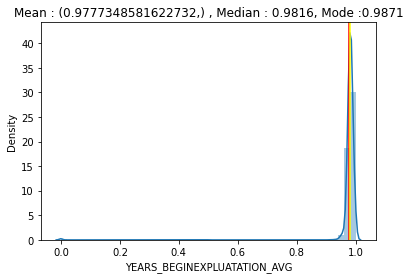

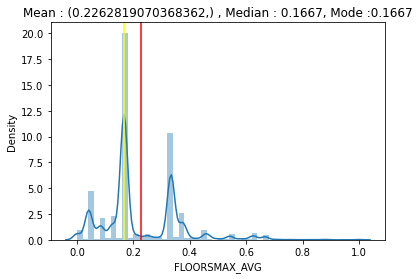

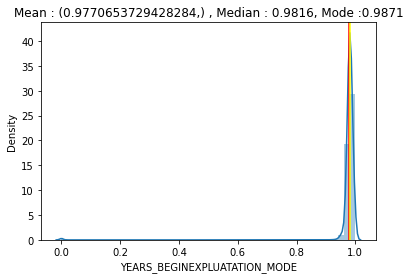

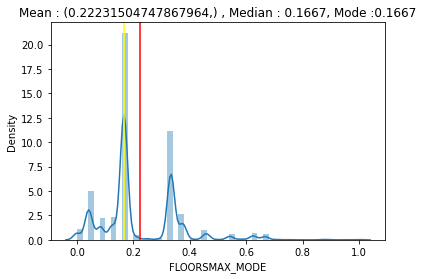

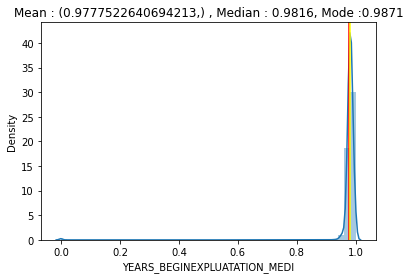

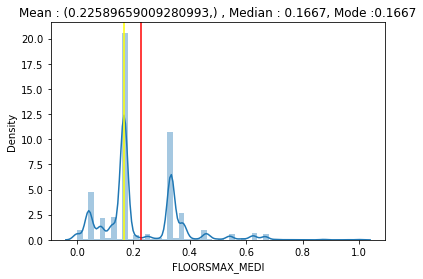

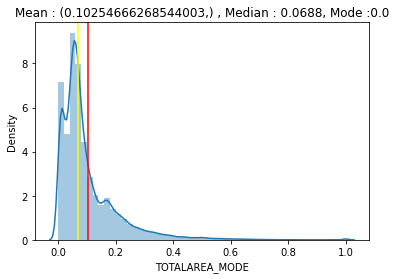

In [19]:
for i in med_null_val_less.columns:
    sns.distplot(clean_df[i])
    plt.title(f'Mean : {clean_df[i].mean(),} , Median : {clean_df[i].median()}, Mode :{clean_df[i].mode()[0]}')
    plt.axvline(clean_df[i].mean(),color='red')
    plt.axvline(clean_df[i].median(),color='yellow')
    plt.show()

YEARS_BEGINEXPLUATATION_AVG
- mean and median are almost same
- use mean

FLOORSMAX_AVG              
- mean and median have difference
- use median

YEARS_BEGINEXPLUATATION_MODE 
- mean and median are almost same
- use mean

FLOORSMAX_MODE                
- mean and median have difference
- use median

YEARS_BEGINEXPLUATATION_MEDI  
- mean and median are almost same
- use mean

FLOORSMAX_MEDI                 
- mean and median have difference
- use median 

TOTALAREA_MODE               
- mean and median have difference
- use median


In [20]:
mean_impute=['YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI']
median_impute=['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','TOTALAREA_MODE']

In [21]:
clean_df.fillna(clean_df[mean_impute].mean(),inplace=True)

In [22]:
clean_df.fillna(clean_df[median_impute].median(),inplace=True)

In [23]:
clean_df.shape

(307511, 81)

We are done imputing for numerical columns now we will check for categorical columns

**EMERGENCYSTATE_MODE**

In [24]:
clean_df['EMERGENCYSTATE_MODE'].isnull().sum()/clean_df.shape[0] *100

47.39830445089769

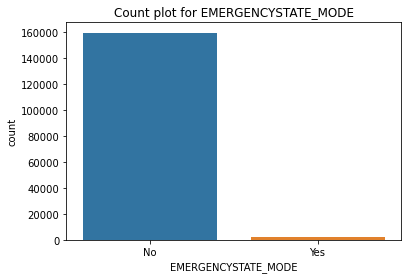

In [25]:
plt.title('Count plot for EMERGENCYSTATE_MODE')
sns.countplot(clean_df['EMERGENCYSTATE_MODE'])
plt.show()

In [26]:
clean_df['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

EMERGENCYSTATE_MODE is flag column
- As it is having around 47% of null values, it will not be better to impute with mode because No category will become dominant
- Let's create new category, which tell that there was no response given

In [27]:
clean_df['EMERGENCYSTATE_MODE'].fillna('Missing',inplace=True)

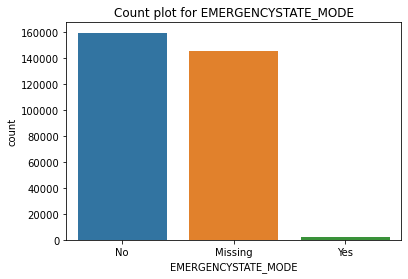

In [28]:
plt.title('Count plot for EMERGENCYSTATE_MODE')
sns.countplot(clean_df['EMERGENCYSTATE_MODE'])
plt.show()

**OCCUPATION_TYPE column**

In [29]:
clean_df['OCCUPATION_TYPE'].isnull().sum()/clean_df.shape[0] *100

31.345545362604916


We will use new Category 'Missing' for imputing missing values as percentage of null value is 31%  and if we replace them by mode, the mode value will be dominant


In [30]:
clean_df['OCCUPATION_TYPE'].fillna('Missing',inplace=True)

In [31]:
clean_df['OCCUPATION_TYPE'].value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

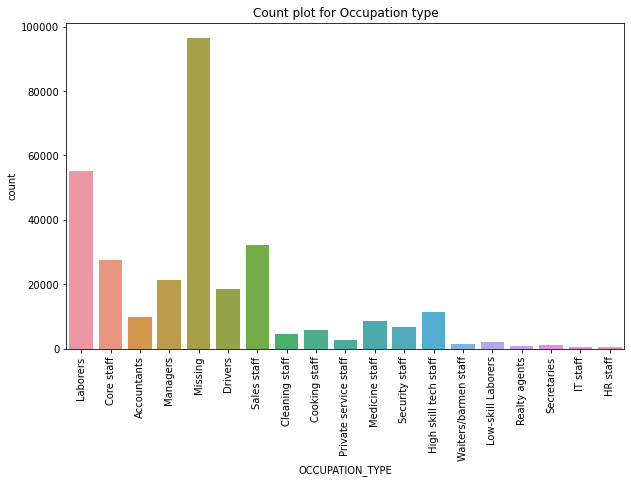

In [32]:
plt.figure(figsize=[10,6])
plt.title('Count plot for Occupation type')
sns.countplot(clean_df['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

**Observation:**
- New Category 'Missing' is added, which has maximum value count in the column.
- After Missing, next highest count is of Laborers, which tells us that most of the people with occupation as labourers apply for loan 

**Columns with Missing Values >10%**

In [33]:
lower_null_val_cols=clean_df[filter_nullval(clean_df.isnull().sum(),clean_df,.10)]
print(lower_null_val_cols.columns)
len(lower_null_val_cols.columns)

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


7

**Checking for EXT_SOURCE_3**

In [34]:
clean_df['EXT_SOURCE_3'].isnull().sum()/clean_df.shape[0] *100

19.825307062186393

In [35]:
clean_df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

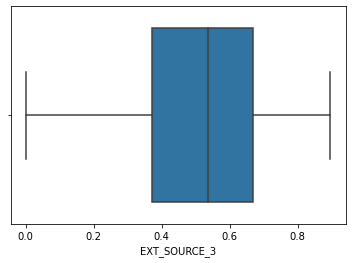

In [36]:
sns.boxplot(clean_df['EXT_SOURCE_3'])
plt.show()

It is right skewed, as most of the values are towards right
We fill fill the null values with median

In [37]:
clean_df['EXT_SOURCE_3'].fillna(clean_df['EXT_SOURCE_3'].median(),inplace=True)

In [38]:
lower_null_val_cols.drop(columns=['EXT_SOURCE_3'],inplace=True)
lower_null_val_cols.columns

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**Checking for Amount columns:**
- AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,
- AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON,
- AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
<!-- - AMT_ANNUITY',AMT_GOODS_PRICE -->
<!-- ,'AMT_ANNUITY','AMT_GOODS_PRICE' -->

In [39]:
amount_credit=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
clean_df[amount_credit].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [40]:

def check_amount(columns):
    plt.figure(figsize=[20,10])
    for col in range(0,len(columns)):
        plt.subplot(math.ceil(len(columns)/3),3,col+1)
        sns.distplot(clean_df[columns[col]])
        plt.title(f'\n Mean: {clean_df[columns[col]].mean()} , Median: {clean_df[columns[col]].median()} , Mode: {clean_df[columns[col]].mode()[0]}')
        plt.axvline(clean_df[columns[col]].mean(),color='red')
        plt.axvline(clean_df[columns[col]].median(),color='yellow')
        plt.axvline(clean_df[columns[col]].mode()[0],color='green')
    plt.show()

In [41]:
def check_amount2(columns):
    plt.figure(figsize=[20,10])
    for col in range(0,len(columns)):
        plt.subplot(math.ceil(len(columns)/3),3,col+1)
        sns.boxplot(clean_df[columns[col]])
        plt.title(f'\n Mean: {clean_df[columns[col]].mean()} , Median: {clean_df[columns[col]].median()} , Mode: {clean_df[columns[col]].mode()[0]}')
    plt.show()

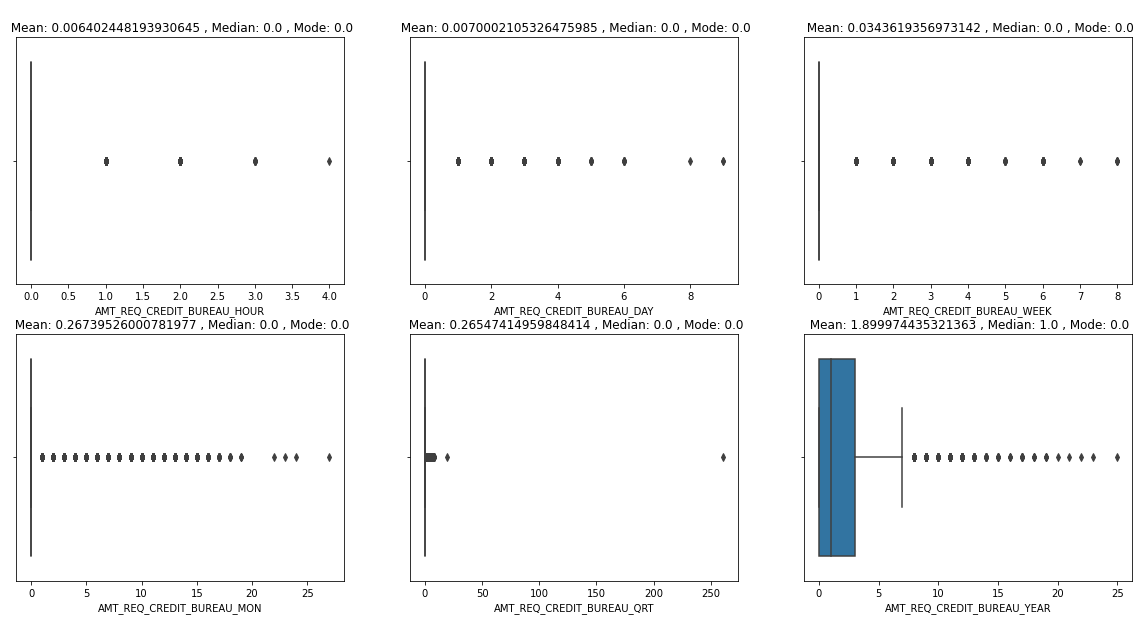

In [42]:
check_amount2(amount_credit)

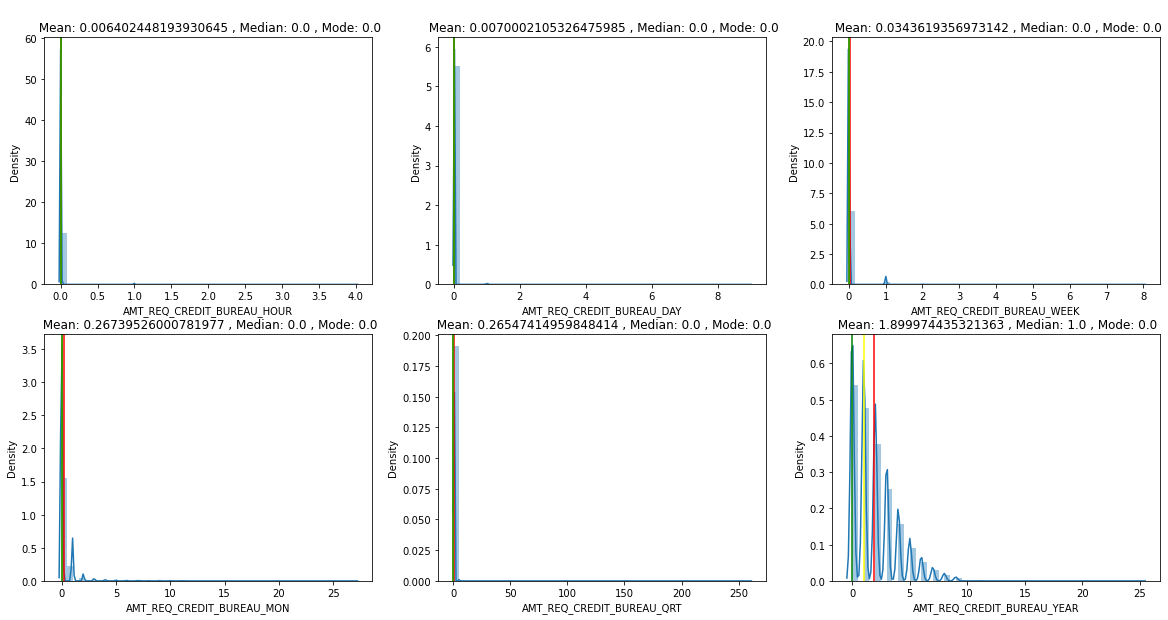

In [43]:
check_amount(amount_credit)

**AMT_REQ_CREDIT_BUREAU_QRT**
- We see that median and mode are almost same but mean is bit large
- Impute with mode as values are going more than 250 and using mean can cause imbalance

In [44]:
 clean_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(clean_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

In [45]:
lower_null_val_cols.drop('AMT_REQ_CREDIT_BUREAU_QRT',axis=1,inplace=True)
lower_null_val_cols.columns

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [46]:
impute_mode=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

In [47]:
# doing for other column as well
for i in impute_mode:
    clean_df[i].fillna(clean_df[i].mode()[0], inplace=True)


In [48]:
clean_df[amount_credit].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

**columns with null values >0%**

In [49]:
lower_cols=list(clean_df.columns[clean_df.isnull().sum()>0])
print(lower_cols)
len(lower_cols)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']


10

In [50]:
clean_df[lower_cols].dtypes

AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_TYPE_SUITE              object
CNT_FAM_MEMBERS             float64
EXT_SOURCE_2                float64
OBS_30_CNT_SOCIAL_CIRCLE    float64
DEF_30_CNT_SOCIAL_CIRCLE    float64
OBS_60_CNT_SOCIAL_CIRCLE    float64
DEF_60_CNT_SOCIAL_CIRCLE    float64
DAYS_LAST_PHONE_CHANGE      float64
dtype: object

**NAME_TYPE_SUITE**  

In [51]:
clean_df['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [52]:
clean_df['NAME_TYPE_SUITE'].isnull().sum()/clean_df.shape[0] *100

0.42014757195677555

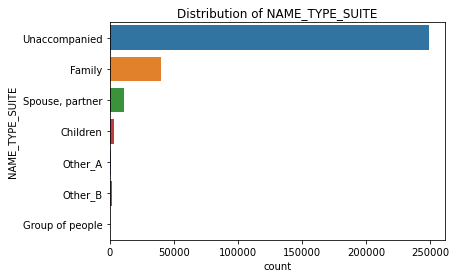

In [53]:
sns.countplot(y=clean_df['NAME_TYPE_SUITE'])
plt.title('Distribution of NAME_TYPE_SUITE')
plt.show()

In [54]:
temp=clean_df['NAME_TYPE_SUITE'].fillna(clean_df['NAME_TYPE_SUITE'].mode()[0])

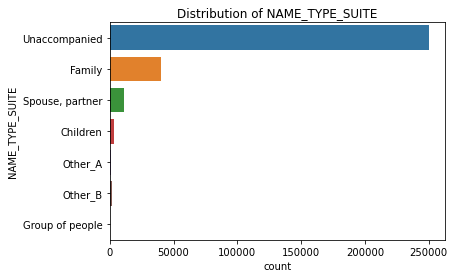

In [55]:
sns.countplot(y=temp)
plt.title('Distribution of NAME_TYPE_SUITE')
plt.show()

In [56]:
clean_df['NAME_TYPE_SUITE'].fillna(clean_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)

**Observation:**
- Most of the  clients i.e. 81% were unaccompanied when they were applying for the loan.
- We can impute the missing values with mode i.e Unaccompanied as the percentage of null_values is less and imputing won't cause intense skeweness

**Remaining numerical columns**

In [57]:
lower_cols.remove('NAME_TYPE_SUITE')

In [58]:
clean_df[lower_cols].isnull().sum()/clean_df.shape[0]*100

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

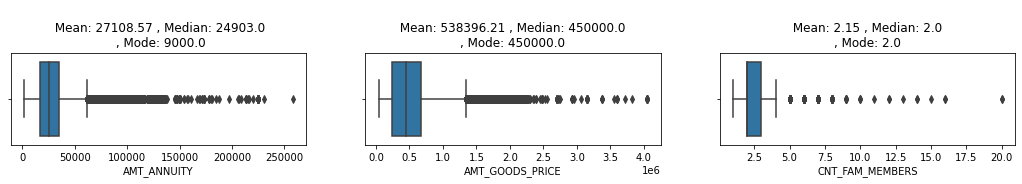

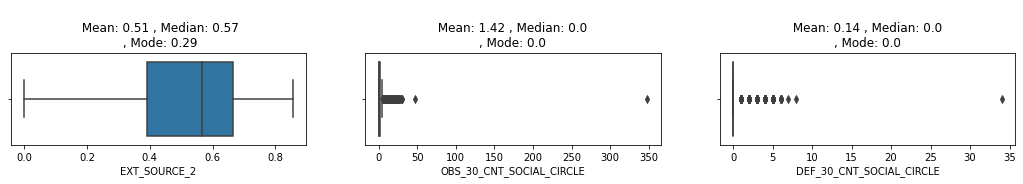

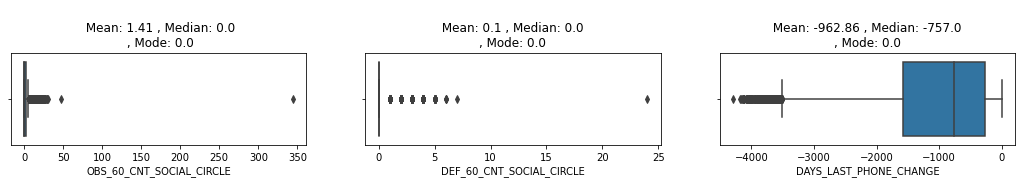

In [59]:

i=0
while i < len(lower_cols):
    plt.figure(figsize=[18,18])
    plt.subplot(9,3,i+1)
    sns.boxplot(clean_df[lower_cols[i]])
    plt.title(f'\n Mean: {round(clean_df[lower_cols[i]].mean(),2)} , Median: {round(clean_df[lower_cols[i]].median(),2)}\n , Mode: {round(clean_df[lower_cols[i]].mode()[0],2)}')
    plt.subplot(9,3,i+2)
    sns.boxplot(clean_df[lower_cols[i+1]])
    plt.title(f'\n Mean: {round(clean_df[lower_cols[i+1]].mean(),2)} , Median: {round(clean_df[lower_cols[i+1]].median(),2)} \n, Mode: {round(clean_df[lower_cols[i+1]].mode()[0],2)}')
    plt.subplot(9,3,i+3)
    sns.boxplot(clean_df[lower_cols[i+2]])
    plt.title(f'\n Mean: {round(clean_df[lower_cols[i+2]].mean(),2)} , Median: {round(clean_df[lower_cols[i+2]].median(),2)} \n, Mode: {round(clean_df[lower_cols[i+2]].mode()[0],2)}')
    i=i+3
    
plt.show()

As the percentage of null values is less and there is a variance in data , using either median or mode  to impuute these values
- **days_columns will be fixed in next step: for now only imputing the values**

In [60]:
# using median
for i in lower_cols:
    clean_df[i].fillna(clean_df[i].median(),inplace=True)

In [61]:
clean_df[lower_cols].isnull().sum()

AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
CNT_FAM_MEMBERS             0
EXT_SOURCE_2                0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
DAYS_LAST_PHONE_CHANGE      0
dtype: int64

In [62]:
clean_df.columns[clean_df.isnull().sum()>0]

Index([], dtype='object')

In [63]:
clean_df.shape

(307511, 81)

### Wohoo! Missing values are handled

### Summary of Handling Missing Values

#### We have looked into all these columns for missing values. Now we will look into standardizing values
- Columns with negative values exist **DAYS_LAST_PHONE_CHANGE**, **DAYS_EMPLOYED**, **DAYS_BIRTH**, **DAYS_REGISTRATION**, **DAYS_ID_PUBLISH**.
- Columns with high values exist, i.e. **AMT_INCOME_TOTAL**, **AMT_CREDIT** and **AMT_GOODS_PRICE**,thus will fix it by converting it into categorical columns.
- 81 Columns are left 

## Checking Data Types

In [64]:
clean_df.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

**Observation** : Data set have columns of object,int64 and float64 types

In [65]:
object_types=clean_df.loc[:,clean_df.dtypes== np.object].columns
object_types

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [66]:
numerical_columns=clean_df.describe().columns
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [67]:
clean_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307511.000000         307511.000000                307511.000000   
mean          2.152664              2.052463                     2.031521   
std           0.910679              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [68]:
categorical_columns=set(clean_df.columns)-set(numerical_columns)
categorical_columns

{'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START'}

In [69]:
clean_df[categorical_columns].describe()

OCCUPATION_TYPE FLAG_OWN_CAR       ORGANIZATION_TYPE FLAG_OWN_REALTY  \
count           307511       307511                  307511          307511   
unique              19            2                      58               2   
top            Missing            N  Business Entity Type 3               Y   
freq             96391       202924                   67992          213312   

       CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
count       307511          307511           307511   
unique           3               7                8   
top              F   Unaccompanied          Working   
freq        202448          249818           158774   

       WEEKDAY_APPR_PROCESS_START NAME_CONTRACT_TYPE EMERGENCYSTATE_MODE  \
count                      307511             307511              307511   
unique                          7                  2                   3   
top                       TUESDAY         Cash loans                  No   
freq                        53901             278232              159428   

                  NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE NAME_FAMILY_STATUS  
count                          307511             307511             307511  
unique                              5                  6                  6  
top     Secondary / secondary special  House / apartment            Married  
freq                           218391             272868             196432

**Observation:**
- FLAG_OWN_CAR and FLAG_OWN_REALITY are object columns where as other FLAG columns are int64 columns.
- Solution: convert other flag columns into caetgorical columns for better analysis.

 *Will be done in Next Step*

## Handling Outliers

### Univariate analysis:
'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START'

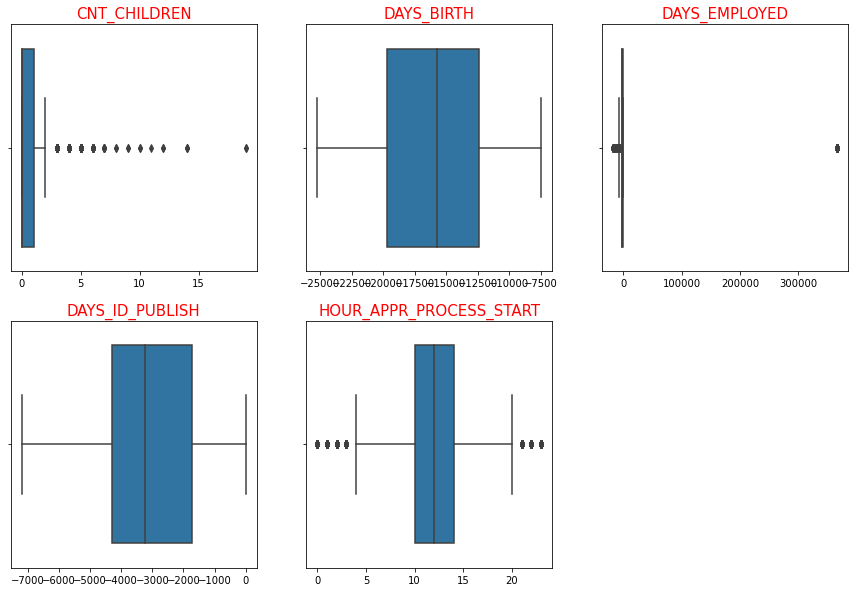

In [70]:
cols1=['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']
plt.figure(figsize=[15,10])
for i in range(0,len(cols1)):
    col=cols1[i]
    plt.subplot(2,3,i+1)
    ax=sns.boxplot(clean_df[col])
    plt.title(col,fontdict={'color':'red','fontsize':15})
    plt.xlabel('')
    

**Outliers in cnt_children:**

In [71]:
clean_df[clean_df['CNT_CHILDREN']==clean_df['CNT_CHILDREN'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
155369      280108       0         Cash loans           F            N   
265784      407877       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
155369               Y            19          112500.0    269550.0   
265784               Y            19          112500.0    135000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
155369      13891.5         225000.0          Family          Working   
265784       8788.5         135000.0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
155369  Secondary / secondary special  Single / not married   
265784               Higher education  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
155369  House / apartment                    0.007020      -11057   
265784  House / apartment                    0.015221      -10297   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
155369          -1853            -3096.0             -745           1   
265784           -896            -4733.0            -2599           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
155369               1                1                 1           1   
265784               1                0                 1           1   

        FLAG_EMAIL       OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
155369           0  Waiters/barmen staff             20.0   
265784           0            Core staff             20.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
155369                     2                            2   
265784                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
155369                     SUNDAY                       11   
265784                   THURSDAY                       15   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
155369                           0                           0   
265784                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
155369                            0                       0   
265784                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
155369                       0                        0        Restaurant   
265784                       0                        0      Kindergarten   

        EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  \
155369      0.553968      0.535276                     0.977735   
265784      0.167332      0.574447                     0.986600   

        FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
155369         0.1667                      0.977065          0.1667   
265784         0.3021                      0.981100          0.1667   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
155369                      0.977752          0.1667          0.0688   
265784                      0.983100          0.2500          0.0427   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
155369             Missing                       1.0   
265784                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
155369                       1.0                       1.0   
265784                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
155369                       1.0                  -744.0                0   
265784                       0.0                 -2495.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
155369                1                0 

**There are two clients with 19 children each**

There are most of the clients with  0-2 number of children and thus values more than 8 do not come in normal distribution

**No outliers in DAYS_BIRTH and DAYS_ID_PUBLISH**

**DAYS_EMPLOYED and HOUR_APPR_PROCESS_START have few values out of normal range**
- This tells us that most of the clients recently started working while applying for loan
- HOUR_APPR_PROCESS_START doesn't give us any relatble information

For the below columns we have already seen in handling missing values columns

#### Few outliers: 
- AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, 
- AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,CNT_FAM_MEMBERS
- DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE


#### Many outliers: 
- AMT_REQ_CREDIT_BUREAU_MON, AMT_ANNUITY, AMT_GOODS_PRICE, AMT_REQ_CREDIT_BUREAU_YEAR
- OBS_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE

#### No outliers
- EXT_SOURCE_2, EXT_SOURCE_3


## Standardizing Values

- **DAYS COLUMNS**

In [72]:
day_columns=['DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
clean_df[day_columns].describe()

DAYS_LAST_PHONE_CHANGE  DAYS_EMPLOYED     DAYS_BIRTH  \
count           307511.000000  307511.000000  307511.000000   
mean              -962.858119   63815.045904  -16036.995067   
std                826.807226  141275.766519    4363.988632   
min              -4292.000000  -17912.000000  -25229.000000   
25%              -1570.000000   -2760.000000  -19682.000000   
50%               -757.000000   -1213.000000  -15750.000000   
75%               -274.000000    -289.000000  -12413.000000   
max                  0.000000  365243.000000   -7489.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  
count      307511.000000    307511.000000  
mean        -4986.120328     -2994.202373  
std          3522.886321      1509.450419  
min        -24672.000000     -7197.000000  
25%         -7479.500000     -4299.000000  
50%         -4504.000000     -3254.000000  
75%         -2010.000000     -1720.000000  
max             0.000000         0.000000

Let's fix these negative values

In [73]:
clean_df[day_columns]=abs(clean_df[day_columns])

In [74]:
clean_df[day_columns].describe()

DAYS_LAST_PHONE_CHANGE  DAYS_EMPLOYED     DAYS_BIRTH  \
count           307511.000000  307511.000000  307511.000000   
mean               962.858119   67724.742149   16036.995067   
std                826.807226  139443.751806    4363.988632   
min                  0.000000       0.000000    7489.000000   
25%                274.000000     933.000000   12413.000000   
50%                757.000000    2219.000000   15750.000000   
75%               1570.000000    5707.000000   19682.000000   
max               4292.000000  365243.000000   25229.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  
count      307511.000000    307511.000000  
mean         4986.120328      2994.202373  
std          3522.886321      1509.450419  
min             0.000000         0.000000  
25%          2010.000000      1720.000000  
50%          4504.000000      3254.000000  
75%          7479.500000      4299.000000  
max         24672.000000      7197.000000

In [75]:
high_value_columns=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_GOODS_PRICE']
clean_df[high_value_columns].describe()

AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05     3.075110e+05
mean       1.687979e+05  5.990260e+05     5.383163e+05
std        2.371231e+05  4.024908e+05     3.692890e+05
min        2.565000e+04  4.500000e+04     4.050000e+04
25%        1.125000e+05  2.700000e+05     2.385000e+05
50%        1.471500e+05  5.135310e+05     4.500000e+05
75%        2.025000e+05  8.086500e+05     6.795000e+05
max        1.170000e+08  4.050000e+06     4.050000e+06

We can convert the price into lakhs and see it again

In [76]:
standard_df=clean_df.copy()

In [77]:
standard_df.shape

(307511, 81)

In [78]:
def find_IQR(col,data):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    return IQR,Q3,Q1

- **AMT_INCOME_TOTAL**	

<AxesSubplot:>

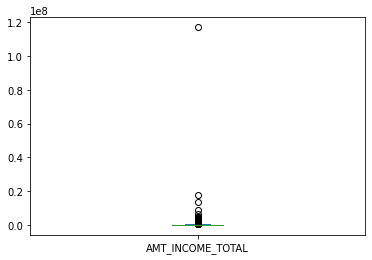

In [79]:
standard_df['AMT_INCOME_TOTAL'].plot.box()

In [80]:
standard_df['AMT_INCOME_TOTAL_LAC']=standard_df['AMT_INCOME_TOTAL']/100000

In [81]:
standard_df['AMT_INCOME_TOTAL_LAC'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL_LAC, dtype: float64

Maximum value goes till 1170 Lakhs

<AxesSubplot:>

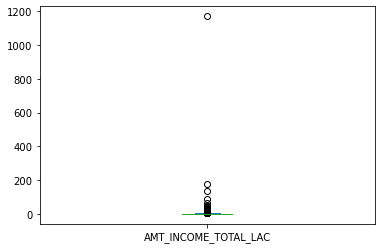

In [82]:
standard_df['AMT_INCOME_TOTAL_LAC'].plot.box()

As the outlier is very far from the normal distribution, last bin can be 10 or above

In [83]:
#binning AMT_INCOME_TOTAL
ait_bins=[0,1,2,3,4,5,6,7,8,9,10,11]
ait_labels=['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9-10L','Above 10L']
standard_df['AMT_INCOME_TOTAL_BINS']=pd.cut(standard_df['AMT_INCOME_TOTAL_LAC'],bins=ait_bins,labels=ait_labels)

In [84]:
standard_df['AMT_INCOME_TOTAL_BINS'].value_counts(normalize=True)*100

1L-2L        50.735000
2L-3L        21.210691
0-1L         20.729695
3L-4L         4.776116
4L-5L         1.744669
5L-6L         0.356354
6L-7L         0.282805
8L-9L         0.096980
7L-8L         0.052721
9-10L         0.009112
Above 10L     0.005858
Name: AMT_INCOME_TOTAL_BINS, dtype: float64

It tells most of the people have income between 1-2L

- **AMT_CREDIT**	

Lets's do same for AMT_CREDIT

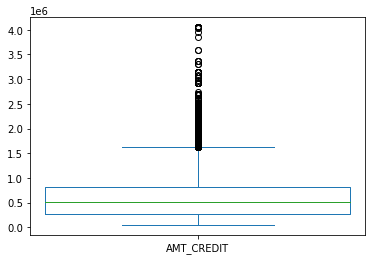

In [85]:
standard_df['AMT_CREDIT'].plot.box(widths=40)
plt.show()

In [86]:
standard_df['AMT_CREDIT_LAC']=standard_df['AMT_CREDIT']/100000

<AxesSubplot:>

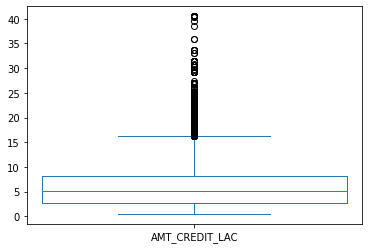

In [87]:
standard_df['AMT_CREDIT_LAC'].plot.box(widths=40)

In [88]:
standard_df['AMT_CREDIT_LAC'].describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT_LAC, dtype: float64

In [89]:
IQR,Q3,Q1=find_IQR('AMT_CREDIT_LAC',standard_df)
print(IQR,Q3,Q1)

5.386499999999999 8.0865 2.7


- There are many Outliers in the data
- amount credit of client mostly lies between 2.5-8L

**AMT_GOODS_PRICE**

Lets's do same for AMT_GOODS_PRICE

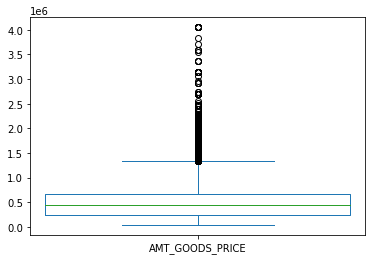

In [90]:
standard_df['AMT_GOODS_PRICE'].plot.box(widths=40)
plt.show()

In [91]:
standard_df['AMT_GOODS_PRICE_LAC']=standard_df['AMT_GOODS_PRICE']/100000

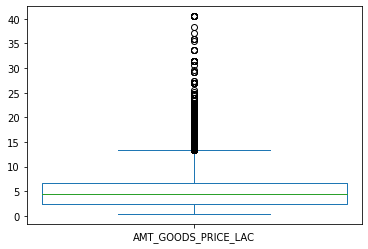

In [92]:
standard_df['AMT_GOODS_PRICE_LAC'].plot.box(widths=20)
plt.show()

In [93]:
IQR,Q3,Q1=find_IQR('AMT_GOODS_PRICE_LAC',standard_df)
print(IQR,Q3,Q1)

4.41 6.795 2.385


- There are many Outliers in the data
- most of the goods on which clients took loan have amount between 2-7L 

**AMT ANNUITY**

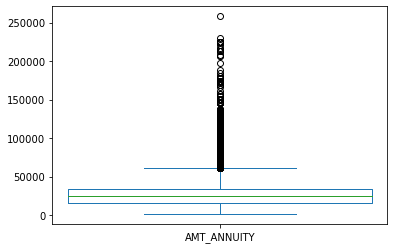

In [94]:
standard_df['AMT_ANNUITY'].plot.box(widths=20)
plt.show()

In [95]:
np.quantile(standard_df['AMT_ANNUITY'],[0.9,1])

array([ 45954. , 258025.5])

In [96]:
standard_df['AMT_ANNUITY'].max()

258025.5

In [97]:
[18189., 24903.]
[24903., 45954.]
[ 45954. , 258025.5]

[45954.0, 258025.5]

In [98]:
quants=[0,0.1,0.3,0.5,0.9,1]
gp_labels=['Very Low','Low','Medium','High','Very High']
standard_df['AMT_ANNUITY_RANGE']=pd.qcut(standard_df['AMT_ANNUITY'],q=quants,labels=gp_labels)

In [99]:
standard_df['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

High         40.014829
Medium       20.004162
Low          19.963514
Very Low     10.041917
Very High     9.975578
Name: AMT_ANNUITY_RANGE, dtype: float64

In [100]:
IQR,Q3,Q1=find_IQR('AMT_ANNUITY',standard_df)
print(IQR,Q3,Q1)

18072.0 34596.0 16524.0


- There are many Outliers in the column
- Most of the loan annuity lies between 16,000-35,000 

**CHECKING FLAG VALUES** 

In [101]:
flag_cols=list(filter(lambda x: x.startswith('FLAG'), standard_df.columns))
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [102]:
#Other FLAG COLUMNS 
others=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
others

['REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [103]:
flags=flag_cols+ others
for x in flags:
    print(standard_df[x].value_counts())
    print('\n')

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64


0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64


1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64


0    221080
1     86431
Name: FLAG_PHONE, dtype: int64


0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64


1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64


0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64


0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64


0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64


0    307504
1         7
Na

**Observation:**
- Columns FLAG_OWN_CAR and FLAG_OWN_REALTY contains N and Y instead of 0 and 1 respectively
- We need to make all the flag columns like this i.e replacing 0 with No and 1 with Yes

In [104]:
standard_df[flags]=standard_df[flags].apply(lambda x: x.replace({0:'No',1:'Yes','N':'No','Y':'Yes'}))

In [105]:
standard_df[flags].describe()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
count        307511          307511     307511         307511          307511   
unique            2               2          2              2               2   
top              No             Yes        Yes            Yes              No   
freq         202924          213312     307510         252125          246203   

       FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
count            307511     307511     307511          307511          307511   
unique                2          2          2               2               2   
top                 Yes         No         No              No             Yes   
freq             306937     221080     290069          307498          218340   

       FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
count           307511          307511          307511          307511   
unique               2               2               2               2   
top                 No              No              No              No   
freq            307486          302863          280433          307452   

       FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
count           307511          307511           307511           307511   
unique               2               2                2                2   
top                 No              No               No               No   
freq            282487          306313           307504           306308   

       FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
count            307511           307511           307511           307511   
unique                2                2                2                2   
top                  No               No               No               No   
freq             307509           306427           306608           307139   

       FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count            307511           307511           307511           307511   
unique                2                2                2                2   
top                  No               No               No               No   
freq             304458           307429           305011           307328   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 REG_REGION_NOT_LIVE_REGION  \
count            307511           307511                     307511   
unique                2                2                          2   
top                  No               No                         No   
freq             307355           307408                     302854   

       REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
count                      307511                      307511   
unique                          2                           2   
top                            No                          No   
freq                       291899                      295008   

       REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  
count                  307511                 307511                  307511  
unique                      2                      2                       2  
top                        No                     No                      No  
freq                   283472                 236644                  252296

**TARGET COLUMN**

In [106]:
standard_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [107]:
standard_df['TARGET'].dtype

dtype('int64')

As this is the target column and tells whether the client is a loan defaulter ot not, we can replace 0 with Non-Defaulter and 1 with Defaulter


In [108]:
## 1- With payment difficulties 
## 0- all other cases
standard_df['TARGET']=standard_df['TARGET'].replace({1:'Defaulter',0:'Non-Defaulter'})

In [109]:
standard_df['TARGET'].value_counts(normalize=True) *100

Non-Defaulter    91.927118
Defaulter         8.072882
Name: TARGET, dtype: float64

In [110]:
standard_df.shape

(307511, 86)

In [111]:
clean_df.shape

(307511, 81)

#### CODE_GENDER

In [112]:
standard_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There is XNA category which have 4 values. let's check this values:

In [113]:
standard_df[standard_df['CODE_GENDER']=='XNA']

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289  Non-Defaulter    Revolving loans         XNA          Yes   
38566       144669  Non-Defaulter    Revolving loans         XNA           No   
83382       196708  Non-Defaulter    Revolving loans         XNA           No   
189640      319880  Non-Defaulter    Revolving loans         XNA          Yes   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657              Yes             0          207000.0    382500.0   
38566              Yes             2          157500.0    270000.0   
83382              Yes             1          135000.0    405000.0   
189640             Yes             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713       20232          10044   
38566                     0.026392       13717           2797   
83382                     0.035792       10647           1228   
189640                    0.035792        9649           2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE  \
35657             10024.0             3537        Yes            Yes   
38566              2241.0             4659        Yes            Yes   
83382               183.0             1671        Yes            Yes   
189640             4099.0             2326        Yes            Yes   

       FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL  \
35657              Yes              Yes        Yes         No   
38566              Yes              Yes        Yes         No   
83382              Yes              Yes        Yes         No   
189640             Yes              Yes        Yes         No   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Missing              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640             Missing              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
35657                        10                         No   
38566                        16                         No   
83382                        15                         No   
189640                       15                         No   

       REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
35657                          No                          No   
38566                          No                          No   
83382                          No                          No   
189640                         No                          No   

       REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
35657                      No                  

- Imputation has to be done as XNA gives us no idea about the gender. 
- These values can be replaced with mode i.e F as it wont cause much of skewness in the data.

In [114]:
standard_df['CODE_GENDER']=standard_df['CODE_GENDER'].replace('XNA','F')

In [115]:
standard_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

We can observe that DAYS_BIRTH, DAYS_EMPLOYED columns are in days which are giving us high values, and conversion to years will make our analysis easy.

There is no need to convert DAYS_REGISTRATION, DAYS_ID_PUBLISH into years as they have small values

- **DAYS_BIRTH** to AGE_GROUP

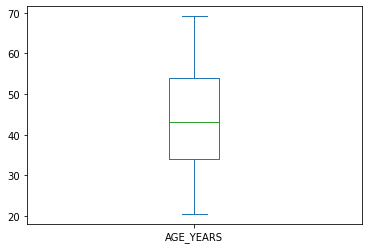

In [116]:
standard_df['AGE_YEARS']=standard_df['DAYS_BIRTH']/365
standard_df['AGE_YEARS'].plot.box()
plt.show()

In [117]:
# with the help of boxplot, I will use bins range will be from 0-80
ag_bins=np.arange(20,80,5)
ag_labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','Above 70']
standard_df['AGE_GROUP']=pd.cut(standard_df['AGE_YEARS'],bins=ag_bins,labels=ag_labels)

In [118]:
standard_df['AGE_GROUP'].value_counts(normalize=True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
60-65        8.934965
20-25        3.954005
65-70        2.635028
Above 70     0.000000
Name: AGE_GROUP, dtype: float64

- **DAYS_EMPLOYED** to EMPLOYEMENT_YEARS_RANGE

In [119]:
# changing for DAYS_EMPLOYED
standard_df['EMPLOYEMENT_YEARS']=standard_df['DAYS_EMPLOYED']/365

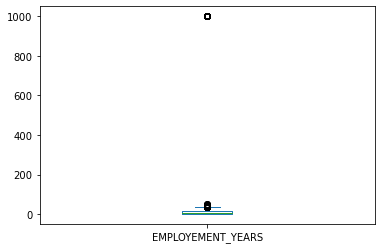

In [120]:
standard_df['EMPLOYEMENT_YEARS'].plot.box()
plt.show()

There are outliers in the data, especially at 1000 which is definitely not possible, so this point would not be considered

### Handling the outlier:

In [121]:
standard_df[(standard_df['EMPLOYEMENT_YEARS'] >200)]

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011  Non-Defaulter         Cash loans           F           No   
11          100015  Non-Defaulter         Cash loans           F           No   
23          100027  Non-Defaulter         Cash loans           F           No   
38          100045  Non-Defaulter         Cash loans           F           No   
43          100050  Non-Defaulter         Cash loans           F           No   
...            ...            ...                ...         ...          ...   
307469      456209  Non-Defaulter         Cash loans           F           No   
307483      456227  Non-Defaulter         Cash loans           F           No   
307487      456231  Non-Defaulter         Cash loans           M           No   
307505      456249  Non-Defaulter         Cash loans           F           No   
307507      456252  Non-Defaulter         Cash loans           F           No   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                  Yes             0        112500.000   1019610.0   
11                 Yes             0         38419.155    148365.0   
23                 Yes             0         83250.000    239850.0   
38                 Yes             0         99000.000    247275.0   
43                 Yes             0        108000.000    746280.0   
...                ...           ...               ...         ...   
307469             Yes             0        202500.000    703728.0   
307483             Yes             0         99000.000    247275.0   
307487             Yes             0        117000.000   1071909.0   
307505             Yes             0        112500.000    225000.0   
307507             Yes             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children        Pensioner   
11          10678.5         135000.0        Children        Pensioner   
23          23850.0         225000.0   Unaccompanied        Pensioner   
38          17338.5         225000.0   Unaccompanied        Pensioner   
43          42970.5         675000.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
307469      29943.0         607500.0   Unaccompanied        Pensioner   
307483      16479.0         225000.0   Unaccompanied        Pensioner   
307487      31473.0         936000.0   Unaccompanied        Pensioner   
307505      22050.0         225000.0   Unaccompanied        Pensioner   
307507      12001.5         225000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
38      Secondary / secondary special               Married   
43                   Higher education  Single / not married   
...                               ...                   ...   
307469  Secondary / secondary special  Single / not married   
307483  Secondary / secondary special             Separated   
307487  Secondary / secondary special               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634       20099   
11      House / apartment                    0.015221       20417   
23      House / apartment                    0.006296       24827   
38      House / apartment                    0.006207       23920   
43      House / apartment                    0.010966       23548   
...                   ...                         ...         ...   
307469  House / apartment                    0.031329       22414   
307483  

**There are  55374 rows with such values and we can't loose these values, we can convert this column to categorical column to solve this issue **

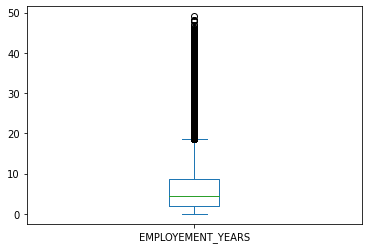

In [122]:
standard_df['EMPLOYEMENT_YEARS'][standard_df.EMPLOYEMENT_YEARS<=200].plot.box()
plt.show()

In [123]:
#binning
eyr_bins=[0,5,10,15,20,25,30,50]
eyr_labels=['0-5','5-10','10-15','15-20','20-25','25-30','Above 30']
standard_df['EMPLOYEMENT_YEAR_RANGE']=pd.cut(standard_df['EMPLOYEMENT_YEARS'],bins=eyr_bins,labels=eyr_labels)

In [124]:
standard_df['EMPLOYEMENT_YEAR_RANGE'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
Above 30     1.191822
Name: EMPLOYEMENT_YEAR_RANGE, dtype: float64

### Summary of Standardizing Columns

- Fixed the negative value DAYS_LAST_PHONE_CHANGE, DAYS_EMPLOYED, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH.
- Converted amt to lakhs: AMT_INCOME_TOTAL, AMT_CREDIT and AMT_GOODS_PRICE
- Did categorical binning for columns with high values: AMT_INCOME_TOTAL,AMT_ANNUITY
- Converted flag columns, DAYS_BIRTH and DAYS_EMPLOYED from numerical to categorical columns for better understanding.

In [125]:
clean_df.shape

(307511, 81)

In [126]:
standard_df.shape

(307511, 90)

### we added 9 columns in this step

## FINDING IMBALANCE IN DATA

### Target column

In [127]:
standard_df['TARGET'].value_counts(normalize=True)*100

Non-Defaulter    91.927118
Defaulter         8.072882
Name: TARGET, dtype: float64

In [128]:
## Imbalance ratio
(standard_df["TARGET"]=='Non-Defaulter').sum()/(standard_df["TARGET"]=='Defaulter').sum()

11.387150050352467

**Observation:**
- There is high imbalance in data with imbalance ratio of 91.9/8==> 11.38 i.e  Non-Defaulter: Defaulter 
- 8% of clients have payment difficulties, hence are more likely to become a Defaulter
- 92% of clients have no payment difficulties

### Studying  Flag Columns

In [129]:
len(flags)

34

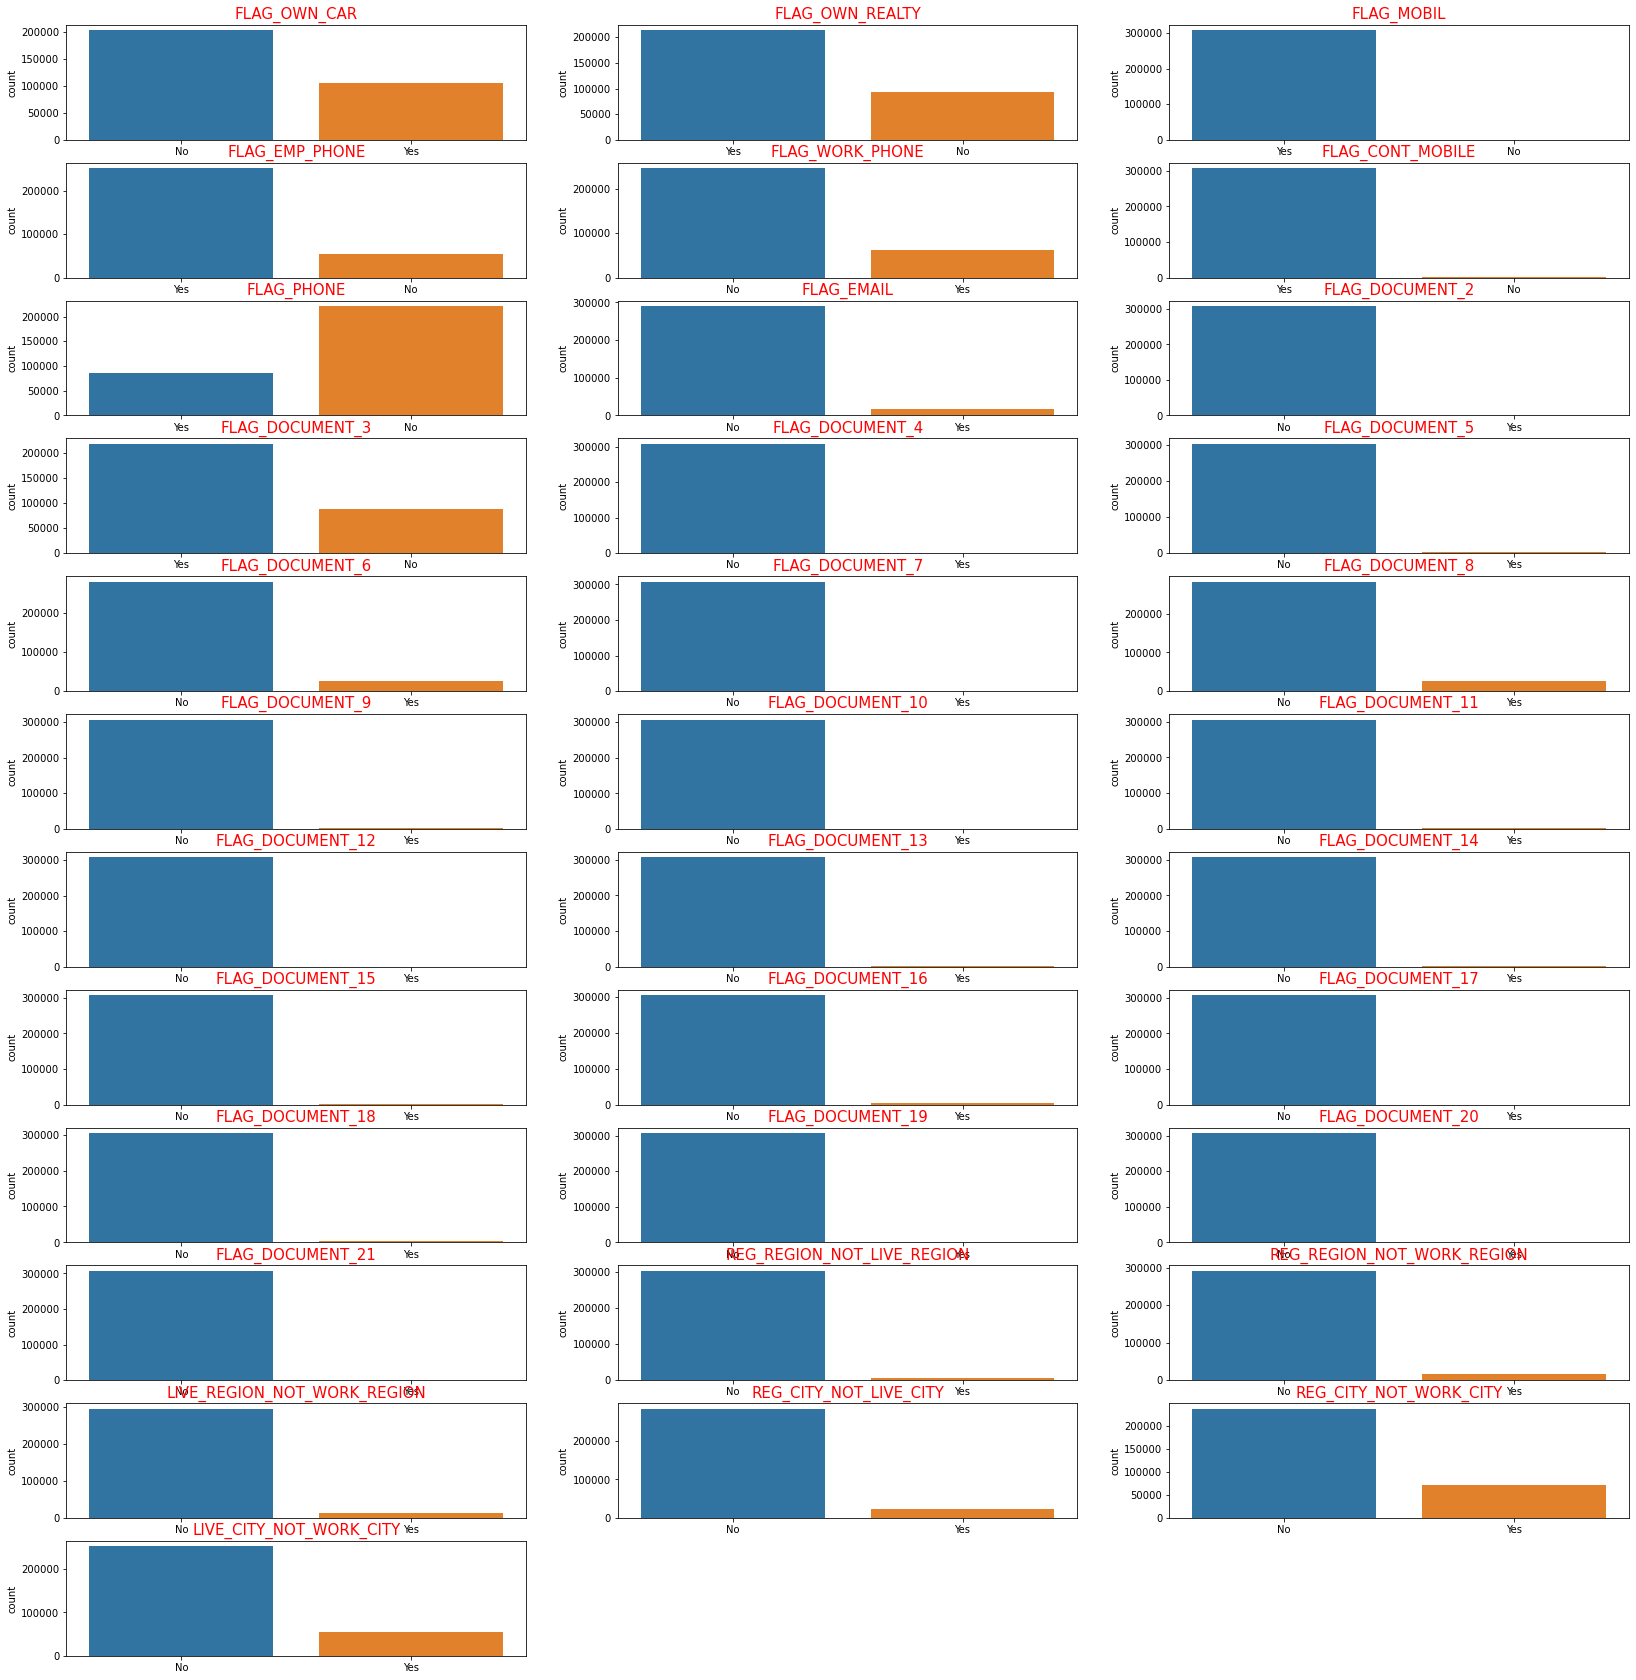

In [130]:
plt.figure(figsize=[28,30])
for i in range(0,len(flags)):
    col=flags[i]
    plt.subplot(12,3,i+1)
    ax=sns.countplot(standard_df[col])
    plt.title(col,fontdict={'color':'red','fontsize':15})
    plt.xlabel('')

**Observation:**
- 

- Most of the flag variables have very less Yes as a response or only No as a response, Hence, leave studying these columns .
- We can study
FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_EMP_PHONE, FLAG_PHONE,FLAG_WORK_PHONE, FLAG_DOCUMENT_3, REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY

In [131]:
removals=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_DOCUMENT_3','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
for i in removals:
    flags.remove(i)


In [132]:
len(flags)

25

## Bivariate analysis of flag col with target

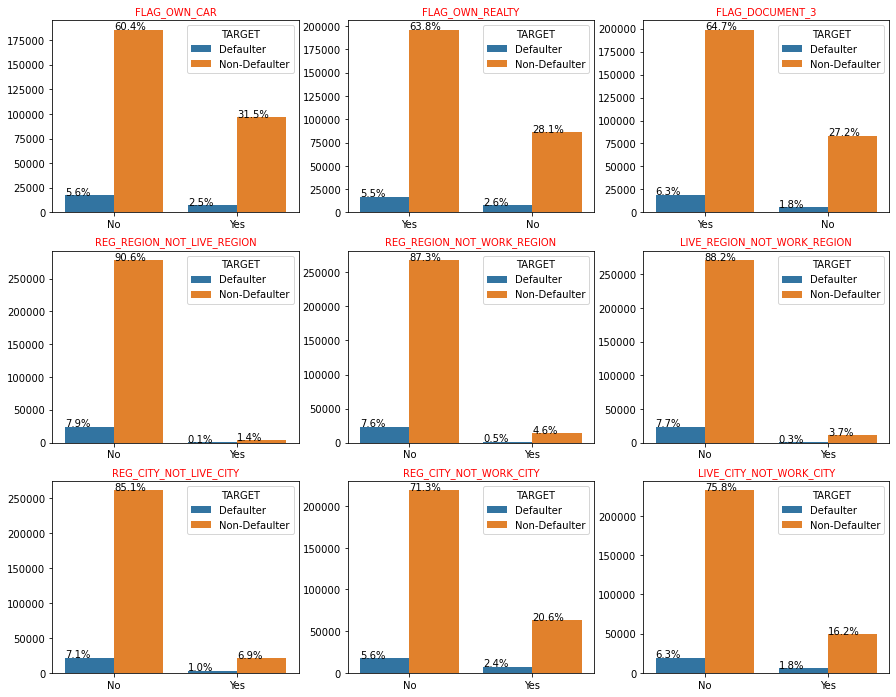

In [133]:
plt.figure(figsize=[15,12])
for i in range(0,len(removals)):
    col=removals[i]
    plt.subplot(3,3,i+1)
    ax=sns.countplot(standard_df[col],hue=standard_df['TARGET'])
    for val in ax.patches:
            ax.annotate('{:.1f}%'.format((val.get_height()/len(standard_df))*100), (val.get_x(), val.get_height()))
    plt.title(col,fontdict={'color':'red','fontsize':10})
    plt.xlabel('')
    plt.ylabel('')
    

**Observation**
- There is a data imbalance in these columns as most of the non defaulters data is at peak.
- 90.6% of clients who are non-defaulter, their permanent address match contact address (region level)
- 88.2% of clients who are non-defaulter, their permanent address match work address(region level)
- 20.6% of clients who are non-defaulter, their permanent address doesn't match work address(city level)

  **This means that most of the non-defaulters live in the same region of their workplace**
  
- 7.9% of clients who are defaulter, their permanent address match contact address(region level)
- 7.7% of clients who are defaulter, their work address match contact address(region level)
- 5.6% of clients who are defaulter, their permanent address match work address(city level)

    **This means that most of the clients with payment difficulties  live in the same city of their workplace**
    
- High Percentage of people applying for loans don't have their own car.

## Segmented and Univariate Categorical Analysis

#### Let's divide data into two for better visualization:
- Defaulters - defaulters_data
- Non-Defaulter - non_defaulters_data

In [134]:
analysis_data=standard_df.copy()

In [135]:
defaulter_df=analysis_data[analysis_data.TARGET== 'Defaulter'].reset_index()
non_defaulter_df=analysis_data[analysis_data.TARGET== 'Non-Defaulter'].reset_index()

In [136]:
cat_columns =analysis_data.select_dtypes(include=['object','category']).columns
analysis_data[cat_columns].dtypes

TARGET                           object
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
FLAG_MOBIL                       object
FLAG_EMP_PHONE                   object
FLAG_WORK_PHONE                  object
FLAG_CONT_MOBILE                 object
FLAG_PHONE                       object
FLAG_EMAIL                       object
OCCUPATION_TYPE                  object
WEEKDAY_APPR_PROCESS_START       object
REG_REGION_NOT_LIVE_REGION       object
REG_REGION_NOT_WORK_REGION       object
LIVE_REGION_NOT_WORK_REGION      object
REG_CITY_NOT_LIVE_CITY           object
REG_CITY_NOT_WORK_CITY           object
LIVE_CITY_NOT_WORK_CITY          object
ORGANIZATION_TYPE                object


we have seen forflag columns earlier
- let's remove them

In [137]:
cat_columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT

In [138]:
flag_cols=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [139]:
cat_columns= set(cat_columns)-set(flag_cols)

In [140]:
cat_columns

{'AGE_GROUP',
 'AMT_ANNUITY_RANGE',
 'AMT_INCOME_TOTAL_BINS',
 'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'EMPLOYEMENT_YEAR_RANGE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'TARGET',
 'WEEKDAY_APPR_PROCESS_START'}

In [141]:

def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.1f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    for val in ax2.patches:
            ax2.annotate('{:.1f}%'.format((val.get_height()/len(train))*100), (val.get_x(), val.get_height()))

    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['Non-Defaulter']= ((train_0[col].value_counts())/len(train_0))
    df['Defaulter']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')

    
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

Plotting ORGANIZATION_TYPE


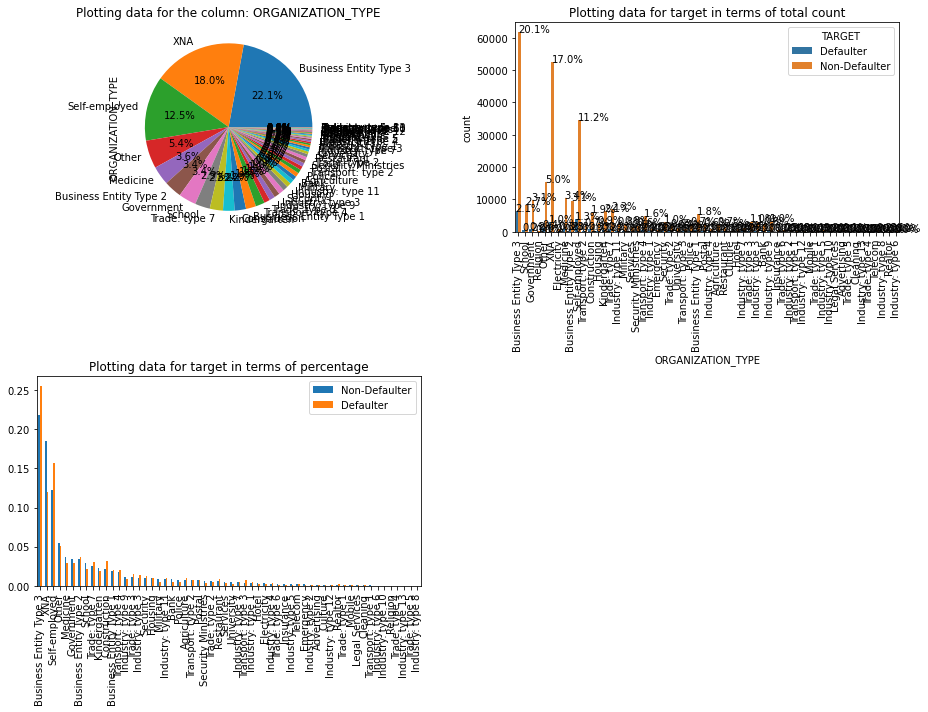

Plotting EMPLOYEMENT_YEAR_RANGE


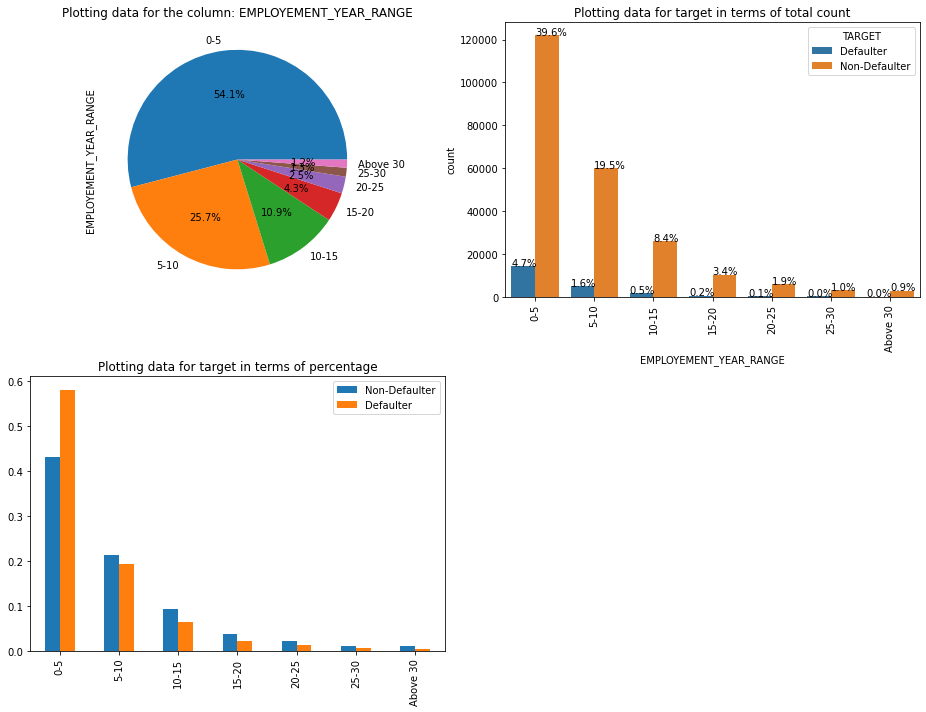

Plotting REG_CITY_NOT_LIVE_CITY


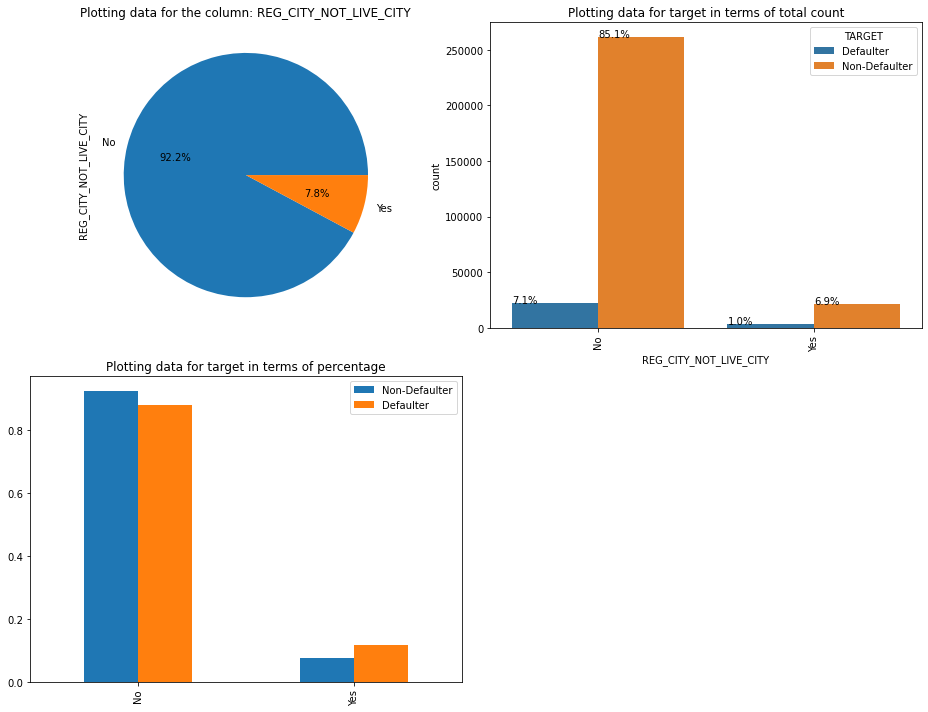

Plotting FLAG_EMP_PHONE


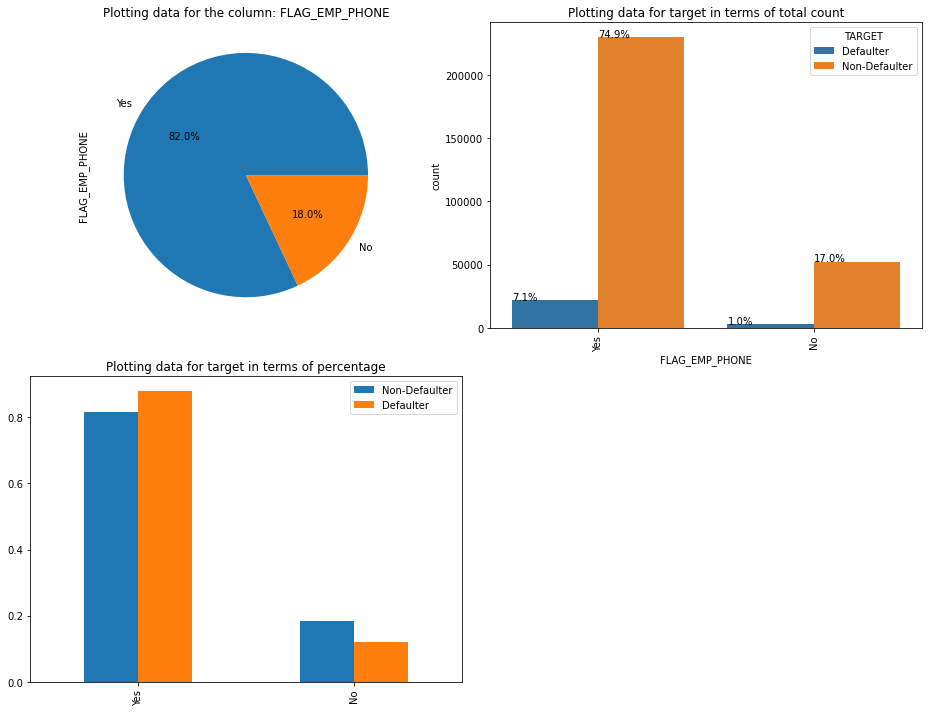

Plotting NAME_TYPE_SUITE


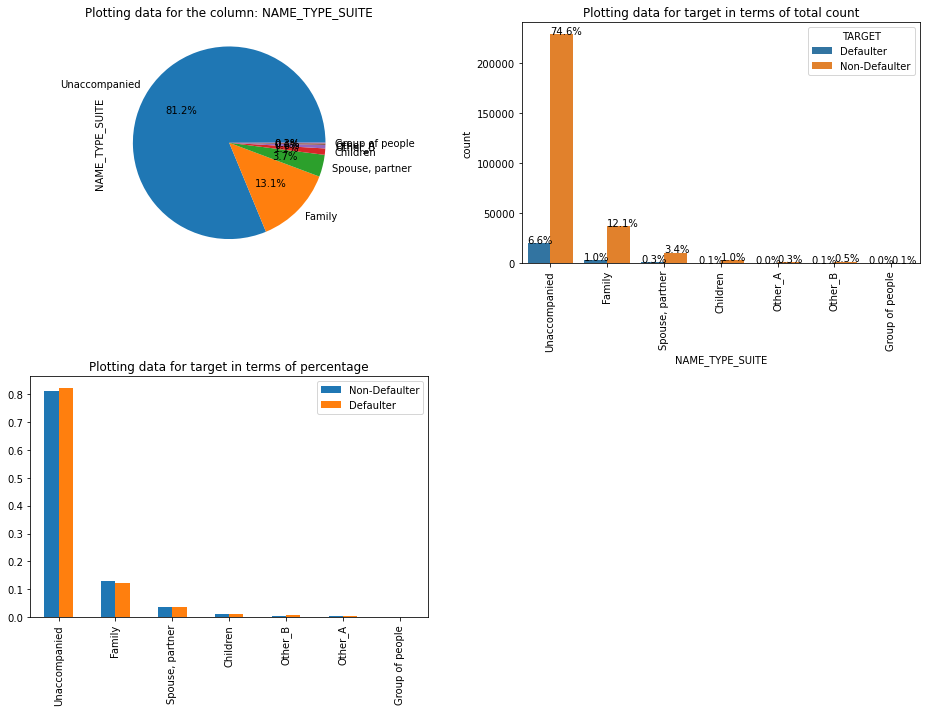

Plotting FLAG_PHONE


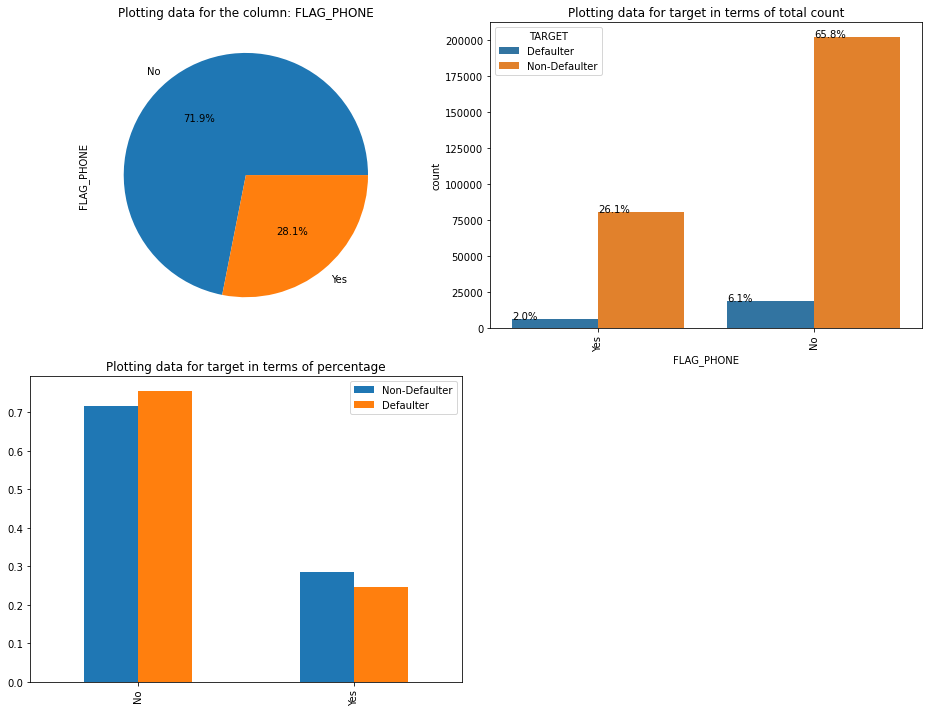

Plotting LIVE_REGION_NOT_WORK_REGION


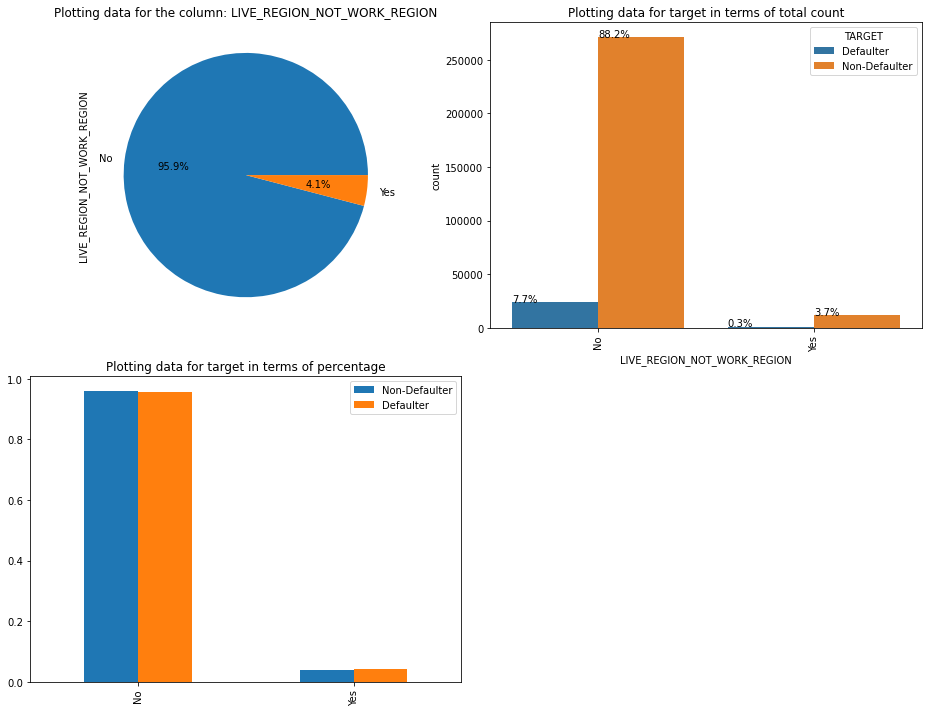

Plotting FLAG_CONT_MOBILE


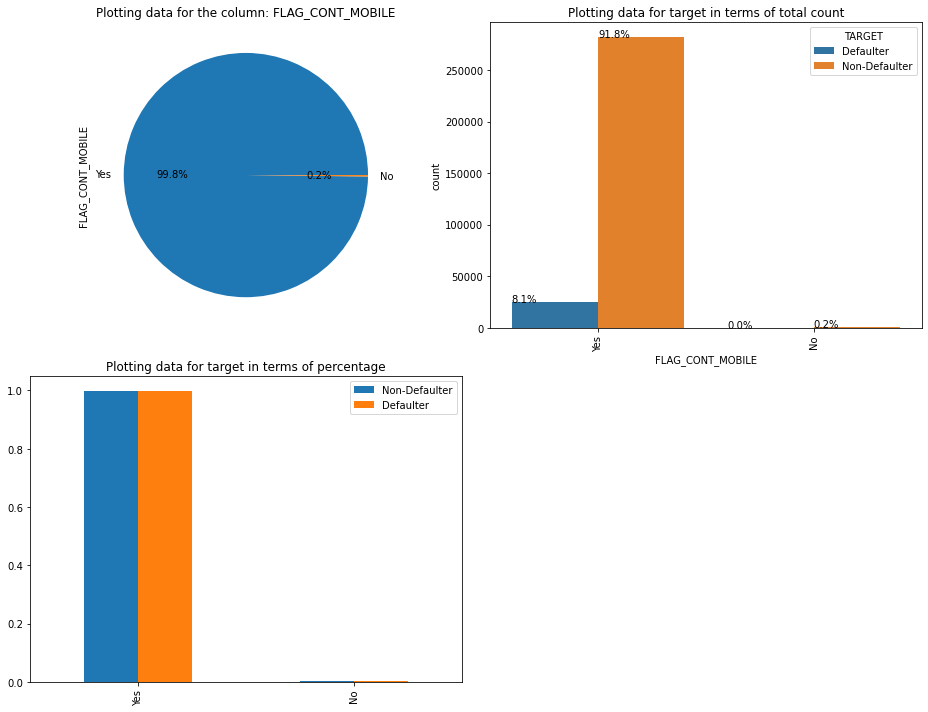

Plotting NAME_CONTRACT_TYPE


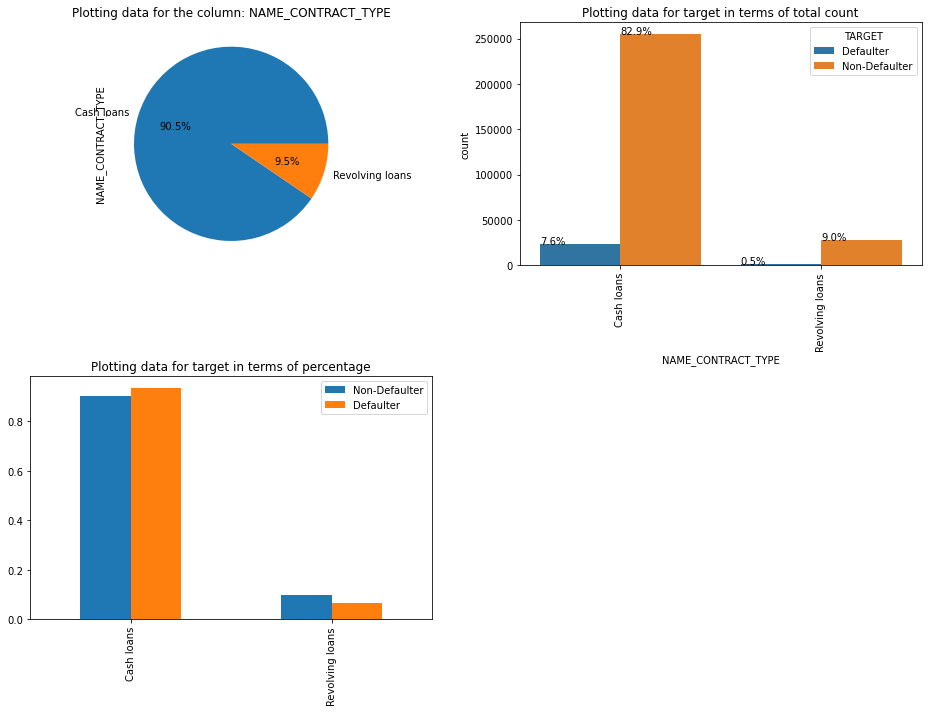

Plotting NAME_FAMILY_STATUS


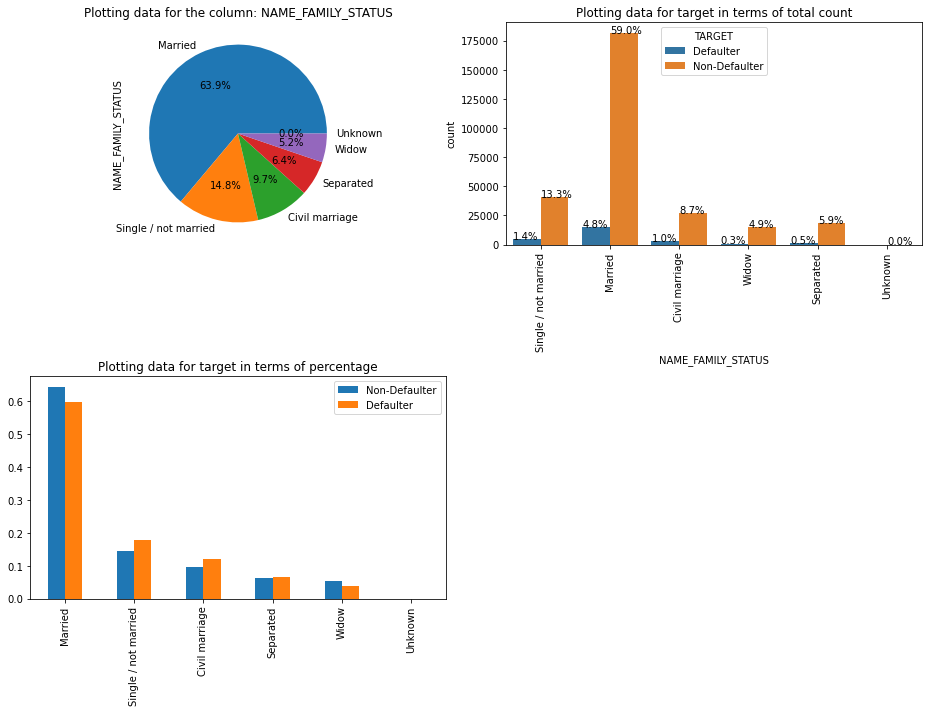

Plotting AGE_GROUP


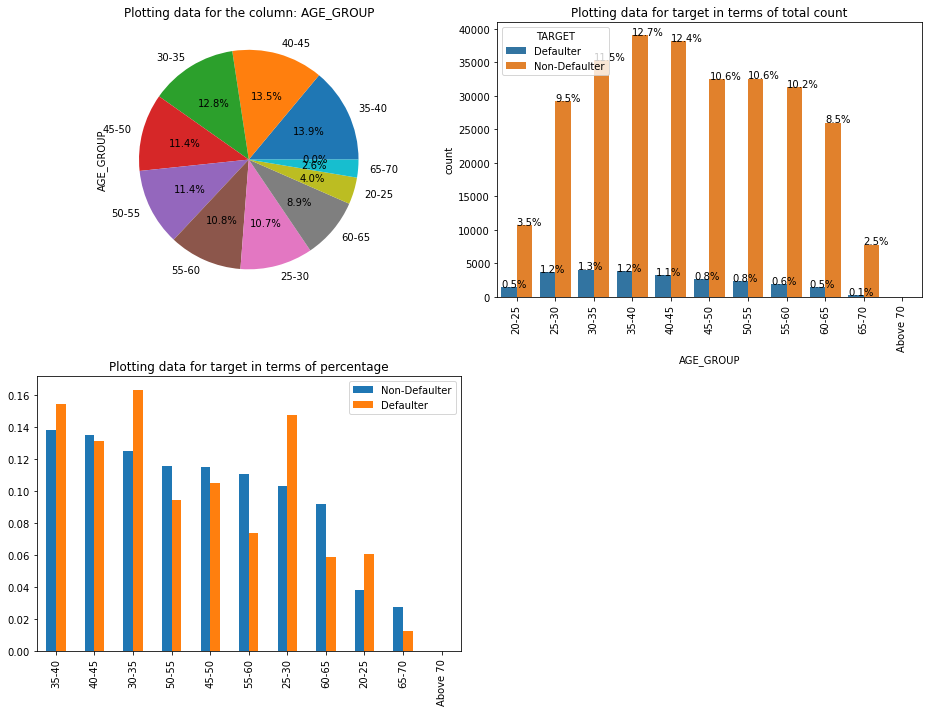

Plotting WEEKDAY_APPR_PROCESS_START


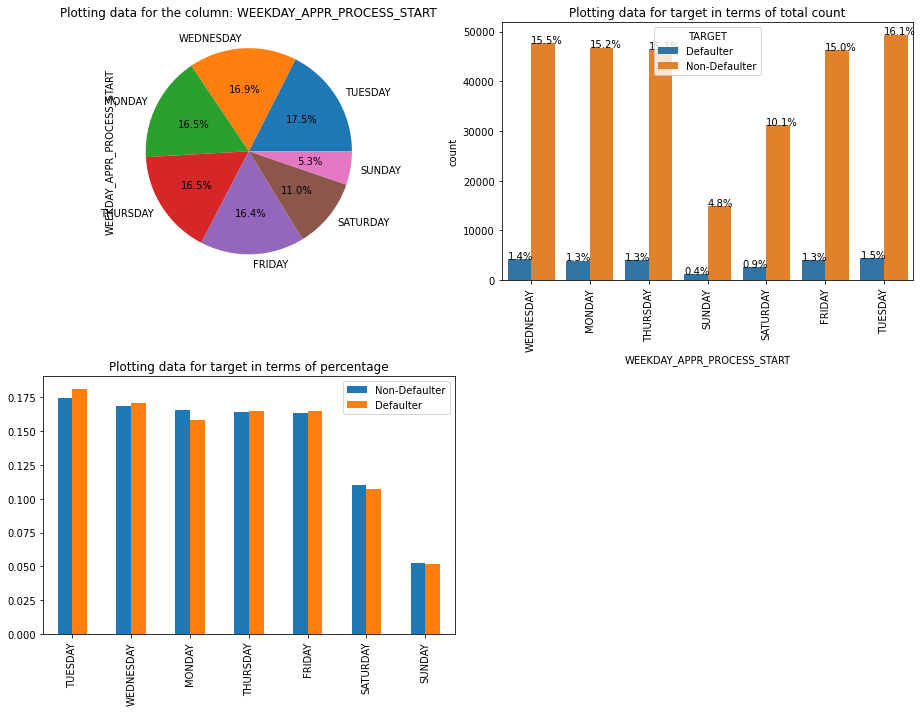

Plotting CODE_GENDER


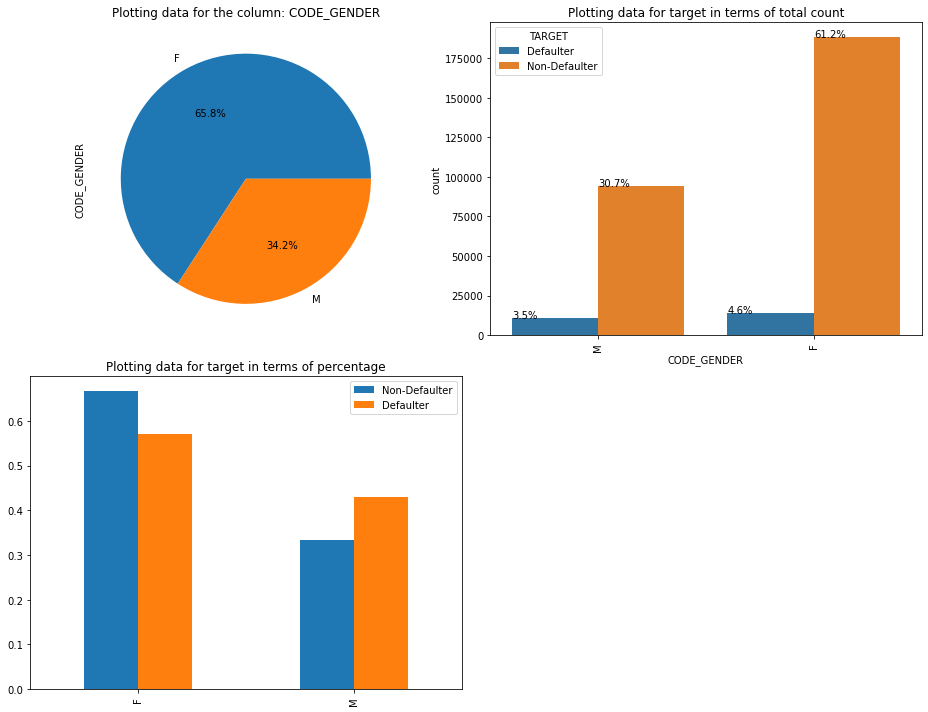

Plotting EMERGENCYSTATE_MODE


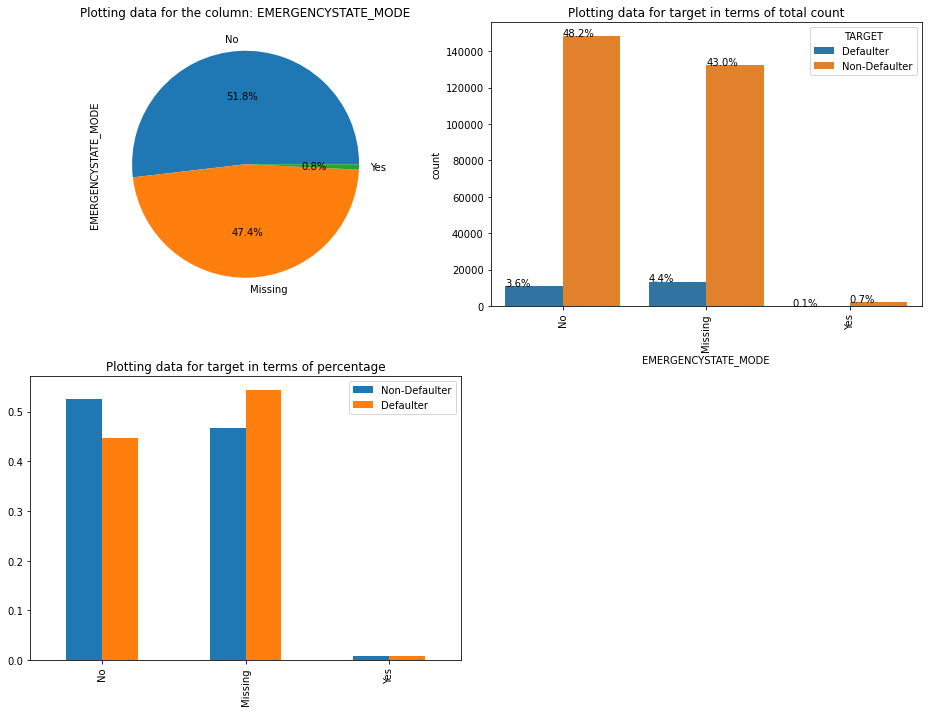

Plotting REG_REGION_NOT_LIVE_REGION


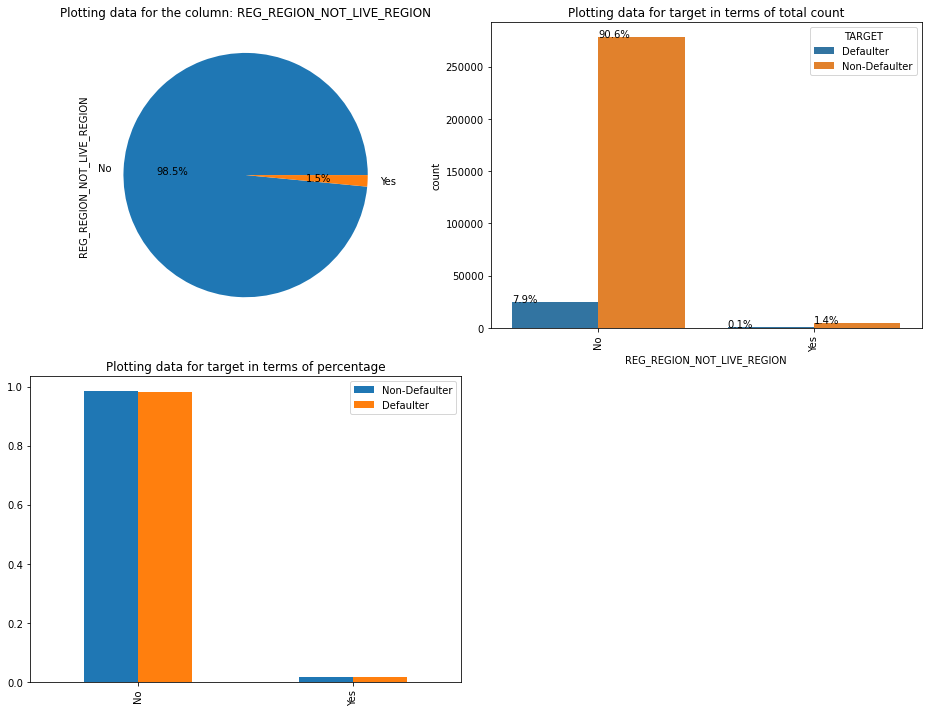

Plotting NAME_HOUSING_TYPE


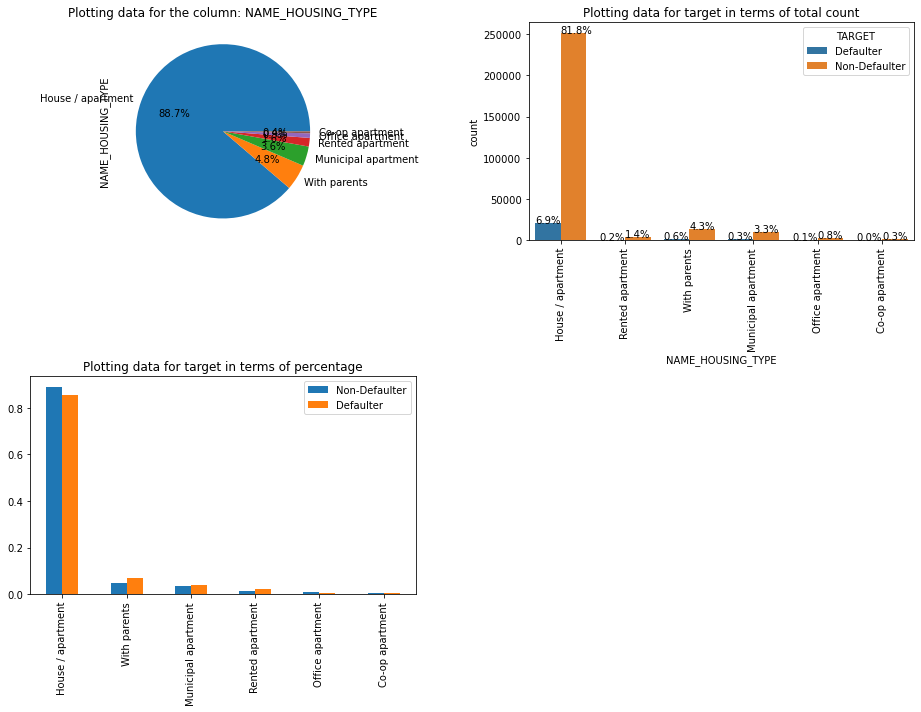

Plotting FLAG_MOBIL


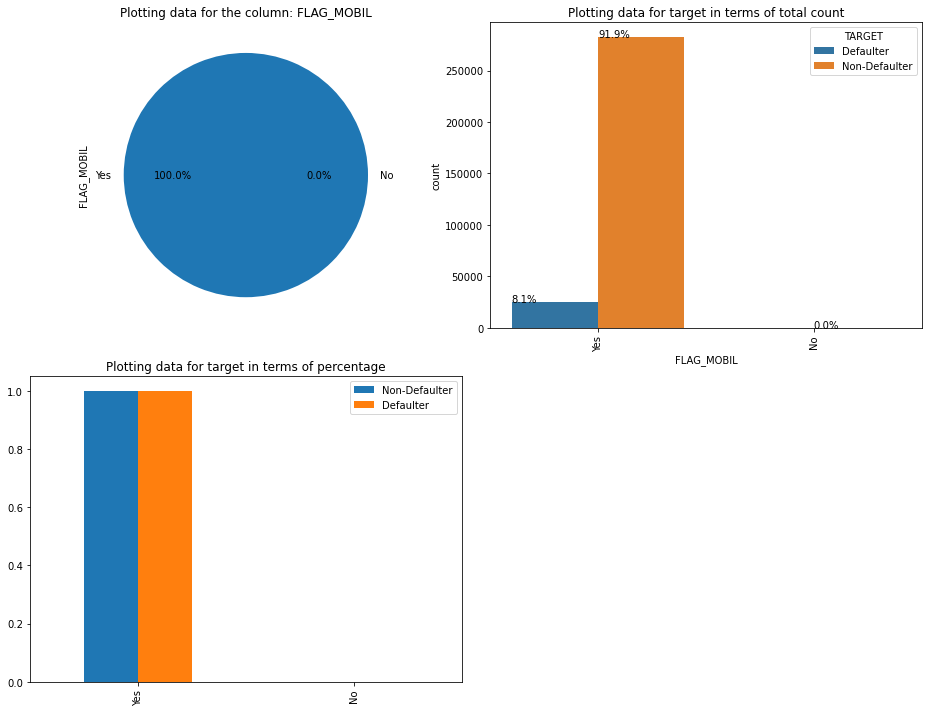

Plotting OCCUPATION_TYPE


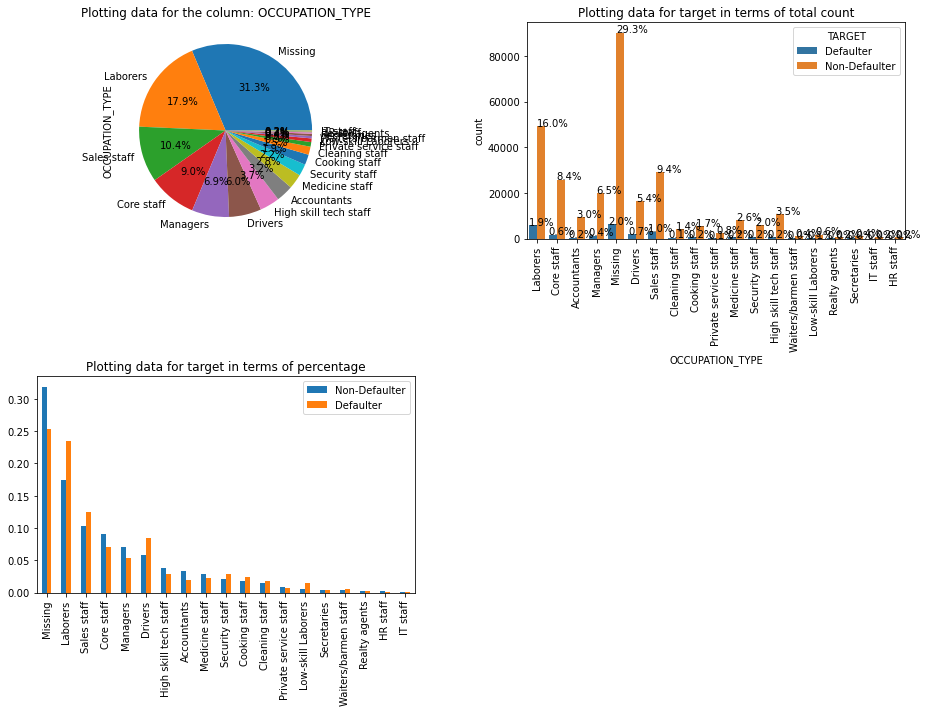

Plotting FLAG_EMAIL


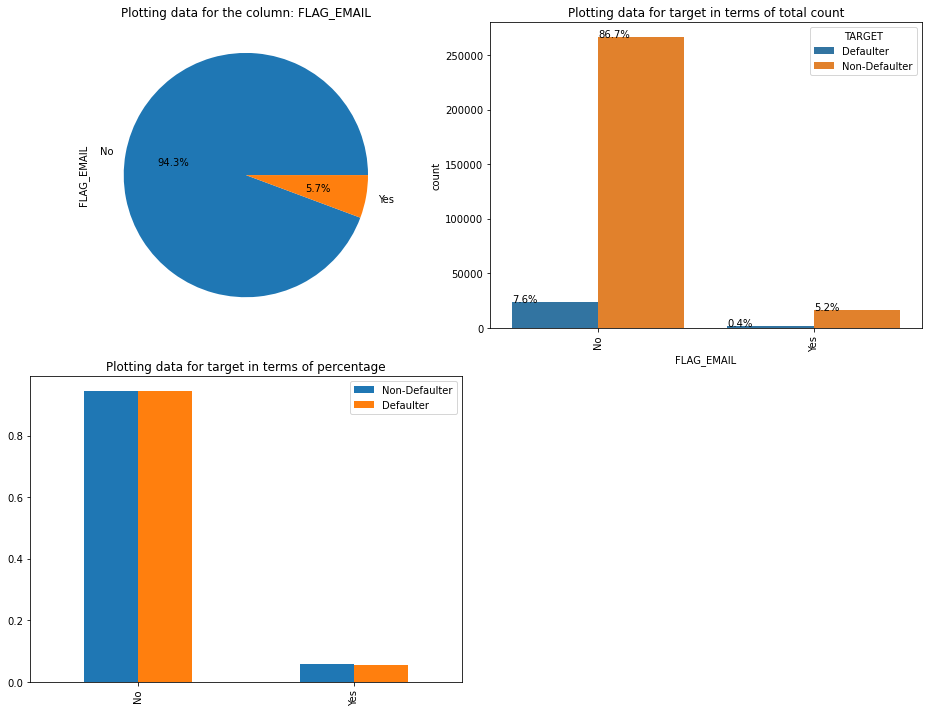

Plotting AMT_INCOME_TOTAL_BINS


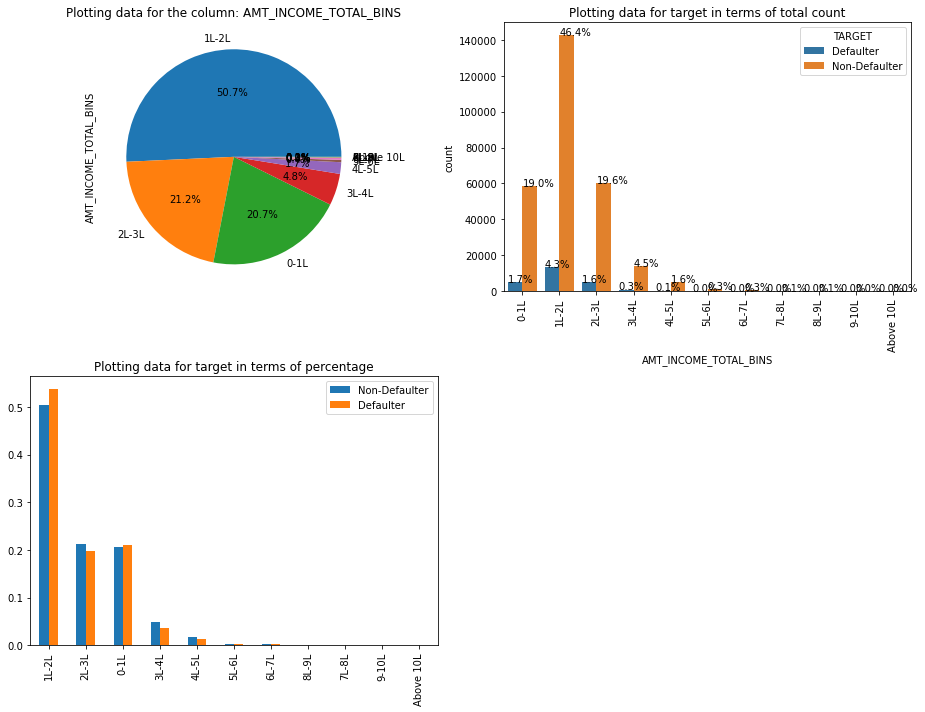

Plotting REG_REGION_NOT_WORK_REGION


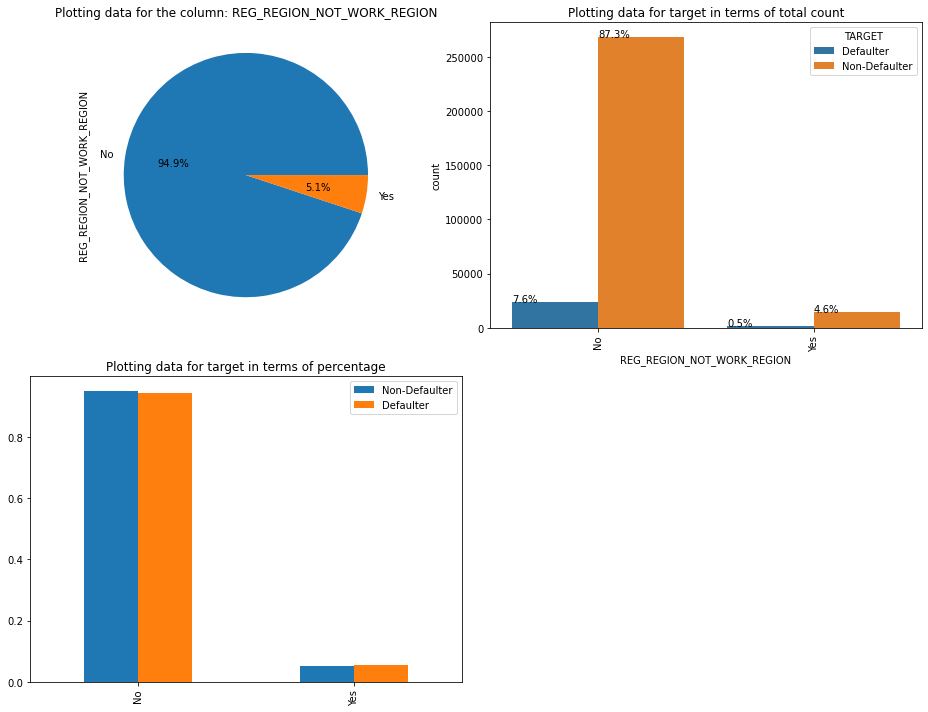

Plotting FLAG_WORK_PHONE


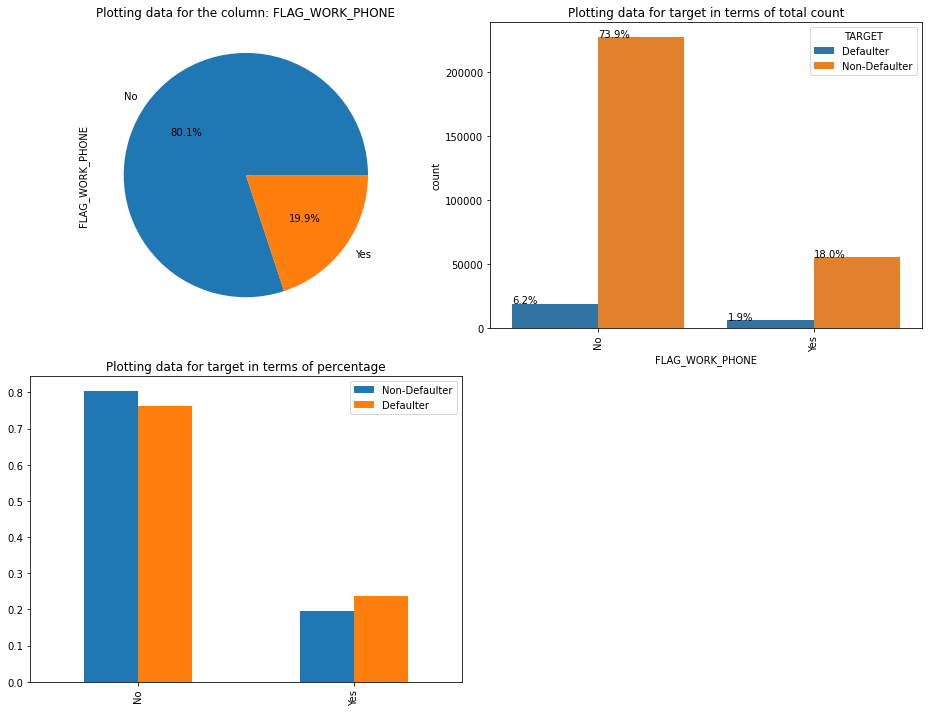

Plotting AMT_ANNUITY_RANGE


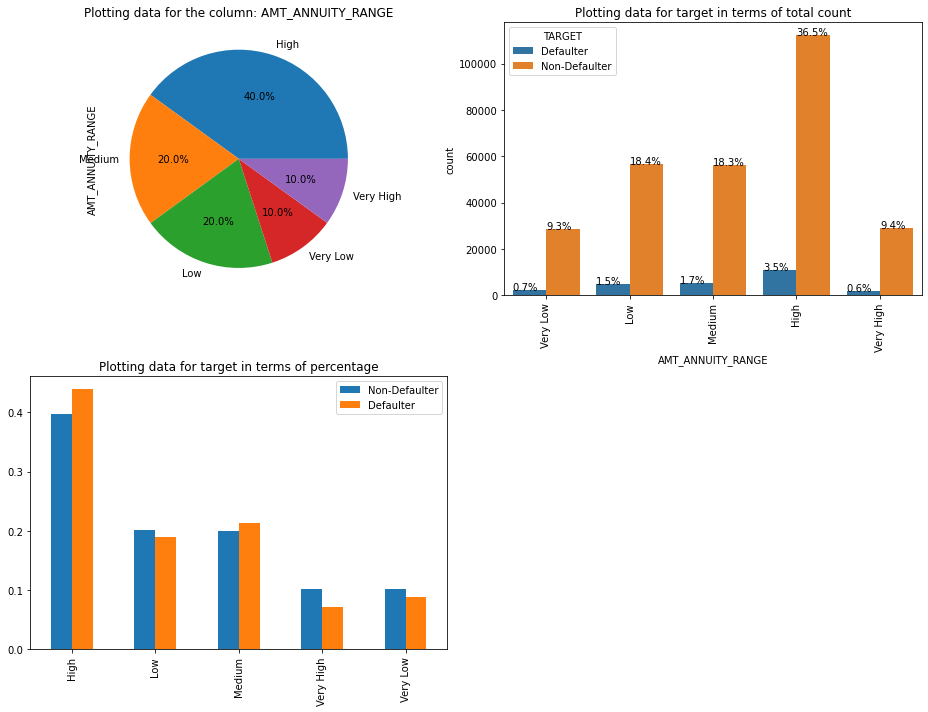

Plotting NAME_EDUCATION_TYPE


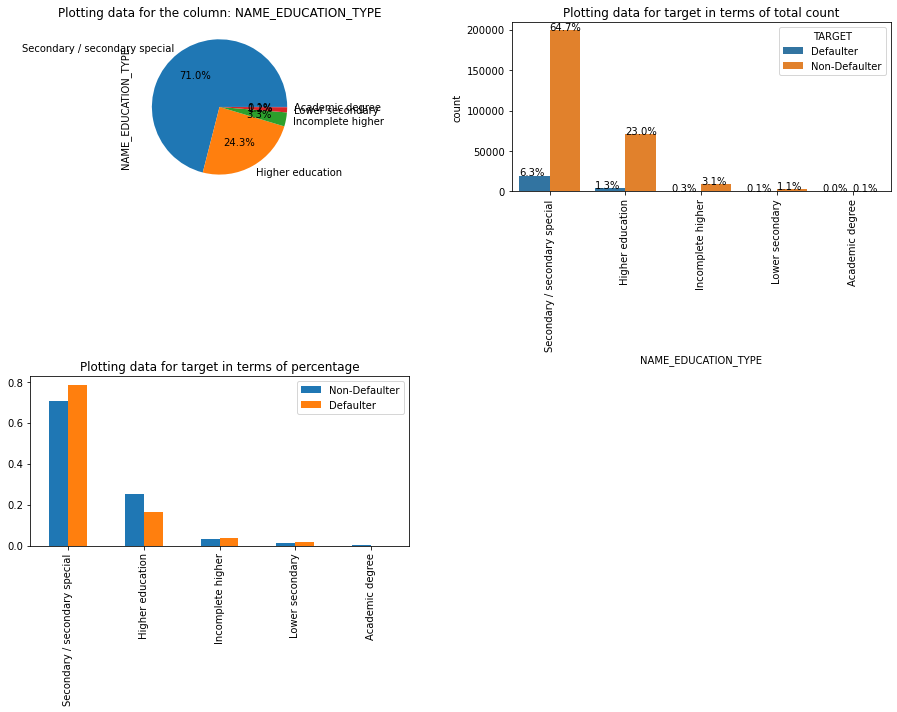

Plotting TARGET


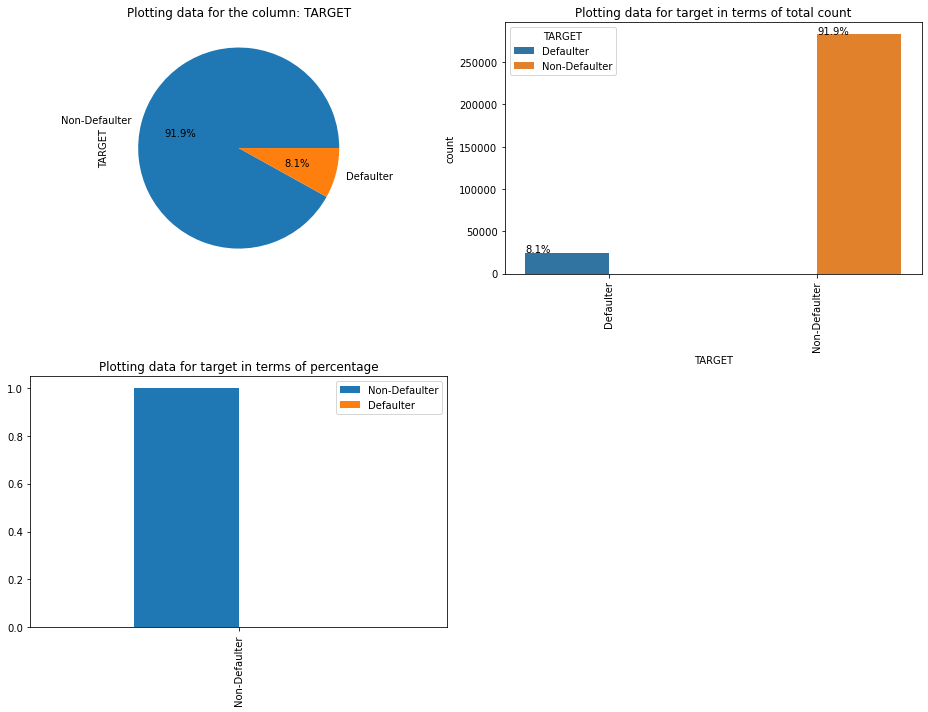

Plotting FLAG_OWN_CAR


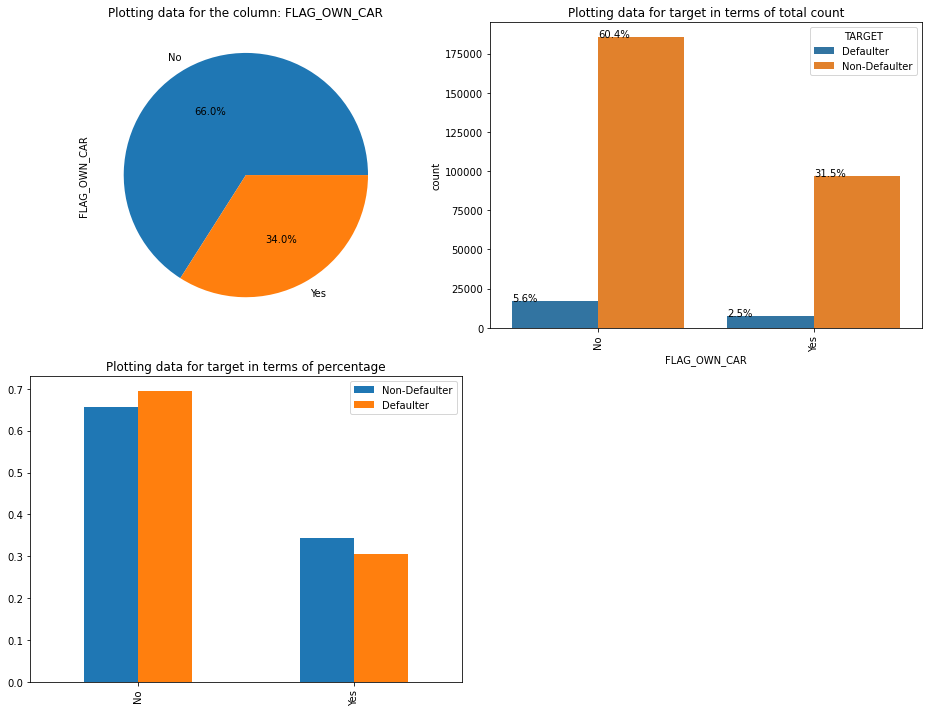

Plotting REG_CITY_NOT_WORK_CITY


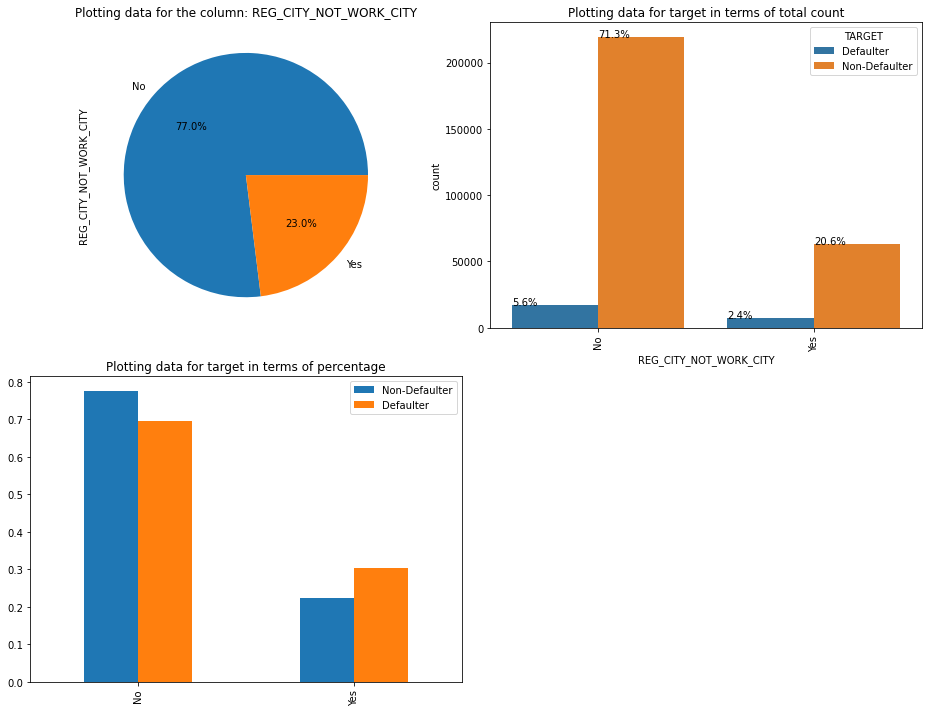

Plotting FLAG_OWN_REALTY


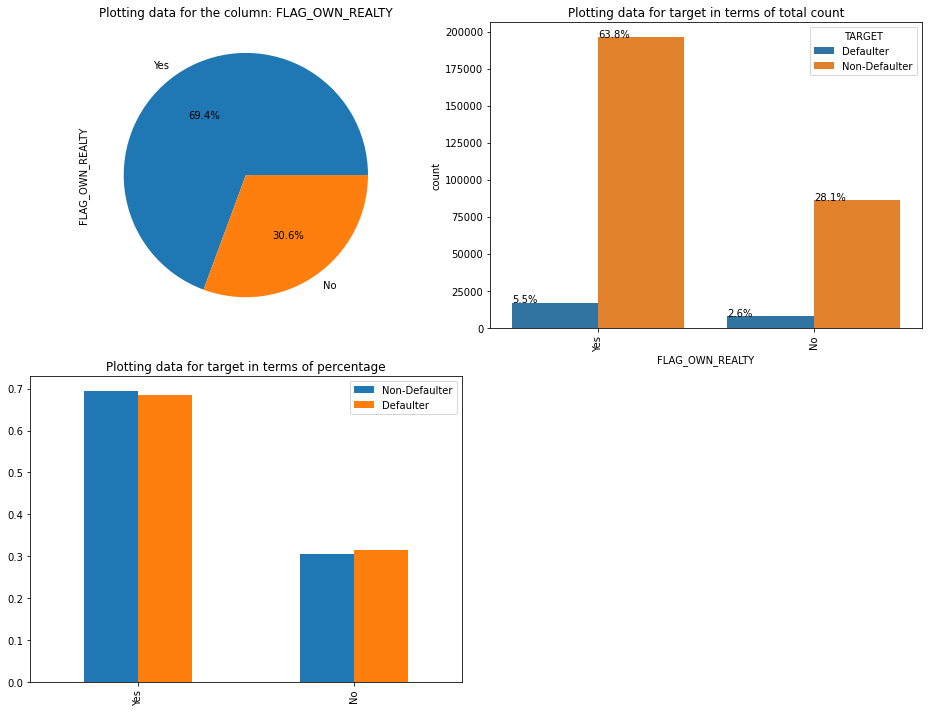

Plotting NAME_INCOME_TYPE


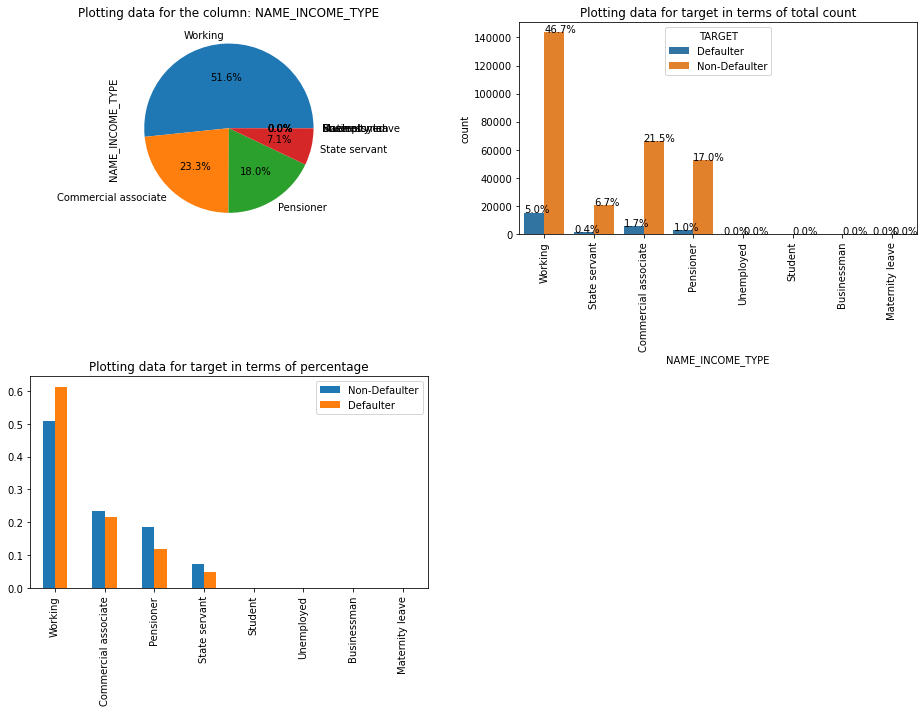

Plotting LIVE_CITY_NOT_WORK_CITY


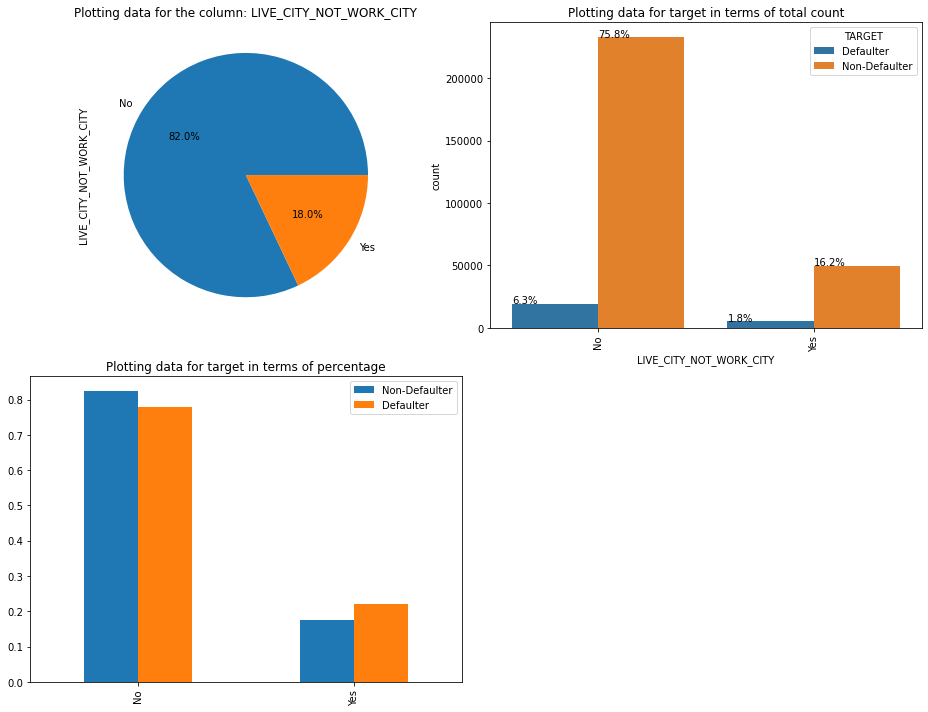

In [142]:
for column in cat_columns:
    print("Plotting",column)
    plotting(analysis_data, non_defaulter_df,defaulter_df, column)
    print("="*70)

### Observations

**CODE_GENDER**

- Most of females are defaulters as compared to men, but also most of females are non-defaulter. 
- This only means that most of the clients who are applying for loans are Female i.e (65.8%).
- Male clients are less in number in both the cases (defaulter and non-defaulter)
- Male clients are likely to default more than females.
- We can see there is imbalance in Gender column as well.

----
**NAME_CONTRACT_TYPE**

- Most of the clients opt for cash loans as percentage of Cash loans is high for both Defaulters and Non-Defaulters.
- Defaulters are likely to occur on cash loans as compared to revolving loans. 
- Hence, we can say that most of the clients (90.5%) opt for Cash loans and 82.9% of them are non-defaulters.

----
**AMT_INCOME_TOTAL**

- 50.7 % of clients have income range between 1-2 lakhs.
- Also, 4.3% of clients with payment difficulties and 46.4% of clients who are non-defaulters have income range between 1-2 lakhs
- People who have income range between 1-2 lakhs tend to default
- We can say that most of the clients who apply for loans have low-income range  i.e., from 1-4 Lakhs.
 
----
**NAME_INCOME_TYPE**

- 51.6 of clients who apply for loan have working income type and 23.3% of clients have commercial associate.
- Most of the Defaulters and No-defaulters  have working income type
- People who are Unemployed, Student, BusinessMan and are on maternity leave usually apply very few loans as compared to other income types
- This tell us that most of the clients having working income type earn bit less and need loans.

----
**NAME_EDUCATION_TYPE**

- 71 % of clients have Secondary/secondary special as their level of highest education.
- Most of them are non-defaulters 
- 6.3% of them have payment difficulties
- Clients who have payment difficulties are found more from this category of highest education. 
- Hence, we can say that most of the defaulters who apply for loans have highest level of education as Secondary/secondary special, Lower Secondary and incomplete higher.
- Clients with Academic Degree apply for very less loans.

----
**NAME_OCCUPATION_TYPE**

- After adding Missing category, next highest count is of Laborers, which tells us that most of the people with occupation as laborers apply for loan
- 16.0% of them are non-defaulters
- 1.9% of them have payment difficulties
- Second most common category is sales staff and then core staff.
- People with occupations Sales staff, Drivers and Waiters/barmen staff, Security staff, Laborers, Cleaning staff and Cooking staff tend to default.

----
**EMPLOYEMENT_YEAR_RANGE**

- Most  of the  clients who apply for loan have recently started working  before applying for loans.
- 25.7% of clients have been working from 5-10 years before giving the application for loan
- Clients with payment difficulties apply for loans within 1-5 year of current employment.
- People who have been employed for more than 5 years have lesser default rate.

----
**AGE_GROUP**

- There is no skewness in the age group column. 
- Most of the clients belong to 35-40 years age group.
- Clients applying for loan have minimum age of 20 years
- Maximum age of client applying for loan is 70 years.
- Defaulters are mostly from 20-40 years age group.

----
**NAME_FAMILY_STATUS**

- Most of the clients who are married (59%), apply for loans.
- Also, maximum clients with payment difficulties occur from married category.
- This tell us that people usually take loans after marriage .
- Also,  13.3% of clients who are Single/ not married apply loans and percentage of widow clients is less for applying loans.
- This attribute doesn’t help us to differentiate between defaulters and non-defaulters as single people have high default rate, but also civil married and separated  people have high rate.
----
**ORGANIZATION TYPE**

- 22.1% of clients who apply for loan work in Business Entity Type 3 Organization.
- 18% of values are XNA i.e., not provided by the clients
- 12 % of clients are self-employed, meaning take loans to fund their business.
- People who are Self-employed, work in construction, trade tend to default a lot.
----
**NAME_HOUSING_TYPE**

- 88.7% of clients live in house/apartment. 
- 81.8% of them are non-defaulters 
- 6.9% have payment difficulties
- Very few clients live in co-op apartment, office apartment, rented apartment and Municipal apartment.
- Very few people live with their parents meaning, most of the clients are adults and have moved out of house
- People who live with parents, in municipal apartment and rented apartment, which means they don’t own a house, tend to default a lot.
----
**AMT_ANNUITY**

- 40% of clients who apply for loan pay high loan annuity
- 10% of clients who apply for loan have pay very  high loan annuity
- 10% of clients who apply for loan pay very low loan annuity
- Most of the defaulters and Non-defaulters have High annuity range
- Very Low: [ 1615.5, 11074.5] 
- Low: [11074.5, 18189. ]
- Medium:[18189., 24903.]
- High: [24903., 45954.]
- Very High: [ 45954. , 258025.5]

**FLAG_OWN_CAR**
- Insights:
- 66% of clients who apply for loan don’t own car
- Only 34% of clients who apply for loans have car, out of which
31.5% of them are non-defaulters 
2.5% have payment difficulties
- Percentage of clients with payment difficulties having no car is higher than clients with payment difficulties having car.

**FLAG_OWN_REALTY**
- 30.6% of clients who apply for loan don’t have their own house
- Only 69.4% of clients who apply for loans have their own house out of which
63.8% of them are non-defaulters 
5.5% have payment difficulties

**FLAG_CONT_MOBILE**
- Most of the clients were reachable through the contact provided by them. The distribution for FLAG_CONT_MOBILE is highly skewed to wards Yes  



In [143]:
analysis_data[analysis_data['NAME_INCOME_TYPE']=='Working']['AMT_INCOME_TOTAL_BINS'].value_counts()

1L-2L        84990
0-1L         32432
2L-3L        32318
3L-4L         6255
4L-5L         1943
5L-6L          327
6L-7L          280
8L-9L          105
7L-8L           40
9-10L            9
Above 10L        4
Name: AMT_INCOME_TOTAL_BINS, dtype: int64

In [144]:
analysis_data[analysis_data['NAME_TYPE_SUITE']=='Family']['NAME_INCOME_TYPE'].value_counts()

Working                 19998
Commercial associate     8770
Pensioner                8491
State servant            2888
Businessman                 1
Student                     1
Name: NAME_INCOME_TYPE, dtype: int64

In [145]:
analysis_data[analysis_data['NAME_TYPE_SUITE']=='Unaccompanied']['NAME_INCOME_TYPE'].value_counts()

Working                 129450
Commercial associate     59045
Pensioner                43691
State servant            17583
Unemployed                  22
Student                     15
Businessman                  9
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

## Univariate Analysis for Numerical columns

In [146]:
num_columns = standard_df.select_dtypes(include=['int64','float64']).columns
num_columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL_LAC', 'AMT_CREDIT_LAC',
       'AMT_GOODS_PRICE_LAC', 'AGE_YEARS', 'EMP

#### Look for only REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY  DAYS_REGISTRATION

AS I have analyzed other columns in previous steps and SK_ID_CURR need not to be analyzed

In [147]:
analysis_data['REGION_RATING_CLIENT'].value_counts(normalize=True)*100

2    73.813294
3    15.716511
1    10.470195
Name: REGION_RATING_CLIENT, dtype: float64

In [148]:
analysis_data['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)*100

2    74.626274
3    14.262904
1    11.110822
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

In [149]:
n_columns=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION']

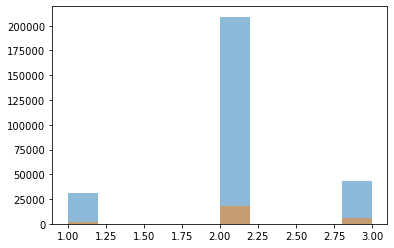

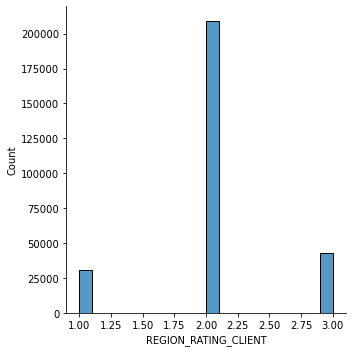

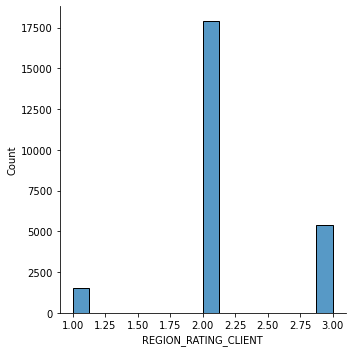

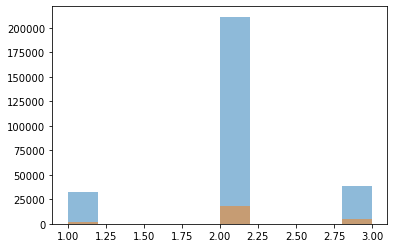

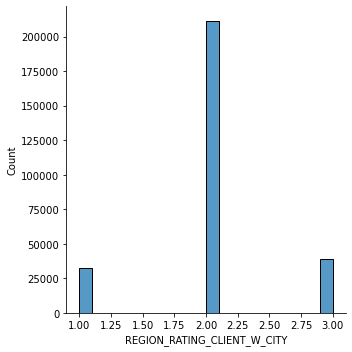

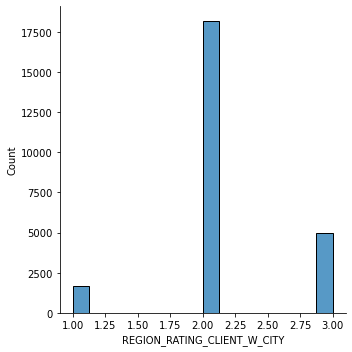

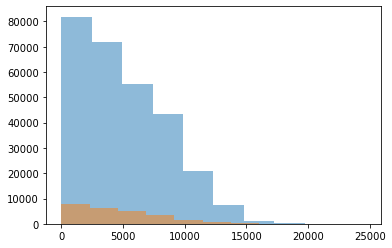

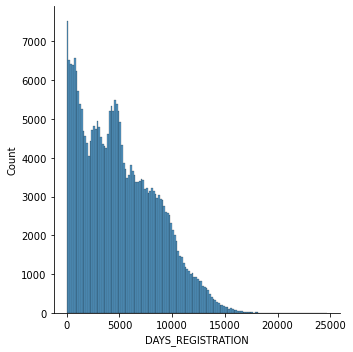

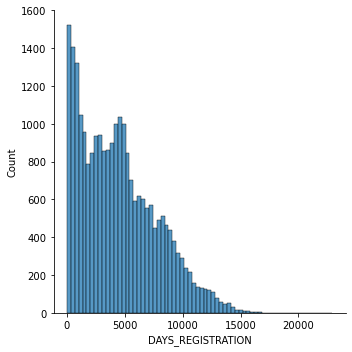

In [150]:
for column in n_columns:
    plt.hist(non_defaulter_df[column],alpha=0.5,label='0')
    plt.hist(defaulter_df[column],alpha=0.5,label='1')
    plt.show()
    
    sns.displot(non_defaulter_df[column], label='0')
    sns.displot(defaulter_df[column], label='1')
    
    plt.show()
    print("========================================================")

## Bivariate Numerical analysis

In [151]:
num_columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL_LAC', 'AMT_CREDIT_LAC',
       'AMT_GOODS_PRICE_LAC', 'AGE_YEARS', 'EMP

#### Checking for amount columns

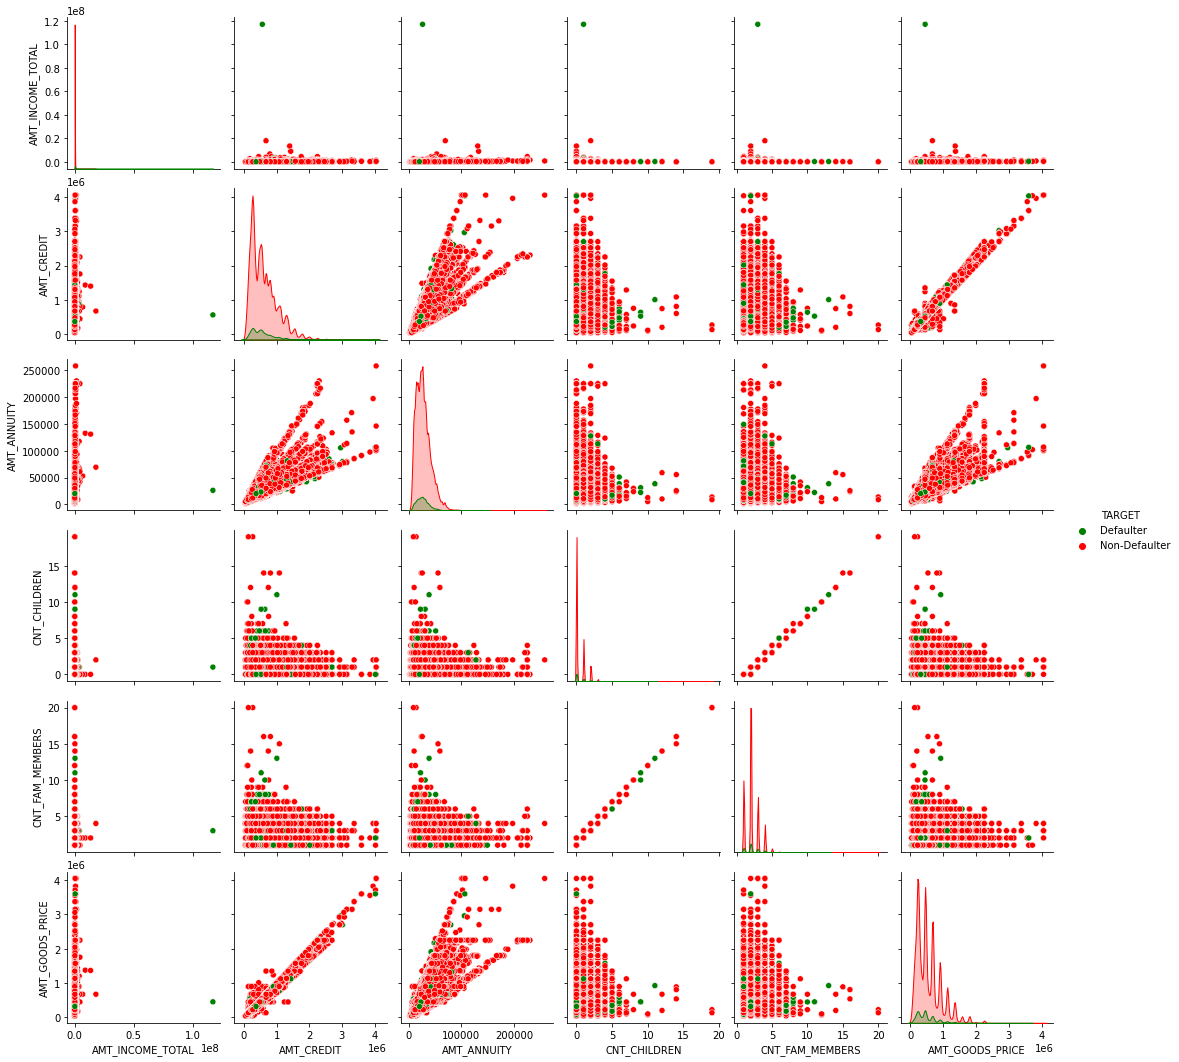

In [252]:
bi_col= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE','TARGET']
num_data=standard_df[bi_col]
sns.pairplot(num_data,hue="TARGET",palette=["g","r"])
plt.show()

**Observation**
- Children count and family count are strongly linearly related
- when children count and family member count is more than 8, defaulters are more.
- when credit amount is above 20 lakhs, defaulters are very less. 
- When Loan annuity is above 15,000 and Good Price is above 20 Lakhs, there is a lesser chance of defaulters.
- We can see amount credit and amount goods price have strong linear relations, whereas amount income total doesn't have any linear relationship with goods price, loan annuuity and amount credit.

## Correlation

In [153]:
corr_columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',  
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3']

In [154]:
corr_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMEN

In [155]:
corr_data=standard_df[corr_columns]
corr_data.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M             Yes             0   
1         Cash loans           F              No             0   
2    Revolving loans           M             Yes             0   
3         Cash loans           F             Yes             0   
4         Cash loans           M             Yes             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  \
0                        0.0                         1.0   Unaccompanied   
1                        0.0                         0.0          Family   
2                        0.0                         0.0   Unaccompanied   
3                        0.0                         0.0   Unaccompanied   
4                        0.0                         0.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             4260.0             2531        Laborers              1.0   
3             9833.0             2437        Laborers              2.0   
4             4311.0             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY              

In [156]:
target_0=standard_df.loc[standard_df.TARGET == 'Non-Defaulter']
target_1=standard_df.loc[standard_df.TARGET == 'Defaulter']

In [157]:
target_0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [158]:
target_0=target_0[corr_columns]

In [159]:
target_0.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DE

In [160]:
target_1=target_1[corr_columns]

**Non-Defaulters:**

In [161]:
corr = target_0.corr()
corr.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
count     23.000000         23.000000   23.000000    23.000000   
mean       0.051496          0.080989    0.137967     0.125086   
std        0.295727          0.253398    0.323772     0.308566   
min       -0.336966         -0.200466   -0.112238    -0.145144   
25%       -0.006442         -0.028202   -0.007872    -0.013194   
50%        0.000147          0.017676    0.005135     0.011660   
75%        0.021388          0.067712    0.067038     0.068901   
max        1.000000          1.000000    1.000000     1.000000   

       AMT_GOODS_PRICE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count        23.000000                   23.000000                  23.000000   
mean          0.138729                    0.053858                   0.063911   
std           0.324451                    0.211748                   0.214029   
min          -0.112579                   -0.014272                  -0.002483   
25%          -0.008795                   -0.001985                  -0.001581   
50%           0.005520                    0.001542                   0.001057   
75%           0.067062                    0.004239                   0.004684   
max           1.000000                    1.000000                   1.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                   23.000000                  23.000000   
mean                     0.056258                   0.054375   
std                      0.210853                   0.209104   
min                     -0.008105                  -0.063458   
25%                      0.000313                  -0.003241   
50%                      0.001656                   0.004457   
75%                      0.007192                   0.040637   
max                      1.000000                   1.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count                  23.000000                   23.000000   
mean                    0.054132                    0.065256   
std                     0.207504                    0.207937   
min                    -0.008105                   -0.030513   
25%                    -0.000147                   -0.003507   
50%                     0.005423                    0.015751   
75%                     0.016258                    0.043105   
max                     1.000000                    1.000000   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count                   23.000000   23.000000      23.000000   
mean                     0.030794    0.074592       0.054226   
std                      0.274898    0.275866       0.271403   
min                     -0.539005   -0.336966      -0.245174   
25%                     -0.005006   -0.005029      -0.069316   
50%                      0.001629    0.001871      -0.000932   
75%                      0.086049    0.061944       0.039394   
max                      1.000000    1.000000       1.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count          23.000000        23.000000        23.000000   
mean            0.049926         0.080439         0.064744   
std             0.233377         0.215980         0.291095   
min            -0.185792        -0.033980        -0.285823   
25%            -0.027663         0.001267        -0.007989   
50%             0.000363         0.011734         0.001542   
75%             0.037508         0.045185         0.031571   
max             1.000000         1.000000         1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count             23.000000                    23.000000   
mean               0.026462                     0.025946   
std                0.326594                     0.326496   
min               -0.539005                    -0.537301   
25%               -0.089591                    -0.090797   
50%                0.002109     

In [162]:
mask = np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

Creating corretaion matrix mask

In [163]:
mask.shape

(23, 23)

In [164]:
corr.shape

(23, 23)

In [165]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0.,

Putting 1 In the places where correlation matrix repeats itself

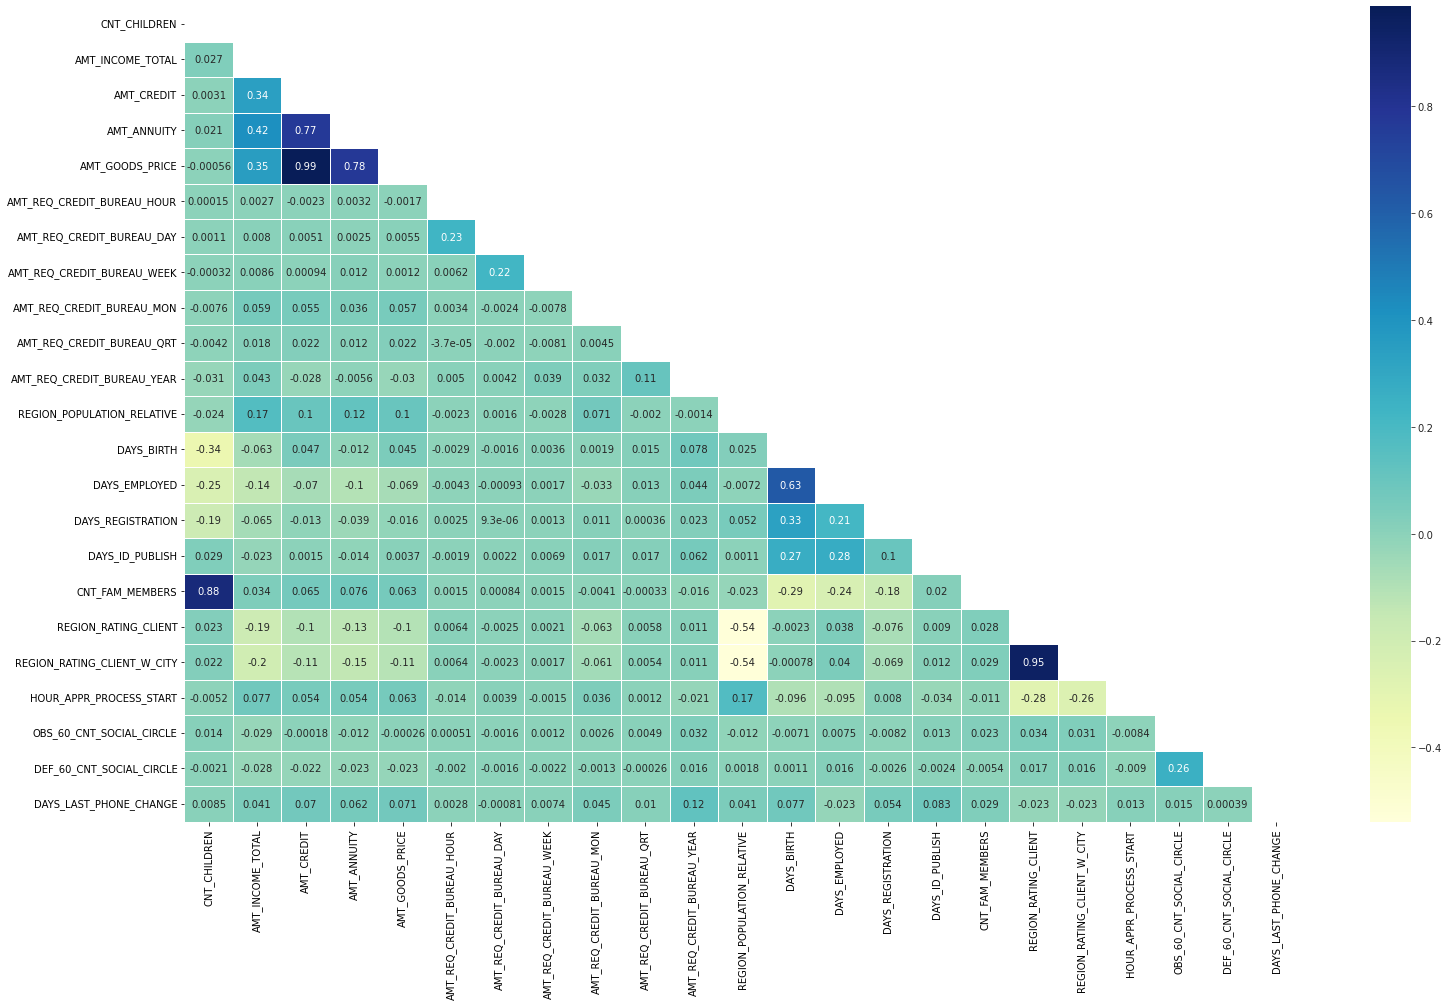

In [166]:
f, ax = plt.subplots(figsize=(25,15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,annot=True,linewidth =1,cmap='YlGnBu')

**Observation:**

- Count of children is highly correlated with family members count
- Income total  is  correlated with:
  Goods Price Amount,
  Loan Annuity,
  Credit Amount,
- Credit amount is highly correlated with:
  Income Total,
  Goods Price Amount,
  Loan Annuity,
- Days birth i.e., age is highly correlated with days employed.
- Also, there is high correlation between  rating of client’s region w.r.t. city and rating of client’s region.

**Defaulters:**

In [167]:
corr2 = target_1.corr()

In [168]:
mask2 = np.zeros_like(corr2)
mask2.shape

(23, 23)

In [169]:
corr2.shape

(23, 23)

In [170]:
mask2[np.triu_indices_from(mask2)] = True

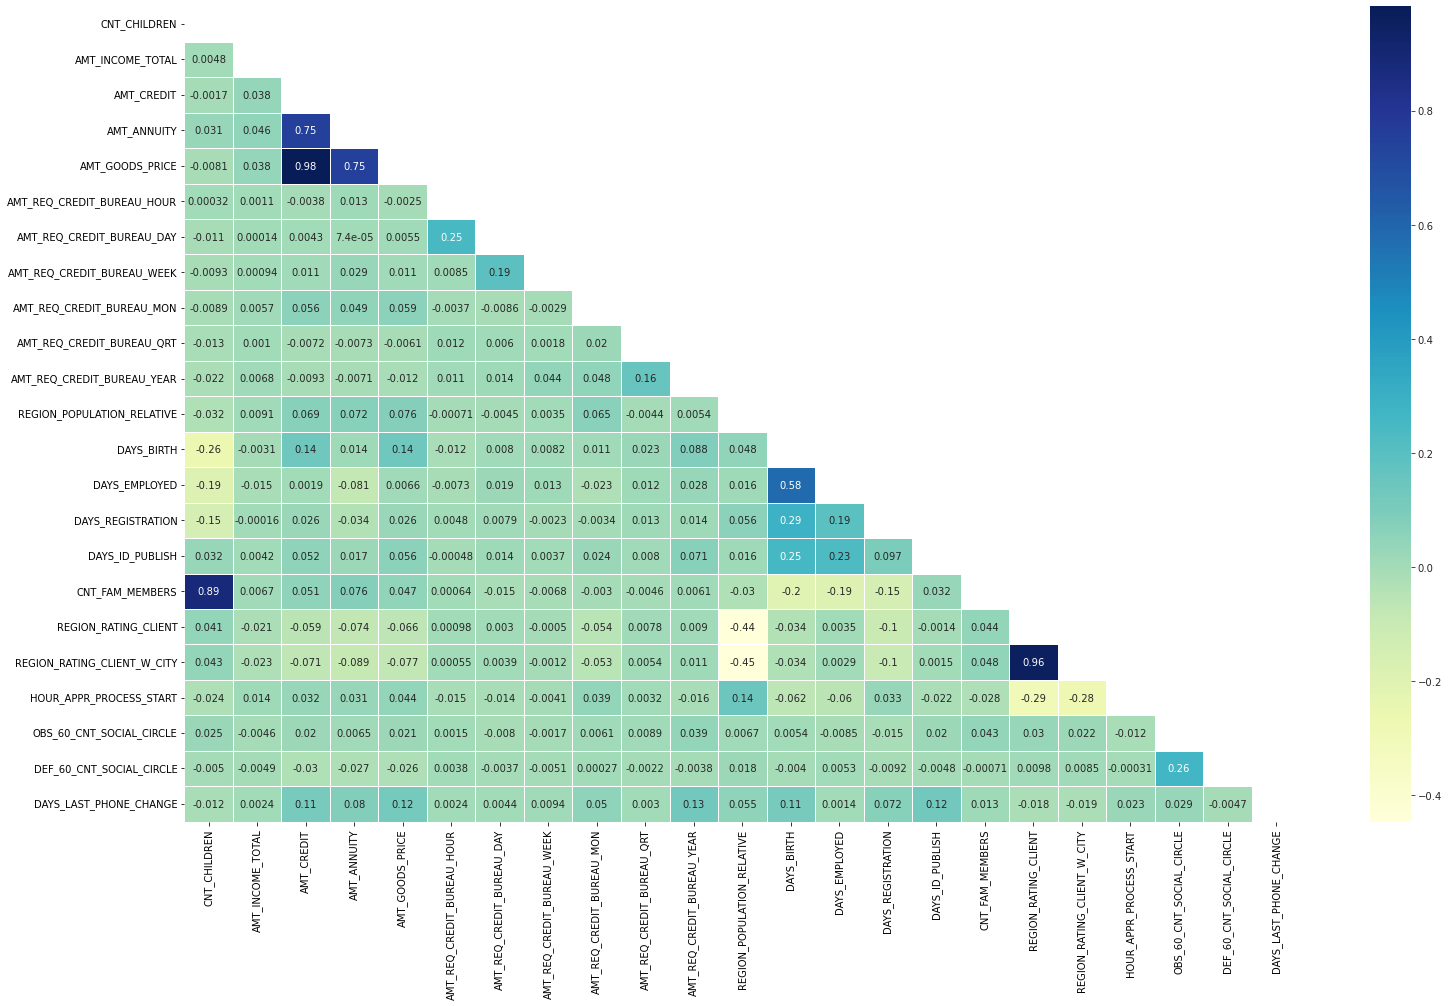

In [171]:
f, ax = plt.subplots(figsize=(25,15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr2, mask=mask2,annot=True,linewidth =1,cmap='YlGnBu')

**Observation:**

- Count of children is highly correlated with family members count here as well.
- Credit amount is highly correlated with:
  Goods Price Amount,
  Loan Annuity,
- Days birth i.e., age is not that highly correlated (0.58) with days employed as compared to non-defaulters.(0.63)
- Loan annuity ‘s correlation with goods price and Loan annuity ‘s correlation with  credit amount  have decreased by 0.23 and 0.22 respectively in case of defaulters.
- Total income is not highly correlated with any other variable, but for non-defaulters it was comparable correlated with Goods price, credit amount and loan annuity.


## Finding top 10 correlations

### FOR NON DEFAULTERS

In [172]:
target_0.corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.027397    0.003081   
AMT_INCOME_TOTAL                 0.027397          1.000000    0.342799   
AMT_CREDIT                       0.003081          0.342799    1.000000   
AMT_ANNUITY                      0.020909          0.418948    0.771297   
AMT_GOODS_PRICE                 -0.000559          0.349426    0.987022   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000147          0.002707   -0.002267   
AMT_REQ_CREDIT_BUREAU_DAY        0.001057          0.008029    0.005135   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.000315          0.008647    0.000941   
AMT_REQ_CREDIT_BUREAU_MON       -0.007640          0.058682    0.055063   
AMT_REQ_CREDIT_BUREAU_QRT       -0.004218          0.017676    0.021825   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.030513          0.042522   -0.027599   
REGION_POPULATION_RELATIVE      -0.024363          0.167851    0.100604   
DAYS_BIRTH                      -0.336966         -0.062609    0.047378   
DAYS_EMPLOYED                   -0.245174         -0.140392   -0.070104   
DAYS_REGISTRATION               -0.185792         -0.064937   -0.013477   
DAYS_ID_PUBLISH                  0.028751         -0.022896    0.001464   
CNT_FAM_MEMBERS                  0.878571          0.034254    0.064536   
REGION_RATING_CLIENT             0.022842         -0.186573   -0.103337   
REGION_RATING_CLIENT_W_CITY      0.021866         -0.200466   -0.112238   
HOUR_APPR_PROCESS_START         -0.005244          0.076743    0.053619   
OBS_60_CNT_SOCIAL_CIRCLE         0.014199         -0.028507   -0.000180   
DEF_60_CNT_SOCIAL_CIRCLE        -0.002125         -0.027897   -0.021859   
DAYS_LAST_PHONE_CHANGE           0.008501          0.041339    0.069541   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.020909        -0.000559   
AMT_INCOME_TOTAL                0.418948         0.349426   
AMT_CREDIT                      0.771297         0.987022   
AMT_ANNUITY                     1.000000         0.776421   
AMT_GOODS_PRICE                 0.776421         1.000000   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003220        -0.001698   
AMT_REQ_CREDIT_BUREAU_DAY       0.002465         0.005520   
AMT_REQ_CREDIT_BUREAU_WEEK      0.012377         0.001192   
AMT_REQ_CREDIT_BUREAU_MON       0.036291         0.056675   
AMT_REQ_CREDIT_BUREAU_QRT       0.011660         0.022134   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.005588        -0.029840   
REGION_POPULATION_RELATIVE      0.120977         0.103826   
DAYS_BIRTH                     -0.012260         0.044650   
DAYS_EMPLOYED                  -0.104975        -0.068527   
DAYS_REGISTRATION              -0.039435        -0.015891   
DAYS_ID_PUBLISH                -0.014111         0.003677   
CNT_FAM_MEMBERS                 0.075789         0.062763   
REGION_RATING_CLIENT           -0.132120        -0.104356   
REGION_RATING_CLIENT_W_CITY    -0.145144        -0.112579   
HOUR_APPR_PROCESS_START         0.053584         0.062710   
OBS_60_CNT_SOCIAL_CIRCLE       -0.012277        -0.000259   
DEF_60_CNT_SOCIAL_CIRCLE       -0.023052        -0.022910   
DAYS_LAST_PHONE_CHANGE          0.062012         0.071362   

                             AMT_REQ_CREDIT_BUREAU_HOUR  \
CNT_CHILDREN                                   0.000147   
AMT_INCOME_TOTAL                               0.002707   
AMT_CREDIT                                    -0.002267   
AMT_ANNUITY                                    0.003220   
AMT_GOODS_PRICE                               -0.001698   
AMT_REQ_CREDIT_BUREAU_HOUR                     1.000000   
AMT_REQ_CREDIT_BUREAU_DAY                      0.229543   
AMT_REQ_CREDIT_BUREAU_WEEK                     0.006243   
AMT_REQ_CREDIT_BUREAU_MON                      0.003431   
AMT_REQ_CREDIT_BUREAU_QRT                     -0.000037   
AMT_REQ_CREDIT_BUREAU_YEAR                     0.005047   
REGION_POPULATION_RELATIVE                    -0.002334

But we only need values with high correlation, hence we will avoid columns with -1 and 1 correlations

In [173]:
# taking absolute for negative correlations
target_0.corr().abs()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.027397    0.003081   
AMT_INCOME_TOTAL                 0.027397          1.000000    0.342799   
AMT_CREDIT                       0.003081          0.342799    1.000000   
AMT_ANNUITY                      0.020909          0.418948    0.771297   
AMT_GOODS_PRICE                  0.000559          0.349426    0.987022   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000147          0.002707    0.002267   
AMT_REQ_CREDIT_BUREAU_DAY        0.001057          0.008029    0.005135   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000315          0.008647    0.000941   
AMT_REQ_CREDIT_BUREAU_MON        0.007640          0.058682    0.055063   
AMT_REQ_CREDIT_BUREAU_QRT        0.004218          0.017676    0.021825   
AMT_REQ_CREDIT_BUREAU_YEAR       0.030513          0.042522    0.027599   
REGION_POPULATION_RELATIVE       0.024363          0.167851    0.100604   
DAYS_BIRTH                       0.336966          0.062609    0.047378   
DAYS_EMPLOYED                    0.245174          0.140392    0.070104   
DAYS_REGISTRATION                0.185792          0.064937    0.013477   
DAYS_ID_PUBLISH                  0.028751          0.022896    0.001464   
CNT_FAM_MEMBERS                  0.878571          0.034254    0.064536   
REGION_RATING_CLIENT             0.022842          0.186573    0.103337   
REGION_RATING_CLIENT_W_CITY      0.021866          0.200466    0.112238   
HOUR_APPR_PROCESS_START          0.005244          0.076743    0.053619   
OBS_60_CNT_SOCIAL_CIRCLE         0.014199          0.028507    0.000180   
DEF_60_CNT_SOCIAL_CIRCLE         0.002125          0.027897    0.021859   
DAYS_LAST_PHONE_CHANGE           0.008501          0.041339    0.069541   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.020909         0.000559   
AMT_INCOME_TOTAL                0.418948         0.349426   
AMT_CREDIT                      0.771297         0.987022   
AMT_ANNUITY                     1.000000         0.776421   
AMT_GOODS_PRICE                 0.776421         1.000000   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003220         0.001698   
AMT_REQ_CREDIT_BUREAU_DAY       0.002465         0.005520   
AMT_REQ_CREDIT_BUREAU_WEEK      0.012377         0.001192   
AMT_REQ_CREDIT_BUREAU_MON       0.036291         0.056675   
AMT_REQ_CREDIT_BUREAU_QRT       0.011660         0.022134   
AMT_REQ_CREDIT_BUREAU_YEAR      0.005588         0.029840   
REGION_POPULATION_RELATIVE      0.120977         0.103826   
DAYS_BIRTH                      0.012260         0.044650   
DAYS_EMPLOYED                   0.104975         0.068527   
DAYS_REGISTRATION               0.039435         0.015891   
DAYS_ID_PUBLISH                 0.014111         0.003677   
CNT_FAM_MEMBERS                 0.075789         0.062763   
REGION_RATING_CLIENT            0.132120         0.104356   
REGION_RATING_CLIENT_W_CITY     0.145144         0.112579   
HOUR_APPR_PROCESS_START         0.053584         0.062710   
OBS_60_CNT_SOCIAL_CIRCLE        0.012277         0.000259   
DEF_60_CNT_SOCIAL_CIRCLE        0.023052         0.022910   
DAYS_LAST_PHONE_CHANGE          0.062012         0.071362   

                             AMT_REQ_CREDIT_BUREAU_HOUR  \
CNT_CHILDREN                                   0.000147   
AMT_INCOME_TOTAL                               0.002707   
AMT_CREDIT                                     0.002267   
AMT_ANNUITY                                    0.003220   
AMT_GOODS_PRICE                                0.001698   
AMT_REQ_CREDIT_BUREAU_HOUR                     1.000000   
AMT_REQ_CREDIT_BUREAU_DAY                      0.229543   
AMT_REQ_CREDIT_BUREAU_WEEK                     0.006243   
AMT_REQ_CREDIT_BUREAU_MON                      0.003431   
AMT_REQ_CREDIT_BUREAU_QRT                      0.000037   
AMT_REQ_CREDIT_BUREAU_YEAR                     0.005047   
REGION_POPULATION_RELATIVE                     0.002334

In [174]:
target_0.corr().abs().unstack()

CNT_CHILDREN            CNT_CHILDREN                   1.000000
                        AMT_INCOME_TOTAL               0.027397
                        AMT_CREDIT                     0.003081
                        AMT_ANNUITY                    0.020909
                        AMT_GOODS_PRICE                0.000559
                                                         ...   
DAYS_LAST_PHONE_CHANGE  REGION_RATING_CLIENT_W_CITY    0.022702
                        HOUR_APPR_PROCESS_START        0.012854
                        OBS_60_CNT_SOCIAL_CIRCLE       0.015116
                        DEF_60_CNT_SOCIAL_CIRCLE       0.000385
                        DAYS_LAST_PHONE_CHANGE         1.000000
Length: 529, dtype: float64

In [175]:
target_0.corr().abs().unstack().sort_values(kind="quicksort")

AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000009
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000009
AMT_REQ_CREDIT_BUREAU_HOUR   AMT_REQ_CREDIT_BUREAU_QRT      0.000037
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_HOUR     0.000037
AMT_REQ_CREDIT_BUREAU_HOUR   CNT_CHILDREN                   0.000147
                                                              ...   
REGION_RATING_CLIENT         REGION_RATING_CLIENT           1.000000
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY    1.000000
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE         1.000000
Length: 529, dtype: float64

In [176]:
corr_0 = target_0.corr().abs().unstack().sort_values(kind="quicksort").dropna()
corr_0

AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000009
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000009
AMT_REQ_CREDIT_BUREAU_HOUR   AMT_REQ_CREDIT_BUREAU_QRT      0.000037
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_HOUR     0.000037
AMT_REQ_CREDIT_BUREAU_HOUR   CNT_CHILDREN                   0.000147
                                                              ...   
REGION_RATING_CLIENT         REGION_RATING_CLIENT           1.000000
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY    1.000000
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE         1.000000
Length: 529, dtype: float64

In [177]:
# avoiding correlation between same columns 
corr_0=corr_0[corr_0 != 1.0]
corr_0

AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000009
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000009
AMT_REQ_CREDIT_BUREAU_HOUR   AMT_REQ_CREDIT_BUREAU_QRT      0.000037
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_HOUR     0.000037
AMT_REQ_CREDIT_BUREAU_HOUR   CNT_CHILDREN                   0.000147
                                                              ...   
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
Length: 506, dtype: float64

In [178]:
corr_0.sort_values(ascending=False).head(20)

AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776421
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776421
AMT_CREDIT                   AMT_ANNUITY                    0.771297
AMT_ANNUITY                  AMT_CREDIT                     0.771297
DAYS_BIRTH                   DAYS_EMPLOYED                  0.626114
DAYS_EMPLOYED                DAYS_BIRTH                     0.626114
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.539005
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.539005
REGION_RATING_CLIENT_W_CITY  REGIO

### For Defaulters

In [179]:
target_1.corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.004796   -0.001675   
AMT_INCOME_TOTAL                 0.004796          1.000000    0.038131   
AMT_CREDIT                      -0.001675          0.038131    1.000000   
AMT_ANNUITY                      0.031257          0.046421    0.752195   
AMT_GOODS_PRICE                 -0.008111          0.037591    0.982783   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000316          0.001079   -0.003771   
AMT_REQ_CREDIT_BUREAU_DAY       -0.011255          0.000135    0.004346   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.009316          0.000941    0.010598   
AMT_REQ_CREDIT_BUREAU_MON       -0.008852          0.005718    0.056227   
AMT_REQ_CREDIT_BUREAU_QRT       -0.013029          0.001037   -0.007201   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.021572          0.006802   -0.009317   
REGION_POPULATION_RELATIVE      -0.031975          0.009135    0.069161   
DAYS_BIRTH                      -0.259109         -0.003096    0.135316   
DAYS_EMPLOYED                   -0.192864         -0.014977    0.001930   
DAYS_REGISTRATION               -0.149154         -0.000158    0.025854   
DAYS_ID_PUBLISH                  0.032299          0.004215    0.052329   
CNT_FAM_MEMBERS                  0.885484          0.006654    0.051224   
REGION_RATING_CLIENT             0.040680         -0.021486   -0.059193   
REGION_RATING_CLIENT_W_CITY      0.043185         -0.022808   -0.071377   
HOUR_APPR_PROCESS_START         -0.023899          0.013775    0.031782   
OBS_60_CNT_SOCIAL_CIRCLE         0.025285         -0.004588    0.020242   
DEF_60_CNT_SOCIAL_CIRCLE        -0.005039         -0.004852   -0.030461   
DAYS_LAST_PHONE_CHANGE          -0.011547          0.002429    0.110851   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.031257        -0.008111   
AMT_INCOME_TOTAL                0.046421         0.037591   
AMT_CREDIT                      0.752195         0.982783   
AMT_ANNUITY                     1.000000         0.752295   
AMT_GOODS_PRICE                 0.752295         1.000000   
AMT_REQ_CREDIT_BUREAU_HOUR      0.012968        -0.002451   
AMT_REQ_CREDIT_BUREAU_DAY       0.000074         0.005457   
AMT_REQ_CREDIT_BUREAU_WEEK      0.028784         0.010793   
AMT_REQ_CREDIT_BUREAU_MON       0.049000         0.059112   
AMT_REQ_CREDIT_BUREAU_QRT      -0.007261        -0.006114   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.007090        -0.011593   
REGION_POPULATION_RELATIVE      0.071690         0.076053   
DAYS_BIRTH                      0.014303         0.135738   
DAYS_EMPLOYED                  -0.081207         0.006648   
DAYS_REGISTRATION              -0.034279         0.025661   
DAYS_ID_PUBLISH                 0.016767         0.056061   
CNT_FAM_MEMBERS                 0.075711         0.047367   
REGION_RATING_CLIENT           -0.073784        -0.066367   
REGION_RATING_CLIENT_W_CITY    -0.089291        -0.077170   
HOUR_APPR_PROCESS_START         0.031236         0.044302   
OBS_60_CNT_SOCIAL_CIRCLE        0.006465         0.021009   
DEF_60_CNT_SOCIAL_CIRCLE       -0.026966        -0.025822   
DAYS_LAST_PHONE_CHANGE          0.079870         0.118232   

                             AMT_REQ_CREDIT_BUREAU_HOUR  \
CNT_CHILDREN                                   0.000316   
AMT_INCOME_TOTAL                               0.001079   
AMT_CREDIT                                    -0.003771   
AMT_ANNUITY                                    0.012968   
AMT_GOODS_PRICE                               -0.002451   
AMT_REQ_CREDIT_BUREAU_HOUR                     1.000000   
AMT_REQ_CREDIT_BUREAU_DAY                      0.247511   
AMT_REQ_CREDIT_BUREAU_WEEK                     0.008531   
AMT_REQ_CREDIT_BUREAU_MON                     -0.003684   
AMT_REQ_CREDIT_BUREAU_QRT                      0.011895   
AMT_REQ_CREDIT_BUREAU_YEAR                     0.010624   
REGION_POPULATION_RELATIVE                    -0.000710

In [180]:
corr_1 = target_1.corr().abs().unstack().sort_values(kind="quicksort").dropna()
corr_1

AMT_ANNUITY                  AMT_REQ_CREDIT_BUREAU_DAY      0.000074
AMT_REQ_CREDIT_BUREAU_DAY    AMT_ANNUITY                    0.000074
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000135
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000135
AMT_INCOME_TOTAL             DAYS_REGISTRATION              0.000158
                                                              ...   
REGION_RATING_CLIENT         REGION_RATING_CLIENT           1.000000
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY    1.000000
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE         1.000000
Length: 529, dtype: float64

In [181]:
corr_1=corr_1[corr_1 != 1.0]
corr_1

AMT_ANNUITY                  AMT_REQ_CREDIT_BUREAU_DAY      0.000074
AMT_REQ_CREDIT_BUREAU_DAY    AMT_ANNUITY                    0.000074
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000135
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000135
AMT_INCOME_TOTAL             DAYS_REGISTRATION              0.000158
                                                              ...   
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
Length: 506, dtype: float64

In [182]:
corr_1.sort_values(ascending=False).head(20)

AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752295
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752295
AMT_ANNUITY                  AMT_CREDIT                     0.752195
AMT_CREDIT                   AMT_ANNUITY                    0.752195
DAYS_EMPLOYED                DAYS_BIRTH                     0.582185
DAYS_BIRTH                   DAYS_EMPLOYED                  0.582185
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.446977
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.446977
REGION_POPULATION_RELATIVE   REGIO

## Importing Data Set 2- Previous Application

In [183]:
prev_appl_df=pd.read_csv('previous_application.csv')
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Data Understanding 2

In [184]:
prev_appl_df.shape

(1670214, 37)

**Observation:**
- data have 37 columns and 1670214 rows

In [185]:
prev_appl_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [186]:
prev_appl_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

**Observation** : From the above summarized statistical data we can see that:
- We can see that there are negative values in the day columns: **DAYS_DECISION**, **SELLERPLACE_AREA**, **DAYS_FIRST_DUE**, **DAYS_FIRST_DRAWING**, **DAYS_LAST_DUE_1ST_VERSION**, **DAYS_LAST_DUE**, **DAYS_TERMINATION** .

- columns with high values also exist, i.e. **AMT_ANNUITY**, **AMT_CREDIT** and **AMT_GOODS_PRICE**

In [187]:
prev_appl_df.nunique(axis=0).sort_values(ascending=False).head()

SK_ID_PREV           1670214
AMT_ANNUITY           357959
SK_ID_CURR            338857
RATE_DOWN_PAYMENT     207033
AMT_APPLICATION        93885
dtype: int64

**Observation**:
- Here we can see only **SK_ID_PREV** column have unique values in data set

## Handling Null Values 2

In [188]:
prev_appl_df.isnull().sum()/len(prev_appl_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [189]:
high_null_vals= prev_appl_df[filter_nullval(prev_appl_df.isnull().sum(),prev_appl_df,.5)]
high_null_vals.columns

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

Only 4 columns with null values greater than 50%

**dropping null values >50%**

In [190]:
prev_appl_df.drop(columns=high_null_vals.columns,inplace=True)

In [191]:
prev_appl_df.shape

(1670214, 33)

After dropping 4 columns 33 columns are left.

**checking for null values >20**

In [192]:
med_null_vals=prev_appl_df[filter_nullval(prev_appl_df.isnull().sum(),prev_appl_df,.20)]
prev_appl_df[med_null_vals.columns].isnull().sum()/prev_appl_df.shape[0] *100

AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

**Observation**
- We can see NAME_TYPE_SUITE column has percentage of null values close to 50% but it's not safe to drop this column as it is an important column. We can replace null values with Unknown values
- We can see Days columns and other columns have 20-40% of null values, but it's not safe to drop these columns as they are important columns.

#### NAME_TYPE_SUITE

In [193]:
prev_appl_df['NAME_TYPE_SUITE'].fillna('Unknown',inplace=True)
prev_appl_df[med_null_vals.columns].isnull().sum()/prev_appl_df.shape[0] *100

AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
NAME_TYPE_SUITE               0.000000
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

#### AMT_GOODS_PRICE

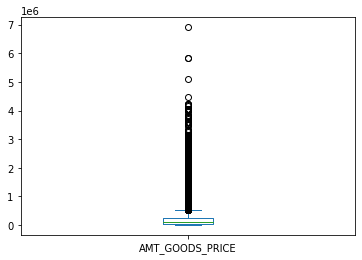

In [194]:
prev_appl_df['AMT_GOODS_PRICE'].plot.box()
plt.show()

As there are many outliers in the column, median will be used for imputation

In [195]:
prev_appl_df['AMT_GOODS_PRICE'].fillna(prev_appl_df['AMT_GOODS_PRICE'].median(),inplace=True)

In [196]:
prev_appl_df['AMT_GOODS_PRICE'].isnull().sum()

0

#### AMT_ANNUITY

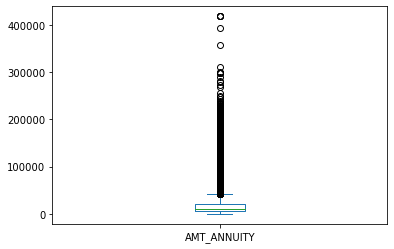

In [197]:
prev_appl_df['AMT_ANNUITY'].plot.box()
plt.show()

As there are many outliers in the column, median will be used for imputation

In [198]:
prev_appl_df['AMT_ANNUITY'].fillna(prev_appl_df['AMT_ANNUITY'].median(),inplace=True)

In [199]:
prev_appl_df['AMT_ANNUITY'].isnull().sum()

0

In [200]:
med_null_vals.columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### CNT_PAYMENT

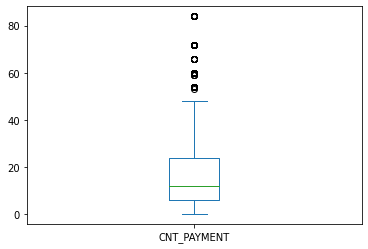

In [201]:
prev_appl_df['CNT_PAYMENT'].plot.box()
plt.show()

In [202]:
prev_appl_df.loc[prev_appl_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

- There are few outliers in the column
- Flling value with 0 as most of the loans were cancelled where CNT_PAYMENT is null

In [203]:
prev_appl_df['CNT_PAYMENT'].fillna(0,inplace=True)

#### NFLAG_INSURED_ON_APPROVAL

In [204]:
prev_appl_df['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()/len(prev_appl_df) *100

40.29812946125467

In [205]:
prev_appl_df['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

As this is a flag variable, imputation is bit tricky. As the column seems informative , we will not drop this column

#### null values <20%

In [206]:
low_null_vals= prev_appl_df[filter_nullval(prev_appl_df.isnull().sum(),prev_appl_df,.0)]
low_null_vals.columns

Index(['AMT_CREDIT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### AMT_CREDIT

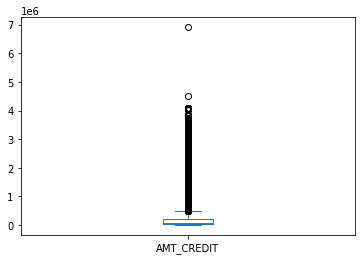

In [207]:
prev_appl_df['AMT_CREDIT'].plot.box()
plt.show()

There are many outliers in the data

In [208]:
prev_appl_df['AMT_CREDIT'].isnull().sum()

1

In [209]:
prev_appl_df[prev_appl_df['AMT_CREDIT'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1127152     2204450      438387    Revolving loans          0.0   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
1127152              0.0         NaN         112320.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1127152                     FRIDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1127152                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1127152                    XAP             Approved           -608   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
1127152               XNA                XAP         Unknown         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  CHANNEL_TYPE  \
1127152                 XNA          Cards           walk-in  Country-wide   

         SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1127152                20         Connectivity          0.0              XNA   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1127152         Card Street                 NaN             NaN   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1127152                        NaN            NaN               NaN   

         NFLAG_INSURED_ON_APPROVAL  
1127152                        NaN

 As there is only 1 value we can either keep it or remove the row with the details. But other columns might be important. So, I will keep it

#### PRODUCT_COMBINATION

In [210]:
prev_appl_df['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

In [211]:
prev_appl_df['PRODUCT_COMBINATION'].isnull().sum()/len(prev_appl_df) *100

0.02071590826085759

Percentage of null values is very less, will keep it like this

## Standardizing values 2

#### Fixing negative values in Days columns

In [212]:
neg_days=['DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 
          'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION' ]
prev_appl_df[neg_days]=abs(prev_appl_df[neg_days])

In [213]:
prev_appl_df[neg_days].describe()

DAYS_DECISION  DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  \
count   1.670214e+06   997149.000000       997149.000000   
mean    8.806797e+02    15949.224065       342340.056543   
std     7.790997e+02    72007.270877        88413.495220   
min     1.000000e+00        2.000000            2.000000   
25%     2.800000e+02      475.000000       365243.000000   
50%     5.810000e+02      921.000000       365243.000000   
75%     1.300000e+03     1825.000000       365243.000000   
max     2.922000e+03   365243.000000       365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                35163.363265   78152.730207      83505.775017  
std                106405.950190  148833.342466     152484.418802  
min                     0.000000       2.000000          2.000000  
25%                   257.000000     455.000000        447.000000  
50%                   741.000000    1155.000000       1171.000000  
75%                  1735.000000    2418.000000       2501.000000  
max                365243.000000  365243.000000     365243.000000

#### Binning of Day columns with large values into years for ease in analysis
- DAYS_DECISION


In [214]:
prev_appl_df['DAYS_DECISION_YEAR']=prev_appl_df['DAYS_DECISION']/365

In [215]:
prev_appl_df['DAYS_DECISION_YEAR'].describe()

count    1.670214e+06
mean     2.412821e+00
std      2.134520e+00
min      2.739726e-03
25%      7.671233e-01
50%      1.591781e+00
75%      3.561644e+00
max      8.005479e+00
Name: DAYS_DECISION_YEAR, dtype: float64

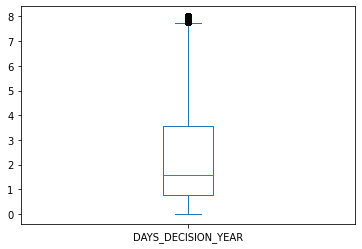

In [216]:
prev_appl_df['DAYS_DECISION_YEAR'].plot.box()
plt.show()

In [217]:
bins=np.arange(0,10)
labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','Above 8']
prev_appl_df['DECISION_YEAR']=pd.cut(prev_appl_df['DAYS_DECISION_YEAR'],bins=bins,labels=labels)

In [218]:
prev_appl_df['DECISION_YEAR'].value_counts(normalize=True)*100

0-1        34.351287
1-2        23.056806
2-3        12.855598
3-4         7.883181
4-5         6.128556
6-7         5.813806
7-8         5.041570
5-6         4.850037
Above 8     0.019159
Name: DECISION_YEAR, dtype: float64

**Observation**:
- Most of the applicants i.e. 35 % ,have applied for new loan within a year of previous application decision.

**AMT_ANNUITY**

In [219]:
quants=[0,0.1,0.3,0.5,0.9,1]
gp_labels=['Very Low','Low','Medium','High','Very High']
prev_appl_df['AMT_ANNUITY_RANGE']=pd.qcut(prev_appl_df['AMT_ANNUITY'],q=quants,labels=gp_labels)

In [220]:
prev_appl_df['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

Medium       31.707793
High         28.292063
Low          20.000072
Very Low     10.000096
Very High     9.999976
Name: AMT_ANNUITY_RANGE, dtype: float64

## Finding Outliers

In [221]:
prev_appl_df.dtypes.value_counts()

object      16
float64     12
int64        6
category     1
category     1
dtype: int64

In [222]:
int_cols=prev_appl_df.loc[:,prev_appl_df.dtypes== np.int64].columns
int_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA'],
      dtype='object')

In [223]:
float_cols=prev_appl_df.loc[:,prev_appl_df.dtypes== np.float64].columns
float_cols

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'DAYS_DECISION_YEAR'],
      dtype='object')

- We have seen boxplots for DAYS_DECISION, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_PAYMENT. 
- Let's check for SELLERPLACE_AREA and AMT_APPLICATION

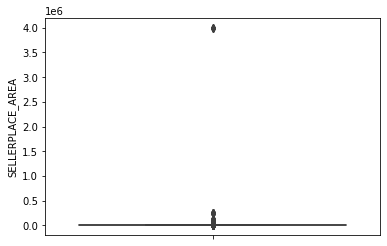

In [224]:
sns.boxplot(y=prev_appl_df['SELLERPLACE_AREA'])
plt.show()

- There are many outliers in the column

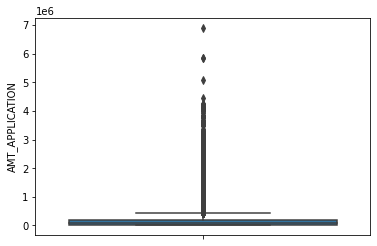

In [225]:
sns.boxplot(y=prev_appl_df['AMT_APPLICATION'])
plt.show()

- There are many outliers in the column

**Summary**:
- Columns with many outliers: AMT_APPLICATION, SELLERPLACE_AREA, AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY.
- Columns with Few outliers: CNT_PAYMENT and DAYS_DECISION

In [226]:
prev_appl_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'DAYS_DECISION_YEAR', 'DECISION_YEAR',
       'AMT_ANNUITY_RANGE'],
      dtype='object')

## Univariate Analysis

In [227]:
cat_columns2=['NAME_CONTRACT_TYPE' ,'NAME_PAYMENT_TYPE', 'AMT_ANNUITY_RANGE', 'NAME_CONTRACT_STATUS']

In [228]:
x=len(prev_appl_df)

In [229]:
y=len(prev_appl_df['NAME_CONTRACT_TYPE'])

In [230]:
x/y

1.0

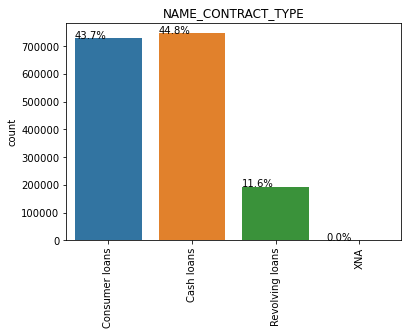

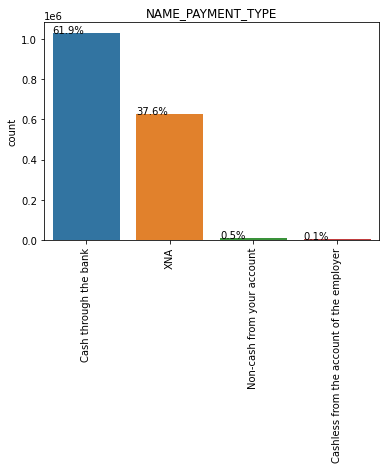

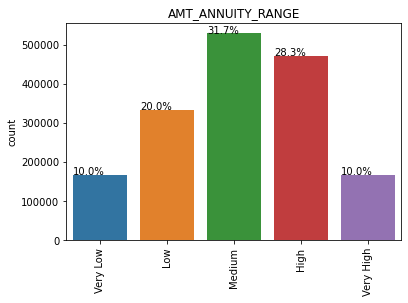

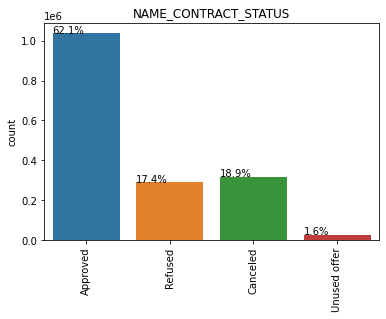

In [231]:
for i in enumerate(cat_columns2):
    ax=sns.countplot(prev_appl_df[i[1]])
    for val in ax.patches:
            ax.annotate('{:.1f}%'.format((val.get_height()/len(prev_appl_df))*100), (val.get_x(), val.get_height()))
    plt.title(i[1], fontdict={'fontsize' : 12})
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.show()

**Observation**
- Percentage sum of NAME_CONTRACT_STATUS and AMT_ANNUITY_RANGE is 100, whereas for other two columns it sums upto 100.1. This is because of XNA values present in the column.
- Most of the previous loan applications (62.1%) were approved and 18.9% of the applications were cancelled.
- Very few(1.6%) applications remained unused .
- Most of the applications have medium and high amount annuity range
- 20% of were having low annuity range and 10% were having very high annuity range
- Previous applications also had high percentage of cash loans, but this percentage is like consumer loans as well.
-  Most of the clients (61.9%) chose to pay for the previous application through cash and very few opted for cashless methods. Also, there i.e. , XNA category which is giving no information.

## Merging Dataframes

Let's merge dataframe:application data and previous application based on SK_ID_CURR

In [232]:
standard_df.shape

(307511, 90)

In [233]:
prev_appl_df.shape

(1670214, 36)

In [234]:
merged_data = standard_df.merge(prev_appl_df, left_on='SK_ID_CURR', 
                                         right_on='SK_ID_CURR', how='inner')

In [235]:
merged_data.head()

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      Defaulter           Cash loans           M           No   
1      100003  Non-Defaulter           Cash loans           F           No   
2      100003  Non-Defaulter           Cash loans           F           No   
3      100003  Non-Defaulter           Cash loans           F           No   
4      100004  Non-Defaulter      Revolving loans           M          Yes   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0             Yes             0          202500.0      406597.5   
1              No             0          270000.0     1293502.5   
2              No             0          270000.0     1293502.5   
3              No             0          270000.0     1293502.5   
4             Yes             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0             2120        Yes            Yes              No              Yes   
1              291        Yes            Yes              No              Yes   
2              291        Yes            Yes              No              Yes   
3              291        Yes            Yes              No              Yes   
4             2531        Yes            Yes             Yes              Yes   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0        Yes         No        Laborers              1.0   
1        Yes         No      Core staff              2.0   
2        Yes         No      Core staff              2.0   
3        Yes         No      Core staff              2.0   
4        Yes         No        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                         No                         No   
1                         No                         No   
2                  

In [236]:
merged_data.shape

(1413701, 125)

In [237]:
merged_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 125 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        object  
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

In [238]:
merged_data.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count  1.413701e+06  1.413701e+06      1.413701e+06  1.413701e+06   
mean   2.784813e+05  4.048933e-01      1.733160e+05  5.875537e+05   
std    1.028118e+05  7.173454e-01      1.985734e+05  3.849173e+05   
min    1.000020e+05  0.000000e+00      2.565000e+04  4.500000e+04   
25%    1.893640e+05  0.000000e+00      1.125000e+05  2.700000e+05   
50%    2.789920e+05  0.000000e+00      1.575000e+05  5.084955e+05   
75%    3.675560e+05  1.000000e+00      2.070000e+05  8.079840e+05   
max    4.562550e+05  1.900000e+01      1.170000e+08  4.050000e+06   

       AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count   1.413701e+06       1.413701e+06                1.413701e+06   
mean    2.701688e+04       5.276522e+05                2.074985e-02   
std     1.395072e+04       3.531028e+05                1.334702e-02   
min     1.615500e+03       4.050000e+04                2.900000e-04   
25%     1.682100e+04       2.385000e+05                1.003200e-02   
50%     2.492550e+04       4.500000e+05                1.885000e-02   
75%     3.454200e+04       6.795000e+05                2.866300e-02   
max     2.250000e+05       4.050000e+06                7.250800e-02   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  1.413701e+06   1.413701e+06       1.413701e+06     1.413701e+06   
mean   1.632105e+04   7.266347e+04       5.003233e+03     3.034563e+03   
std    4.344557e+03   1.433374e+05       3.551051e+03     1.507376e+03   
min    7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00   
25%    1.273900e+04   1.042000e+03       2.001000e+03     1.783000e+03   
50%    1.604400e+04   2.401000e+03       4.508000e+03     3.330000e+03   
75%    1.998000e+04   6.313000e+03       7.510000e+03     4.319000e+03   
max    2.520100e+04   3.652430e+05       2.467200e+04     7.197000e+03   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.413701e+06          1.413701e+06                 1.413701e+06   
mean      2.150501e+00          2.059638e+00                 2.037603e+00   
std       9.006787e-01          4.957797e-01                 4.886431e-01   
min       1.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_x  EXT_SOURCE_2  EXT_SOURCE_3  \
count               1.413701e+06  1.413701e+06  1.413701e+06   
mean                1.198433e+01  5.114978e-01  4.974956e-01   
std                 3.232181e+00  1.910056e-01  1.797586e-01   
min                 0.000000e+00  8.173617e-08  5.272652e-04   
25%                 1.000000e+01  3.893855e-01  3.807997e-01   
50%                 1.200000e+01  5.630477e-01  5.352763e-01   
75%                 1.400000e+01  6.605643e-01  6.212263e-01   
max                 2.300000e+01  8.549997e-01  8.960095e-01   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count                 1.413701e+06   1.413701e+06   
mean                  9.774772e-01   1.948367e-01   
std                   4.427003e-02   1.040334e-01   
min                   0.000000e+00   0.000000e+00   
25%                   9.777349e-01   1.667000e-01   
50%                   9.777349e-01   1.667000e-01   
75%                   9.821000e-01   1.667000e-01   
max                   1.000000e+00   1.000000e+00   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
count                  1.413701e+06    1.413701e+06   
mean                   9.767818e-01    1.929338e-01   
std                    4.839103e-02    1.030828e-01   
min                    0.000000e+00    0.000000e+00   
25%                    9.770654e-01    1.667000e-01   
5

In [239]:
prev_appl_df.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [240]:
merged_data.SK_ID_CURR.value_counts()

265681    73
173680    72
242412    68
206783    67
389950    64
          ..
184932     1
361258     1
361256     1
184935     1
100002     1
Name: SK_ID_CURR, Length: 291057, dtype: int64

Merged data also have duplicate valus of sku curr

Again segregating Data sets

In [241]:
def_0 = merged_data.loc[merged_data['TARGET'] == 'Non-Defaulter']
def_1 = merged_data.loc[merged_data['TARGET'] == 'Defaulter']

In [242]:
def_0.head()

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1      100003  Non-Defaulter           Cash loans           F           No   
2      100003  Non-Defaulter           Cash loans           F           No   
3      100003  Non-Defaulter           Cash loans           F           No   
4      100004  Non-Defaulter      Revolving loans           M          Yes   
5      100006  Non-Defaulter           Cash loans           F           No   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
1              No             0          270000.0     1293502.5   
2              No             0          270000.0     1293502.5   
3              No             0          270000.0     1293502.5   
4             Yes             0           67500.0      135000.0   
5             Yes             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   
5        29686.5           297000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   
5                    0.008019       19005           3039             9833.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
1              291        Yes            Yes              No              Yes   
2              291        Yes            Yes              No              Yes   
3              291        Yes            Yes              No              Yes   
4             2531        Yes            Yes             Yes              Yes   
5             2437        Yes            Yes              No              Yes   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1        Yes         No      Core staff              2.0   
2        Yes         No      Core staff              2.0   
3        Yes         No      Core staff              2.0   
4        Yes         No        Laborers              1.0   
5         No         No        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   
5                    WEDNESDAY                         17   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
1                         No                         No   
2                         No                         No   
3                  

In [243]:
def_1.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0        100002  Defaulter           Cash loans           M           No   
161      100047  Defaulter           Cash loans           M           No   
162      100047  Defaulter           Cash loans           M           No   
163      100047  Defaulter           Cash loans           M           No   
164      100047  Defaulter           Cash loans           M           No   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Yes             0          202500.0      406597.5   
161             Yes             0          202500.0     1193580.0   
162             Yes             0          202500.0     1193580.0   
163             Yes             0          202500.0     1193580.0   
164             Yes             0          202500.0     1193580.0   

     AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0          24700.5           351000.0     Unaccompanied               Working   
161        35028.0           855000.0     Unaccompanied  Commercial associate   
162        35028.0           855000.0     Unaccompanied  Commercial associate   
163        35028.0           855000.0     Unaccompanied  Commercial associate   
164        35028.0           855000.0     Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary / secondary special  Single / not married  House / apartment   
161  Secondary / secondary special               Married  House / apartment   
162  Secondary / secondary special               Married  House / apartment   
163  Secondary / secondary special               Married  House / apartment   
164  Secondary / secondary special               Married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.018801        9461            637             3648.0   
161                    0.025164       17482           1262             1182.0   
162                    0.025164       17482           1262             1182.0   
163                    0.025164       17482           1262             1182.0   
164                    0.025164       17482           1262             1182.0   

     DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0               2120        Yes            Yes              No   
161             1029        Yes            Yes              No   
162             1029        Yes            Yes              No   
163             1029        Yes            Yes              No   
164             1029        Yes            Yes              No   

    FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                Yes        Yes         No        Laborers              1.0   
161              Yes         No         No        Laborers              2.0   
162              Yes         No         No        Laborers              2.0   
163              Yes         No         No        Laborers              2.0   
164              Yes         No         No        Laborers              2.0   

     REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                       2                            2   
161                     2                            2   
162                     2                            2   
163                     2                            2   
164                     2                            2   

    WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      WEDNESDAY                         10   
161                      TUESDAY                          9   
162                      TUESDAY                          9   
163                      TUESDAY                          9   
164                      TUESDAY                          9   

    REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                      

In [244]:
def bivariate_analysis(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    merged_data[col].value_counts().plot.pie(autopct = "%1.1f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['Non-Defaulter']= ((non_defaulter_df[col].value_counts())/len(non_defaulter_df))
    df['Defaulter']= ((defaulter_df[col].value_counts())/len(defaulter_df))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=def_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=def_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

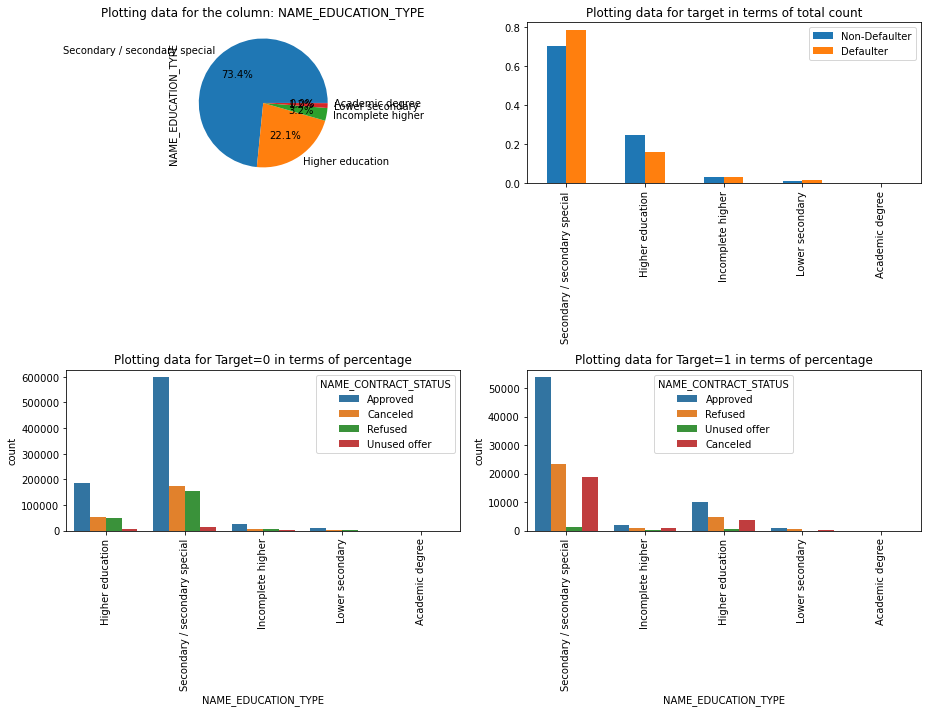

In [245]:
bivariate_analysis('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

**observation**
- Most of the previous loans were approved for the defaulters in secondary/ secondary special.
- But also, many applications were cancelled by the clients (defaulters) in this range as compared to other categories.
- It tell us that most of the client with payment difficulties tend to cancel the loan from Secondary /secondary special 
- Hence, analyzing Income of client can help us differentiating the clients with payment difficulties with all other cases

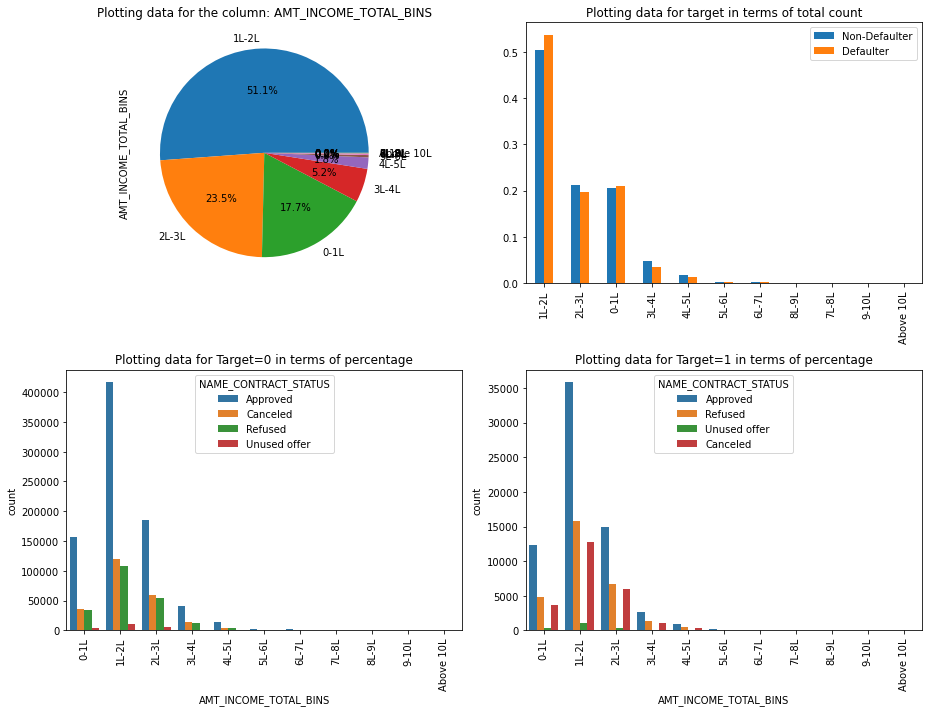

In [246]:
bivariate_analysis('AMT_INCOME_TOTAL_BINS','NAME_CONTRACT_STATUS')

**observation**
- Most of the defaulters occurred in 1-2L income range
- Most of the loans in this range is approved. Also, this income range has highest percentage of unused offer as compared to other ranges.
- This tells us that,  clients who have unused offer earlier have also  defaulted even though they haven’t used the offer
- Hence, analyzing Income of client can help us differentiating the clients with payment difficulties with all other cases


In [247]:
merged_data[merged_data['NAME_CONTRACT_STATUS']=='Unused offer']['AMT_INCOME_TOTAL_BINS'].value_counts()

1L-2L        12003
2L-3L         5394
0-1L          3794
3L-4L         1078
4L-5L          369
5L-6L           66
6L-7L           41
8L-9L            9
7L-8L            7
9-10L            2
Above 10L        0
Name: AMT_INCOME_TOTAL_BINS, dtype: int64

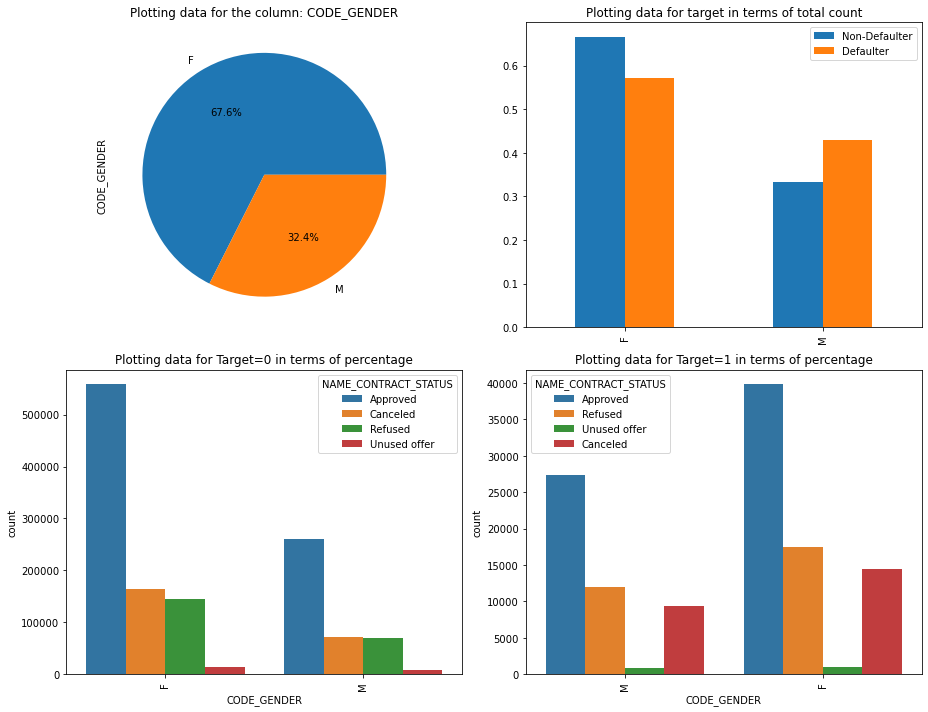

In [248]:
bivariate_analysis('CODE_GENDER','NAME_CONTRACT_STATUS')

**Observation**
- Most of the male clients who have payment difficulties cancel the the loan 

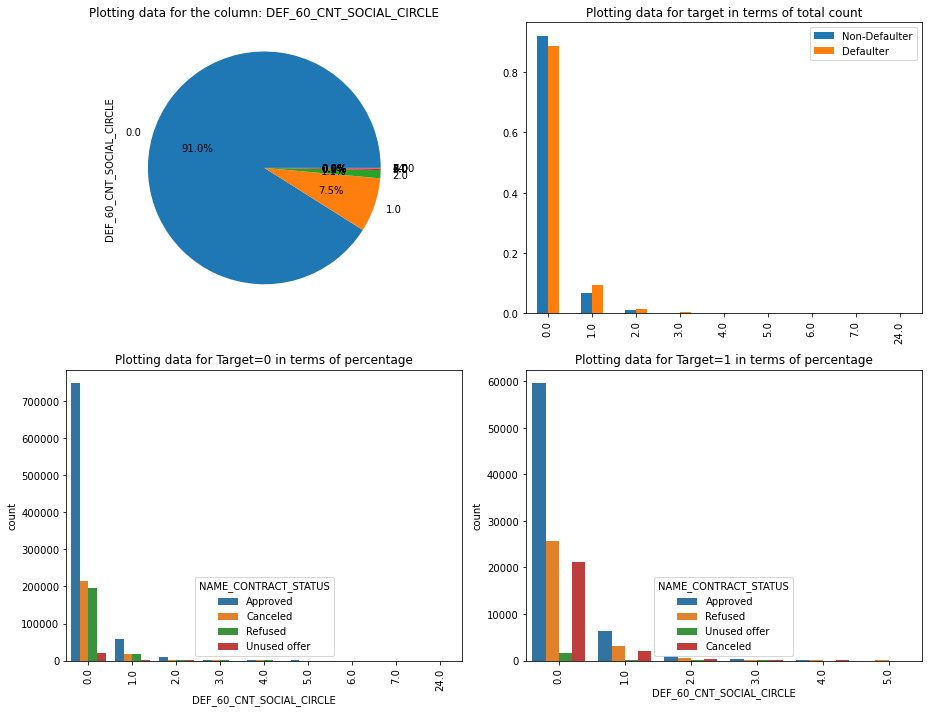

In [249]:
bivariate_analysis('DEF_60_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_STATUS')

**Observation**
- 91% of clients have DEF_60_CNT_SOCIAL_CIRCLE  from 0 to 1
- Clients who have DEF_60_CNT_SOCIAL_CIRCLE score in this range tend to default more as we see more defaulters in this range 
- From the graph we can se that, most of the loans in this category are approved and many defaults have occurred for the same.
- It tell us that  analyzing client's social circle can help to disburse the loan to prevent consequences


In [250]:
print(merged_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'DAYS_DECISION_YEAR', 'DECISION_YEAR',
       'AMT_ANNUITY_RANGE_y'],
      dtype='object', length=125)


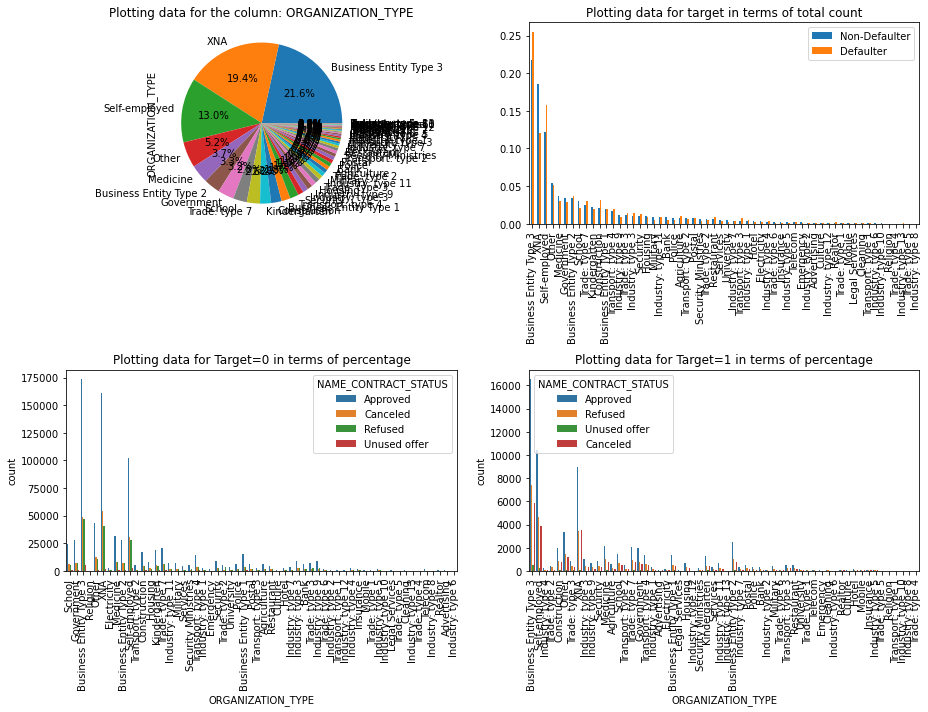

In [251]:
bivariate_analysis('ORGANIZATION_TYPE','NAME_CONTRACT_STATUS')

**Observation**
- Most of the clients with business entity type and with payment difficulties cancelled the application, which is also the loss for a company.
- Whereas for most of the clients (non-defaulters) also cancelled the loan which also needs to be take care of.
- We can use organization type variable to analyse the loan status and do the needful to prevent the defaulters in future.

## Conclusion

After analyzing the datasets, there are few variables which company can use as driving factors behind loan default, i.e., the variables which are strong indicators of default. I have categorized them as defaulters inclined and non-defaulters inclined.


**Defaulters Inclined:**


- AMOUNT_INCOME_TOTAL: People who have income range between 1-2 lakhs tend to default a lot and should be avoided.
- DAYS_BIRTH: People in age group of 20-40 have higher probability of defaulting. It’s better to consider age with all other factors combined.
- GENDER:  Male clients are likely to default more than females.
- NAME_EDUCATION_TYPE: People with Lower Secondary, Incomplete higher  & Secondary education tend to default a lot and should be avoided.
- OCCUPATION_TYPE: People with occupations Sales staff, Drivers and Waiters/barmen staff, Security staff, Laborers. Cleaning staff and Cooking staff tend to default and should be avoided.
- ORGANIZATION_TYPE: People who are Self-employed, work in construction, trade tend to default a lot.
- NAME_HOUSING_TYPE: People who live with parents, in municipal apartment and rented apartment, which means they don’t own a house, tend to default a lot.
- CNT_CHILDREN: People with more than 8 children or 8 family members should be avoided beacuse CNT_FAM_MEMBERS is highly correlated with this column.
- DAYS_EMPLOYED: People who have been employed for less than 5 years also tend to default.
- AMT_ANNUITY: People with high and medium loan annuity default a lot. That is,  Medium loan annuity range :[18189., 24903.] High loan annuity range : [24903., 45954.]



**Non-Defaulters Inclined**

- AMOUNT_INCOME_TOTAL: People who have income range above 4 lakhs default less.
- NAME_INCOME_TYPE: People in age group of State Servant and Student have less probability of defaulting.
- AMT_CREDIT: When credit amount is above 20 lakhs, defaulters are very less.
- DAYS_BIRTH: People above age 50 have lesser probability of defaulting.
- DAYS_EMPLOYED: People who have been employed for more than 5 years have lesser default rate.
- NAME_EDUCATION_TYPE: People with  Higher education and academic degree default less.
- NAME_HOUSING_TYPE: People who have their own house/apartment have less default rate.
- CNT_CHILDREN: People with less than 2 children also have less default rate.
- AMT_ANNUITY x AMT_GOODS_PRICE: When Loan annuity is above 15,000 and Good Price is above 20 Lakhs, there is a lesser chance of defaulters.
